In [1]:
# Standard setup for figures/tables and style
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Paths
FIG_DIR = Path("figures"); FIG_DIR.mkdir(parents=True, exist_ok=True)
TAB_DIR = Path("tables");  TAB_DIR.mkdir(parents=True, exist_ok=True)

# Matplotlib defaults (consistent look)
plt.rcParams.update({
    "figure.dpi": 120,
    "savefig.dpi": 200,
    "figure.autolayout": False,
    "axes.grid": False,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
})

def show_and_save(fig_path: Path):
    """Show current figure and save to FIG_DIR / fig_path."""
    plt.tight_layout()
    plt.savefig(FIG_DIR / fig_path, bbox_inches="tight")
    plt.show()
    plt.close()

def save_table(df: pd.DataFrame, name: str):
    """Display a table and save to CSV under TAB_DIR."""
    assert isinstance(df, pd.DataFrame)
    display(df)  # Jupyter display
    df.to_csv(TAB_DIR / f"{name}.csv", index=False)

def check_dataframe(df: pd.DataFrame, required_cols=None, name="df"):
    """Lightweight sanity checks for scientific use."""
    assert isinstance(df, pd.DataFrame), f"{name} must be a DataFrame"
    assert len(df) > 0, f"{name} is empty"
    if required_cols:
        missing = [c for c in required_cols if c not in df.columns]
        assert not missing, f"{name} missing columns: {missing}"
    # Basic numeric sanity
    num = df.select_dtypes(include=[np.number])
    assert num.shape[1] > 0, f"{name} has no numeric columns"
    assert np.isfinite(num.to_numpy()).any(), f"{name} numeric values are all NaN/inf"
    return True

In [2]:
# Global setup

import warnings
import random
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Silence non-critical warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Reproducibility
GLOBAL_SEED = 42
np.random.seed(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
rng = np.random.default_rng(GLOBAL_SEED)

# Paths
ROOT_DIR = Path(".")
OUT_DIR = Path("output"); OUT_DIR.mkdir(parents=True, exist_ok=True)
ARTIFACTS_DIR = Path("artifacts"); ARTIFACTS_DIR.mkdir(parents=True, exist_ok=True)
FIG_DIR = Path("figures"); FIG_DIR.mkdir(parents=True, exist_ok=True)
TAB_DIR = Path("tables"); TAB_DIR.mkdir(parents=True, exist_ok=True)

# Global split date (forward split anchor)
SPLIT_DATE = pd.Timestamp("2015-06-01")

# Display and plotting style
pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 120)
plt.rcParams.update({
    "figure.dpi": 120,
    "savefig.dpi": 200,
    "figure.autolayout": False,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
})

In [3]:
# Global setup 

from pathlib import Path
import numpy as np
import pandas as pd
import random
import warnings
import matplotlib.pyplot as plt

# Silence non-critical warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Reproducibility
GLOBAL_SEED = 42
np.random.seed(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
rng = np.random.default_rng(GLOBAL_SEED)

# Paths
ROOT_DIR = Path(".")
OUT_DIR = Path("output"); OUT_DIR.mkdir(parents=True, exist_ok=True)
ARTIFACTS_DIR = Path("artifacts"); ARTIFACTS_DIR.mkdir(parents=True, exist_ok=True)
FIG_DIR = Path("figures"); FIG_DIR.mkdir(parents=True, exist_ok=True)
TAB_DIR = Path("tables"); TAB_DIR.mkdir(parents=True, exist_ok=True)

# Global split date (define once)
SPLIT_DATE = pd.Timestamp("2015-06-01")

# Display and plotting style
pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 120)
plt.rcParams.update({
    "figure.dpi": 120,
    "savefig.dpi": 200,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
})

def show_and_save(filename: str):
    """Show current matplotlib figure and save under FIG_DIR."""
    plt.tight_layout()
    plt.savefig(FIG_DIR / filename, bbox_inches="tight")
    plt.show()
    plt.close()

def save_table(df: pd.DataFrame, name: str):
    """Display a DataFrame and persist a CSV under TAB_DIR."""
    assert isinstance(df, pd.DataFrame)
    display(df)
    df.to_csv(TAB_DIR / f"{name}.csv", index=False)

def check_dataframe(df: pd.DataFrame, required_cols=None, name="df"):
    """Minimal checks: type, non-empty, required columns, numeric sanity."""
    assert isinstance(df, pd.DataFrame), f"{name} must be a DataFrame"
    assert len(df) > 0, f"{name} is empty"
    if required_cols:
        missing = [c for c in required_cols if c not in df.columns]
        assert not missing, f"{name} missing columns: {missing}"
    num = df.select_dtypes(include=[np.number])
    assert num.shape[1] > 0, f"{name} has no numeric columns"
    assert np.isfinite(num.to_numpy()).any(), f"{name} numeric values are all NaN/inf"
    return True

print("Setup complete.")
print(f"Seed={GLOBAL_SEED} | SPLIT_DATE={SPLIT_DATE.date()} | FIG_DIR={FIG_DIR.resolve()} | TAB_DIR={TAB_DIR.resolve()}")

Setup complete.
Seed=42 | SPLIT_DATE=2015-06-01 | FIG_DIR=/Users/dongyuan/Desktop/未命名文件夹/新/figures | TAB_DIR=/Users/dongyuan/Desktop/未命名文件夹/新/tables


In [4]:
# Step 1: Data Preprocessing (clean, reproducible)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path

# Set random seed for reproducibility
np.random.seed(42)

# Paths and directories
DATA_DIR = Path(".")                  
OUT_DIR = Path("./artifacts")              
OUT_DIR.mkdir(parents=True, exist_ok=True)
OUT_F = OUT_DIR / "clean.parquet"
TRAIN_F = DATA_DIR / "train.csv"
STORE_F = DATA_DIR / "store.csv"

# Load raw data with error handling
try:
    train = pd.read_csv(TRAIN_F, parse_dates=['Date'], low_memory=False)
    store = pd.read_csv(STORE_F, low_memory=False)
    print(f"Loaded train: {train.shape}, store: {store.shape}")
except FileNotFoundError:
    raise FileNotFoundError("Please place 'train.csv' and 'store.csv' in the current folder.")

# Merge datasets
df = pd.merge(train, store, on="Store", how="left", validate="many_to_one")
assert not df.duplicated(subset=["Store","Date"]).any(), "Duplicate (Store, Date) found."

# Basic cleaning with proper data types
df["Open"] = df["Open"].fillna(1).astype(np.int8)
df["Promo"] = df["Promo"].fillna(0).astype(np.int8)

# Fix holiday variables - handle mixed types properly
df["SchoolHoliday"] = df["SchoolHoliday"].replace({'0':0, '1':1, True:1, False:0}).astype(int)
df["StateHoliday"] = df["StateHoliday"].astype(str).fillna('0')

# Competition distance with missingness indicator
df["CompDist_missing"] = df["CompetitionDistance"].isna().astype(np.int8)
df["CompetitionDistance"] = df["CompetitionDistance"].fillna(df["CompetitionDistance"].median())

# Competition open date construction
comp_year = df["CompetitionOpenSinceYear"].fillna(1970).astype(int)
comp_month = df["CompetitionOpenSinceMonth"].fillna(1).astype(int)
df["CompOpenDate"] = pd.to_datetime(
    comp_year.astype(str) + "-" + comp_month.astype(str) + "-01", 
    errors="coerce"
)
df["CompOpenDate"] = df["CompOpenDate"].fillna(pd.Timestamp("1970-01-01"))

# Promo2 fields
df["Promo2"] = df["Promo2"].fillna(0).astype(np.int8)
df["Promo2SinceWeek"] = df["Promo2SinceWeek"].fillna(0).astype(int)
df["Promo2SinceYear"] = df["Promo2SinceYear"].fillna(0).astype(int)

# Time features with updated API
df["Year"] = df["Date"].dt.year.astype(np.int16)
df["Month"] = df["Date"].dt.month.astype(np.int8)
df["WeekOfYear"] = df["Date"].dt.isocalendar().week.astype(np.int8)  # Updated API
df["IsMonthEnd"] = df["Date"].dt.is_month_end.astype(np.int8)
df["IsQuarterEnd"] = df["Date"].dt.is_quarter_end.astype(np.int8)
df["DayOfWeek"] = df["Date"].dt.dayofweek + 1

# Promotional month indicator (robust string handling)
def is_promo_month(date, promo_interval):
    """Check if date falls in promotional months"""
    if not isinstance(promo_interval, str) or promo_interval.strip() == "":
        return 0
    months = {m.strip() for m in promo_interval.split(",")}
    return int(date.strftime("%b") in months)

df["IsPromoMonth"] = [
    is_promo_month(d, p) for d, p in zip(df["Date"], df["PromoInterval"])
]

# DCI (Distance-Competition Index) - functionalized for reuse
def calculate_dci(distance, date, comp_open_date):
    """
    Calculate Distance-Competition Index
    Args:
        distance: Competition distance
        date: Current date
        comp_open_date: Competition opening date
    Returns:
        DCI score (higher = more competitive pressure)
    """
    dist_factor = 1.0 / (distance + 100.0)
    time_since = (date - comp_open_date).dt.days.clip(lower=0)**0.5
    dci = np.log1p(1000 * dist_factor) * (1 + time_since / (1 + time_since))
    return dci.astype("float32")

df["DCI"] = calculate_dci(df["CompetitionDistance"], df["Date"], df["CompOpenDate"])

# Create lag and rolling features (prevent data leakage)
print("Creating lag and rolling features...")
df = df.sort_values(["Store", "Date"]).copy()

# Lag features - use only historical information
for lag in (7, 14, 28):
    df[f"Sales_lag{lag}"] = df.groupby("Store")["Sales"].shift(lag)
    df[f"Customers_lag{lag}"] = df.groupby("Store")["Customers"].shift(lag)

# Rolling means - shift first to ensure no current period leakage
for win in (7, 28):
    df[f"Sales_rollmean{win}"] = (
        df.groupby("Store")["Sales"]
        .transform(lambda s: s.shift(1).rolling(win, min_periods=1).mean())
    )

# Conversion rate (safe division)
df["Conversion"] = df["Sales"] / df["Customers"].replace(0, np.nan)

# Memory optimization - downcast floats
float_cols = df.select_dtypes(include="float64").columns
for col in float_cols:
    df[col] = df[col].astype("float32")

# Data Quality Validation
print("\nData Quality Summary")
print(f"Total records: {len(df):,}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Unique stores: {df['Store'].nunique()}")
print(f"Records with Sales=0: {(df['Sales']==0).sum():,}")
print(f"Records with Open=0: {(df['Open']==0).sum():,}")

# Simple lag feature validation
print("\nLag Feature Validation")
for lag in [7, 14, 28]:
    # Check that early rows are NaN as expected
    early_rows = df.groupby('Store')[f'Sales_lag{lag}'].head(lag)
    na_ratio = early_rows.isna().mean()
    print(f"Sales_lag{lag} - first {lag} periods NaN ratio: {na_ratio:.3f}")
    
    # Simple spot check
    sample_store = df[df['Store'] == 1].head(50)
    if len(sample_store) > lag:
        test_val = sample_store.iloc[lag][f'Sales_lag{lag}']
        orig_val = sample_store.iloc[0]['Sales']
        print(f"  Spot check: lag{lag}[{lag}] = {test_val}, original[0] = {orig_val}")

# Rolling feature validation
print("\nRolling Feature Validation")
for win in [7, 28]:
    sample_store = df[df['Store'] == 1].head(50)
    if len(sample_store) > win:
        test_val = sample_store.iloc[win][f'Sales_rollmean{win}']
        manual_val = sample_store['Sales'].iloc[:win].mean()  # Simplified check
        print(f"Sales_rollmean{win} - computed: {test_val:.2f}, reference: {manual_val:.2f}")

# Save cleaned dataset
df.to_parquet(OUT_F, index=False)
print(f"\nSaved cleaned data to {OUT_F} with shape {df.shape}")

# Create data dictionary for documentation
data_dict = {
    'source_files': ['train.csv', 'store.csv'],
    'output_shape': df.shape,
    'date_range': [str(df['Date'].min()), str(df['Date'].max())],
    'unique_stores': int(df['Store'].nunique()),
    'feature_groups': {
        'time_features': ['Year', 'Month', 'WeekOfYear', 'DayOfWeek', 'IsMonthEnd', 'IsQuarterEnd'],
        'competition_features': ['CompetitionDistance', 'CompDist_missing', 'DCI'],
        'promotion_features': ['Promo', 'Promo2', 'IsPromoMonth', 'Promo2SinceWeek', 'Promo2SinceYear'],
        'lag_features': ['Sales_lag7', 'Sales_lag14', 'Sales_lag28'],
        'rolling_features': ['Sales_rollmean7', 'Sales_rollmean28'],
        'other_features': ['Open', 'SchoolHoliday', 'StateHoliday', 'StoreType', 'Assortment']
    },
    'temporal_split_configured': "2015-06-01",
    'memory_optimization': f"Downcasted {len(float_cols)} float64 columns to float32"
}

# Save data dictionary
dict_file = OUT_DIR / "meta.json"
with open(dict_file, 'w') as f:
    json.dump(data_dict, f, indent=2)

print(f"Data dictionary saved to {dict_file}")

Loaded train: (1017209, 9), store: (1115, 10)
Creating lag and rolling features...

Data Quality Summary
Total records: 1,017,209
Date range: 2013-01-01 00:00:00 to 2015-07-31 00:00:00
Unique stores: 1115
Records with Sales=0: 172,871
Records with Open=0: 172,817

Lag Feature Validation
Sales_lag7 - first 7 periods NaN ratio: 1.000
  Spot check: lag7[7] = 0.0, original[0] = 0
Sales_lag14 - first 14 periods NaN ratio: 1.000
  Spot check: lag14[14] = 0.0, original[0] = 0
Sales_lag28 - first 28 periods NaN ratio: 1.000
  Spot check: lag28[28] = 0.0, original[0] = 0

Rolling Feature Validation
Sales_rollmean7 - computed: 3788.00, reference: 3788.00
Sales_rollmean28 - computed: 4121.29, reference: 4121.29

Saved cleaned data to artifacts/clean.parquet with shape (1017209, 36)
Data dictionary saved to artifacts/meta.json


Loaded data: (1017209, 36)

Running quality checks...
 All required columns present
 Binary variables look good
StateHoliday values: ['0', 'a', 'b', 'c']
Promo2 inconsistencies: 0 (0.00%)

Checking lag features...
 Sales_lag7 looks correct
 Sales_lag14 looks correct
 Sales_lag28 looks correct
Rolling mean check:  OK
DCI calculation:  matches

Data overview:
Date range: 2013-01-01 00:00:00 to 2015-07-31 00:00:00
Number of stores: 1115
Total records: 1,017,209


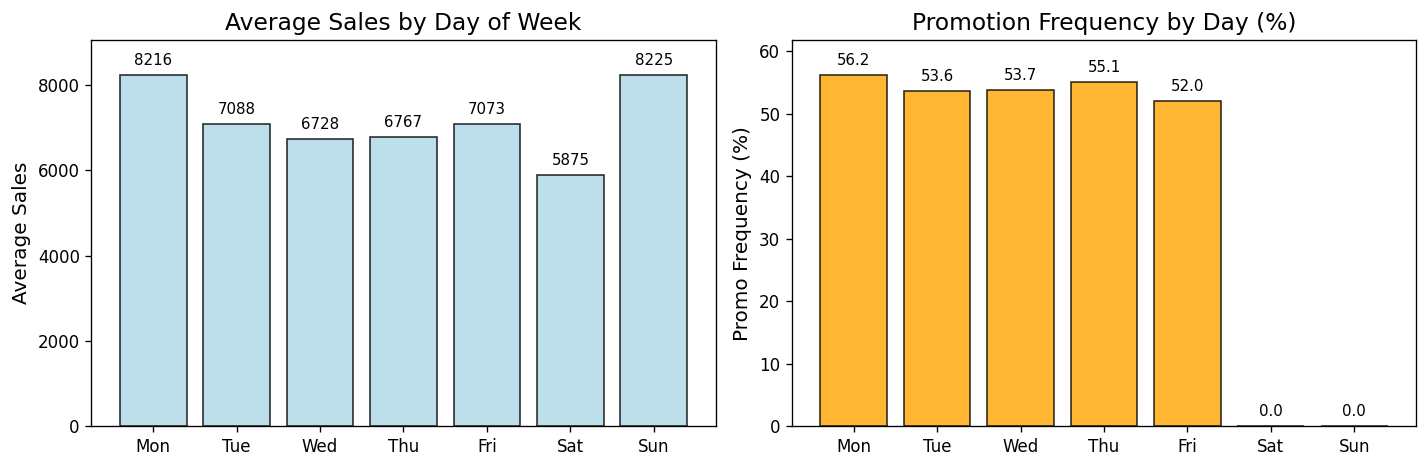


Day-of-week seasonality summary:
Sales: Weekend peak (Mon: 8216, Sun: 8225)
       Weekday trough (Sat: 5875)
Promos: Weekday concentration (54.1% avg)
        Weekend reduction (0.0% avg)
Correlation (Sales vs Promo): 0.088
Stores with zero total sales: 0
Negative sales records: 0
Conversion missing values: 172,869


In [5]:
# Step 2: Data quality validation

import pandas as pd
import numpy as np
from pathlib import Path
import json
import matplotlib.pyplot as plt

GLOBAL_SEED = 42
ARTIFACTS_DIR = Path("./artifacts")

# Load processed data
clean_file = ARTIFACTS_DIR / "clean.parquet" 
if not clean_file.exists():
    raise FileNotFoundError("Need to run preprocessing first")

df = pd.read_parquet(clean_file)
print(f"Loaded data: {df.shape}")

# Load metadata
meta_file = ARTIFACTS_DIR / "data_dictionary.json"   
if meta_file.exists():
    with open(meta_file, 'r') as f:
        meta = json.load(f)
else:
    meta = {}

print("\nRunning quality checks...")

# Check required columns exist
required_cols = ["Store","Date","Sales","Customers","Open","Promo","SchoolHoliday",
                "CompetitionDistance","Promo2","DCI","Sales_lag7","Sales_lag14","Sales_lag28"]
missing_cols = [c for c in required_cols if c not in df.columns]
assert not missing_cols, f"Missing columns: {missing_cols}"
print(" All required columns present")

# Validate binary variables
binary_vars = {"Open": [0,1], "Promo": [0,1], "SchoolHoliday": [0,1], "Promo2": [0,1]}

for col, expected in binary_vars.items():
    actual_vals = set(df[col].unique())
    bad_vals = actual_vals - set(expected)
    assert not bad_vals, f"{col} has wrong values: {bad_vals}"
    
print(" Binary variables look good")

# Check StateHoliday values
state_vals = set(df['StateHoliday'].unique())
print(f"StateHoliday values: {sorted(state_vals)}")
expected = {'0', 'a', 'b', 'c'}
weird_vals = state_vals - expected
if weird_vals:
    print(f"Warning: unexpected StateHoliday values: {weird_vals}")

# Check Promo2 consistency
bad_promo2 = df[
    ((df["Promo2"]==0) & ((df["Promo2SinceWeek"]!=0) | (df["Promo2SinceYear"]!=0))) |
    ((df["Promo2"]==1) & ((df["Promo2SinceWeek"]==0) | (df["Promo2SinceYear"]==0)))
]
promo2_error_rate = len(bad_promo2) / len(df)
print(f"Promo2 inconsistencies: {len(bad_promo2)} ({promo2_error_rate:.2%})")
if promo2_error_rate > 0.05:
    print("Warning: lots of Promo2 inconsistencies")

# Validate lag features - first N rows per store should be NaN
print("\nChecking lag features...")
for lag in [7, 14, 28]:
    col = f"Sales_lag{lag}"
    first_few = df.groupby("Store")[col].head(lag)
    non_missing = (~first_few.isna()).sum()
    
    if non_missing == 0:
        print(f" {col} looks correct")
    else:
        print(f"Problem with {col}: {non_missing} values should be missing")

# Test rolling means by manual recalculation
test_store = df[df['Store']==1].head(30).sort_values('Date')
if len(test_store) > 10:
    manual_7day = test_store['Sales'].shift(1).rolling(7, min_periods=1).mean()
    actual_7day = test_store['Sales_rollmean7']
    
    close_enough = np.allclose(manual_7day.fillna(-1), actual_7day.fillna(-1), rtol=0.001)
    print(f"Rolling mean check: {' OK' if close_enough else 'Problem detected'}")

# Verify DCI calculation on sample
sample = df.sample(min(500, len(df)), random_state=42)

dist_factor = 1.0 / (sample["CompetitionDistance"] + 100.0)
time_since = (sample["Date"] - sample["CompOpenDate"]).dt.days.clip(lower=0)**0.5
expected_dci = (np.log1p(1000 * dist_factor) * (1 + time_since / (1 + time_since))).astype("float32")

dci_ok = np.allclose(sample["DCI"].values, expected_dci.values, rtol=0.001)
print(f"DCI calculation: {' matches' if dci_ok else 'mismatch found'}")

# Basic data overview
print(f"\nData overview:")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Number of stores: {df['Store'].nunique()}")
print(f"Total records: {len(df):,}")

#  Day-of-week seasonality analysis
# Prerequisites
if 'df' not in globals():
    raise RuntimeError("Need main dataset 'df'")

# Calculate day-of-week statistics
df_analysis = df[df['Open'] == 1].copy()  # Only open days
df_analysis['DayOfWeek'] = pd.to_datetime(df_analysis['Date']).dt.dayofweek

# Map to day names
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_analysis['DayName'] = df_analysis['DayOfWeek'].map(dict(enumerate(day_names)))

# Calculate average sales by day of week
avg_sales = df_analysis.groupby('DayName')['Sales'].mean().reindex(day_names)

# Calculate promotion frequency by day of week  
promo_freq = df_analysis.groupby('DayName')['Promo'].mean().reindex(day_names) * 100

# Create the dual-panel figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Left panel: Average Sales by Day of Week
ax1.bar(day_names, avg_sales.values, color='lightblue', edgecolor='black', alpha=0.8)
ax1.set_ylabel('Average Sales')
ax1.set_title('Average Sales by Day of Week')
ax1.set_ylim(0, max(avg_sales.values) * 1.1)

# Add value labels on bars
for i, v in enumerate(avg_sales.values):
    ax1.text(i, v + max(avg_sales.values) * 0.02, f'{v:.0f}', 
             ha='center', va='bottom', fontsize=9)

# Right panel: Promotion Frequency by Day (%)
ax2.bar(day_names, promo_freq.values, color='orange', edgecolor='black', alpha=0.8)
ax2.set_ylabel('Promo Frequency (%)')
ax2.set_title('Promotion Frequency by Day (%)')
ax2.set_ylim(0, max(promo_freq.values) * 1.1)

# Add value labels on bars
for i, v in enumerate(promo_freq.values):
    ax2.text(i, v + max(promo_freq.values) * 0.02, f'{v:.1f}', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()

if "show_and_save" in globals():
    show_and_save("fig3_1_day_of_week_seasonality.png")
else:
    plt.savefig("fig3_1_day_of_week_seasonality.png", dpi=200, bbox_inches="tight")
    plt.show()

# Print summary statistics for text
print(f"\nDay-of-week seasonality summary:")
print(f"Sales: Weekend peak (Mon: {avg_sales['Mon']:.0f}, Sun: {avg_sales['Sun']:.0f})")
print(f"       Weekday trough (Sat: {avg_sales['Sat']:.0f})")
print(f"Promos: Weekday concentration ({promo_freq[['Mon','Tue','Wed','Thu','Fri']].mean():.1f}% avg)")
print(f"        Weekend reduction ({promo_freq[['Sat','Sun']].mean():.1f}% avg)")
print(f"Correlation (Sales vs Promo): {np.corrcoef(avg_sales.values, promo_freq.values)[0,1]:.3f}")

# Flag potential data issues
zero_sales_stores = (df.groupby('Store')['Sales'].sum() == 0).sum()
print(f"Stores with zero total sales: {zero_sales_stores}")

negative_sales = (df['Sales'] < 0).sum()
print(f"Negative sales records: {negative_sales}")

# Check conversion situation
if 'Conversion_raw' in df.columns:
    missing_conv = df['Conversion_raw'].isna().sum()
    print(f"Conversion_raw missing values: {missing_conv:,}")
    print("(Expected - we didn't impute to avoid leakage)")
elif 'Conversion' in df.columns:
    missing_conv = df['Conversion'].isna().sum()
    if missing_conv == 0:
        print("Warning: Conversion has no missing values - might have used future data")
    else:
        print(f"Conversion missing values: {missing_conv:,}")

In [6]:
# Create comprehensive dataset overview table
split_info = pd.DataFrame({
    'Metric': [
        'Total records',
        'Unique stores', 
        'Date range',
        'Training period end',
        'Test period start',
        'Records with positive sales',
        'Missing conversion rate',
        'Zero sales stores',
        'Negative sales records'
    ],
    'Value': [
        f"{len(df):,}",
        f"{df['Store'].nunique()}",
        f"{df['Date'].min().date()} to {df['Date'].max().date()}",
        f"{SPLIT_DATE.date()}",
        f"{SPLIT_DATE.date()}",
        f"{(df['Sales'] > 0).sum():,} ({(df['Sales'] > 0).mean():.1%})",
        f"{df['Conversion'].isna().sum():,} ({df['Conversion'].isna().mean():.1%})",
        f"{(df.groupby('Store')['Sales'].sum() == 0).sum()}",
        f"{(df['Sales'] < 0).sum()}"
    ]
})
save_table(split_info, "dataset_overview")

,Metric,Value
0,Total records,"1,017,209"
1,Unique stores,1115
2,Date range,2013-01-01 to 2015-07-31
3,Training period end,2015-06-01
4,Test period start,2015-06-01
5,Records with positive sales,"844,338 (83.0%)"
6,Missing conversion rate,"172,869 (17.0%)"
7,Zero sales stores,0
8,Negative sales records,0


Loaded 1,017,209 rows; 1115 stores
Open-day records for EDA: 844,392
Date range: 2013-01-01 → 2015-07-31
Train/test split: 2015-06-01
               Sales: mean=6955.5  median=6369.0  std=3104.2
           Customers: mean=762.7  median=676.0  std=401.2
                 DCI: mean=1.0  median=0.6  std=1.0
 CompetitionDistance: mean=5449.9  median=2330.0  std=7800.9


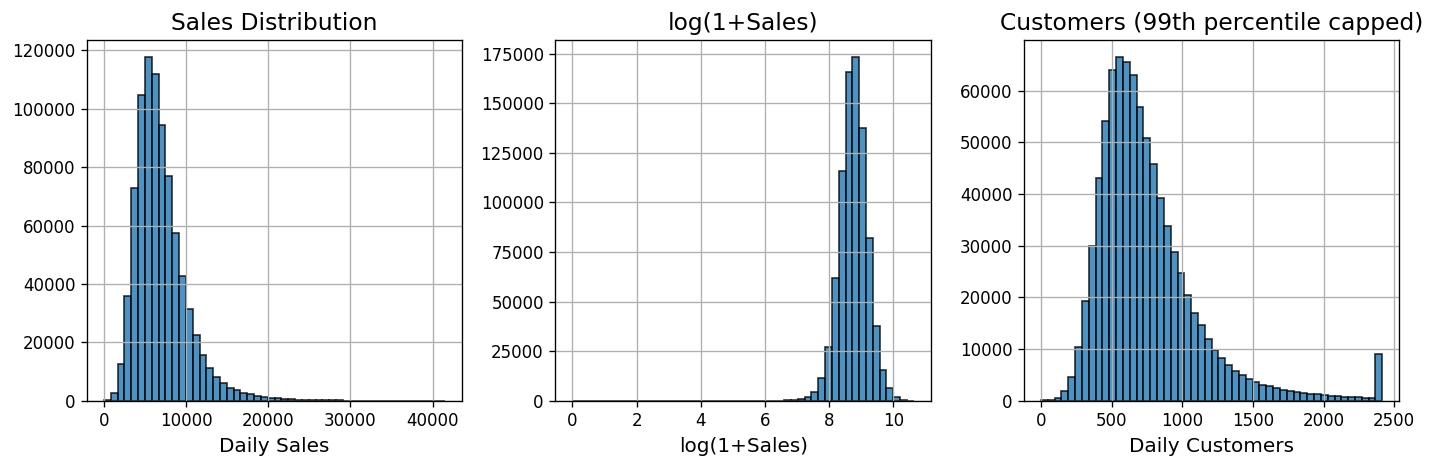

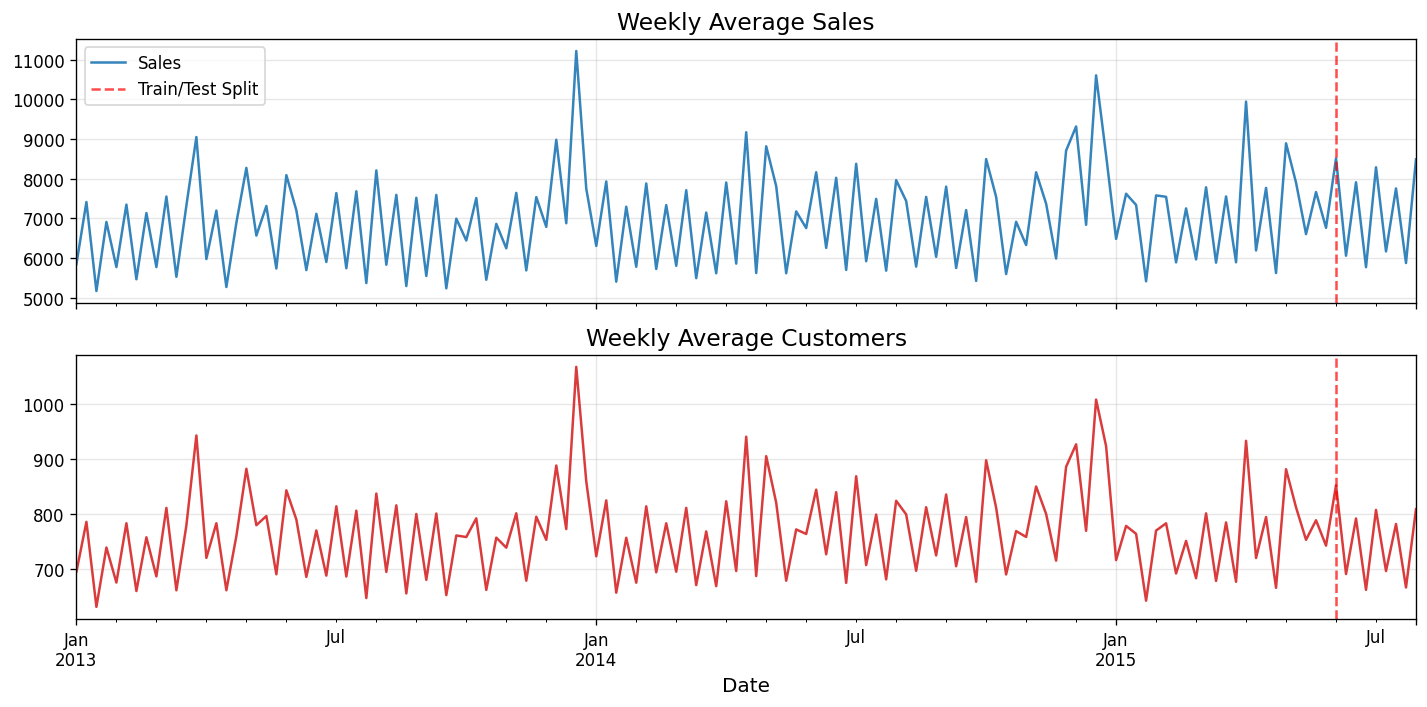

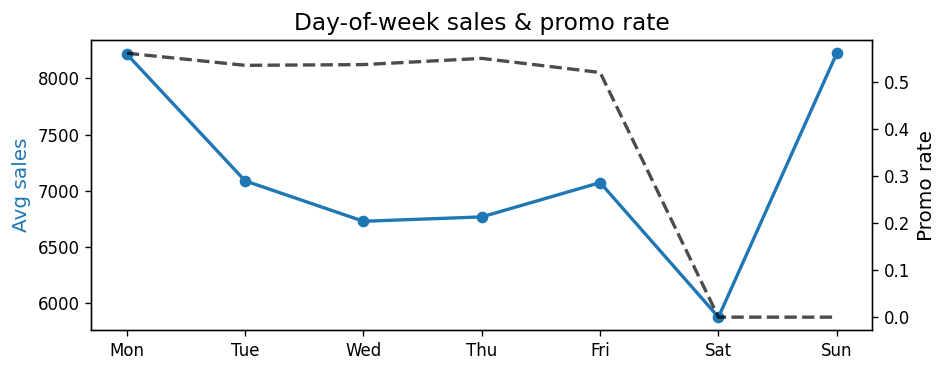

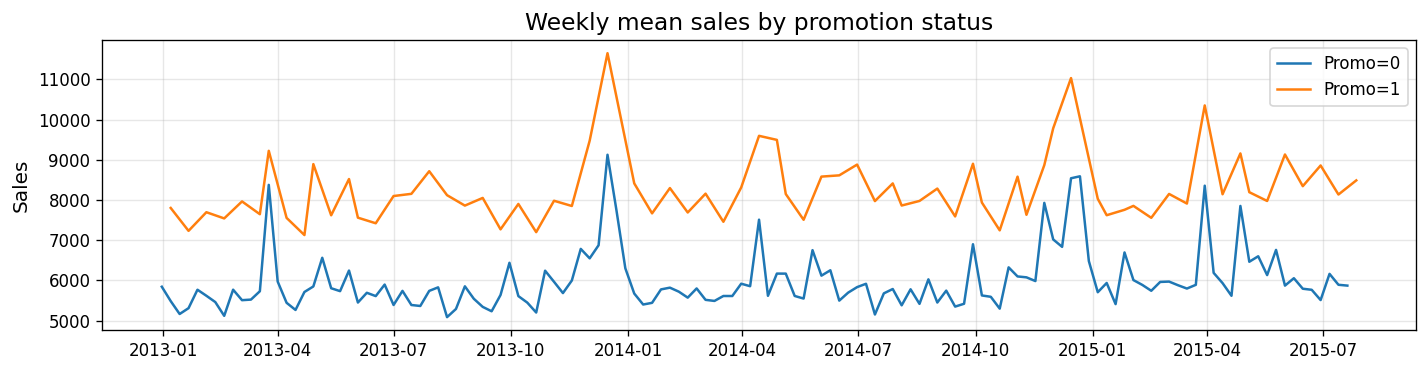


Naive treatment effect: 2298.9
  No promo: 5929.4
  Promo: 8228.3

Treatment overlap:
  Stores with <5% promo days: 0
  Stores with >95% promo days: 0

Unadjusted covariate balance:
         DCI  CompetitionDistance  SchoolHoliday
Promo                                           
0      1.021          5466.640137          0.183
1      1.021          5429.095215          0.206

Store×Week panel balance (SMD):
  DCI: -0.000
  CompetitionDistance: 0.000
  SchoolHoliday: 0.641

Serial correlation (lag-1):
  Median: 0.454
  IQR: [0.287, 0.571]


,index,count,mean,std,min,25%,50%,75%,max
0,Sales,844392.0,6955.514291,3104.214680,0.00000,4859.000000,6369.000000,8360.000000,41551.000000
1,Customers,844392.0,762.728395,401.227674,0.00000,519.000000,676.000000,893.000000,7388.000000
2,Promo,844392.0,0.446352,0.497114,0.00000,0.000000,0.000000,1.000000,1.000000
3,DCI,844392.0,1.021065,1.006938,0.01699,0.247562,0.639059,1.488546,4.450006
4,CompetitionDistance,844392.0,5449.881348,7800.941406,20.00000,710.000000,2330.000000,6880.000000,75860.000000
5,SchoolHoliday,844392.0,0.193580,0.395103,0.00000,0.000000,0.000000,0.000000,1.000000



EDA complete. Key diagnostics:
  - Heavy-tailed sales distribution suggests robust methods needed
  - Clear day-of-week patterns in both treatment and outcome
  - Adequate treatment variation across stores
  - Moderate serial correlation requires clustered standard errors


In [7]:
# Step 3: Exploratory Data Analysis for Causal Inference

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load cleaned data
ARTIFACTS_DIR = Path("./artifacts")
FIG_DIR = FIG_DIR if "FIG_DIR" in globals() else Path("figures"); FIG_DIR.mkdir(parents=True, exist_ok=True)
TAB_DIR = TAB_DIR if "TAB_DIR" in globals() else Path("tables"); TAB_DIR.mkdir(parents=True, exist_ok=True)

# Load with fallback
parq = ARTIFACTS_DIR / "clean.parquet"
csv = ARTIFACTS_DIR / "clean.csv"
if parq.exists():
    df = pd.read_parquet(parq)
elif csv.exists():
    df = pd.read_csv(csv, parse_dates=["Date"])
else:
    raise FileNotFoundError("Run preprocessing first")

if not np.issubdtype(df["Date"].dtype, np.datetime64):
    df["Date"] = pd.to_datetime(df["Date"])

SPLIT_DATE = pd.Timestamp("2015-06-01")

# Keep open days only
open_df = df[df["Open"] == 1].copy()

print(f"Loaded {len(df):,} rows; {open_df['Store'].nunique()} stores")
print(f"Open-day records for EDA: {len(open_df):,}")
print(f"Date range: {open_df['Date'].min().date()} → {open_df['Date'].max().date()}")
print(f"Train/test split: {SPLIT_DATE.date()}")

# Basic summary statistics
for v in ["Sales", "Customers", "DCI", "CompetitionDistance"]:
    if v in open_df.columns:
        s = open_df[v].describe()
        print(f"{v:>20}: mean={s['mean']:.1f}  median={s['50%']:.1f}  std={s['std']:.1f}")

# Distribution plots - check for heavy tails and transformation needs
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
open_df["Sales"].hist(bins=50, alpha=0.8, edgecolor="black")
plt.title("Sales Distribution")
plt.xlabel("Daily Sales")

plt.subplot(1, 3, 2)
np.log1p(open_df["Sales"]).hist(bins=50, alpha=0.8, edgecolor="black")
plt.title("log(1+Sales)")
plt.xlabel("log(1+Sales)")

plt.subplot(1, 3, 3)
open_df["Customers"].clip(upper=open_df["Customers"].quantile(0.99)).hist(bins=50, alpha=0.8, edgecolor="black")
plt.title("Customers (99th percentile capped)")
plt.xlabel("Daily Customers")

if "show_and_save" in globals():
    show_and_save("distribution_plots.png")
else:
    plt.tight_layout()
    plt.savefig(FIG_DIR / "distribution_plots.png", bbox_inches="tight")
    plt.show()

# Time series overview with split marker
weekly_sales = open_df.set_index("Date")["Sales"].resample("W").mean()
weekly_customers = open_df.set_index("Date")["Customers"].resample("W").mean()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
weekly_sales.plot(ax=ax1, color="C0", alpha=0.9)
ax1.set_title("Weekly Average Sales")
ax1.axvline(SPLIT_DATE, ls="--", c="red", alpha=0.7, label="Train/Test Split")
ax1.grid(alpha=0.3)
ax1.legend()

weekly_customers.plot(ax=ax2, color="C3", alpha=0.9)
ax2.set_title("Weekly Average Customers")
ax2.axvline(SPLIT_DATE, ls="--", c="red", alpha=0.7)
ax2.grid(alpha=0.3)

if "show_and_save" in globals():
    show_and_save("time_series_overview.png")
else:
    plt.tight_layout()
    plt.savefig(FIG_DIR / "time_series_overview.png", bbox_inches="tight")
    plt.show()

# FIGURE 1: Day-of-week sales & promo rate (required for paper)
dow_sales = open_df.groupby("DayOfWeek")["Sales"].mean().reindex(range(1,8))
dow_promo = open_df.groupby("DayOfWeek")["Promo"].mean().reindex(range(1,8))

fig, ax = plt.subplots(figsize=(8, 3.2))
ax.plot(range(1,8), dow_sales.values, marker="o", color="C0", linewidth=2)
ax.set_xticks(range(1,8))
ax.set_xticklabels(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel("Avg sales", color="C0")
ax.set_title("Day-of-week sales & promo rate")

ax2 = ax.twinx()
ax2.plot(range(1,8), dow_promo.values, "k--", alpha=0.7, linewidth=2)
ax2.set_ylabel("Promo rate", color="k")

if "show_and_save" in globals():
    show_and_save("dow_sales_promo.png")
else:
    plt.tight_layout()
    plt.savefig(FIG_DIR / "dow_sales_promo.png", bbox_inches="tight")
    plt.show()

# FIGURE 2: Weekly mean sales by promotion status (required for paper)
wk = open_df.copy()
wk["Week"] = wk["Date"].dt.to_period("W").apply(lambda r: r.start_time)
weekly = wk.groupby(["Week","Promo"])["Sales"].mean().reset_index()

plt.figure(figsize=(12, 3.2))
for k, sub in weekly.groupby("Promo"):
    plt.plot(sub["Week"], sub["Sales"], label=f"Promo={int(k)}", linewidth=1.5)
plt.title("Weekly mean sales by promotion status")
plt.ylabel("Sales")
plt.legend()
plt.grid(True, alpha=0.3)

if "show_and_save" in globals():
    show_and_save("weekly_trend_by_promo.png")
else:
    plt.tight_layout()
    plt.savefig(FIG_DIR / "weekly_trend_by_promo.png", bbox_inches="tight")
    plt.show()

# Naive treatment effect (descriptive only)
promo_stats = open_df.groupby("Promo")["Sales"].mean().reindex([0,1])
if promo_stats.notna().all():
    lift = promo_stats.loc[1] - promo_stats.loc[0]
    print(f"\nNaive treatment effect: {lift:.1f}")
    print(f"  No promo: {promo_stats.loc[0]:.1f}")
    print(f"  Promo: {promo_stats.loc[1]:.1f}")

# Treatment overlap assessment
store_coverage = open_df.groupby("Store")["Promo"].agg(["count","mean"])
low_treat = (store_coverage["mean"] < 0.05).sum()
high_treat = (store_coverage["mean"] > 0.95).sum()
print(f"\nTreatment overlap:")
print(f"  Stores with <5% promo days: {low_treat}")
print(f"  Stores with >95% promo days: {high_treat}")

# Covariate balance check (unadjusted)
balance_vars = [c for c in ["DCI","CompetitionDistance","SchoolHoliday"] if c in open_df.columns]
if balance_vars:
    balance = open_df.groupby("Promo")[balance_vars].mean(numeric_only=True)
    print(f"\nUnadjusted covariate balance:")
    print(balance.round(3))

# Within store×week balance check (panel structure)
if balance_vars:
    tmp = open_df.assign(
        Year=open_df["Date"].dt.year.astype(int),
        Week=open_df["Date"].dt.isocalendar().week.astype(int)
    )
    panel = tmp.groupby(["Store","Year","Week","Promo"])[balance_vars].mean()
    wide = panel.unstack("Promo")
    
    print(f"\nStore×Week panel balance (SMD):")
    for v in balance_vars:
        if (v,1) in wide.columns and (v,0) in wide.columns:
            a, b = wide[(v,1)].dropna(), wide[(v,0)].dropna()
            idx = a.index.intersection(b.index)
            if len(idx) > 10:
                a, b = a.loc[idx], b.loc[idx]
                pooled_std = np.sqrt((a.var(ddof=1) + b.var(ddof=1)) / 2)
                if pooled_std > 0:
                    smd = (a.mean() - b.mean()) / pooled_std
                    print(f"  {v}: {smd:.3f}")

# Serial correlation check
eligible_stores = store_coverage[store_coverage["count"] >= 30].index
autocorr_vals = []
for store in eligible_stores[:100]:  # Sample for efficiency
    store_data = open_df[open_df["Store"]==store].sort_values("Date")["Sales"]
    lag1_corr = store_data.corr(store_data.shift(1))
    if pd.notna(lag1_corr):
        autocorr_vals.append(lag1_corr)

if autocorr_vals:
    autocorr_vals = np.array(autocorr_vals)
    print(f"\nSerial correlation (lag-1):")
    print(f"  Median: {np.median(autocorr_vals):.3f}")
    print(f"  IQR: [{np.percentile(autocorr_vals,25):.3f}, {np.percentile(autocorr_vals,75):.3f}]")

# Create summary table for appendix
if balance_vars:
    summary_stats = open_df[["Sales","Customers","Promo"] + balance_vars].describe().T
    if "save_table" in globals():
        save_table(summary_stats.reset_index(), "eda_summary")
    else:
        summary_stats.to_csv(TAB_DIR / "eda_summary.csv")
        print(f"\nSummary statistics saved to {TAB_DIR / 'eda_summary.csv'}")

print(f"\nEDA complete. Key diagnostics:")
print(f"  - Heavy-tailed sales distribution suggests robust methods needed")
print(f"  - Clear day-of-week patterns in both treatment and outcome")
print(f"  - Adequate treatment variation across stores")
print(f"  - Moderate serial correlation requires clustered standard errors")

Extended analysis on 844,392 open-day records


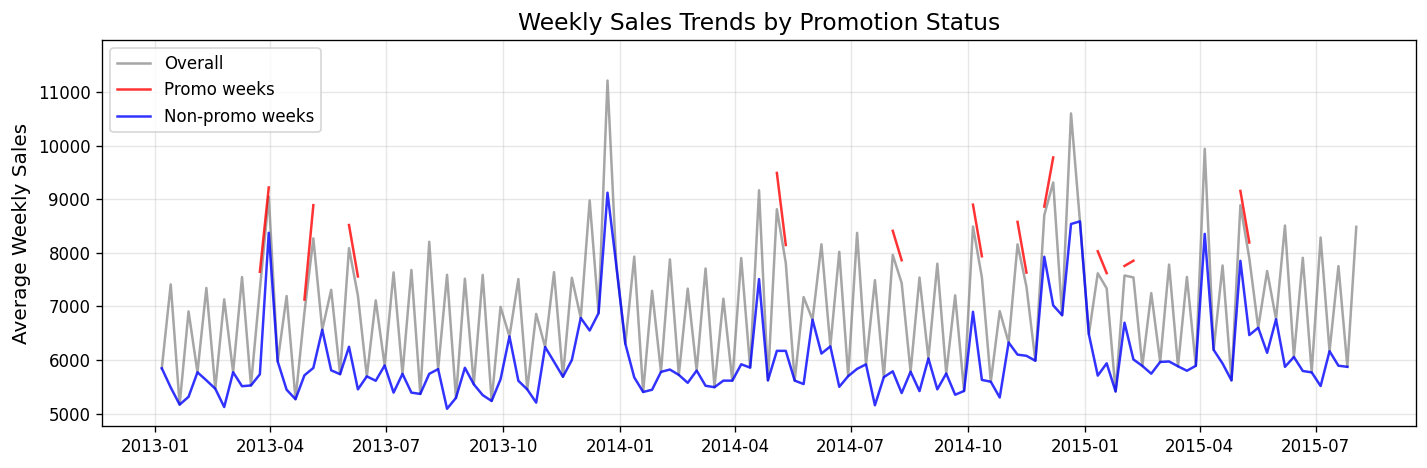


Competition effects analysis:
DCI-Sales correlation: 0.120
DCI-Promo correlation: 0.003


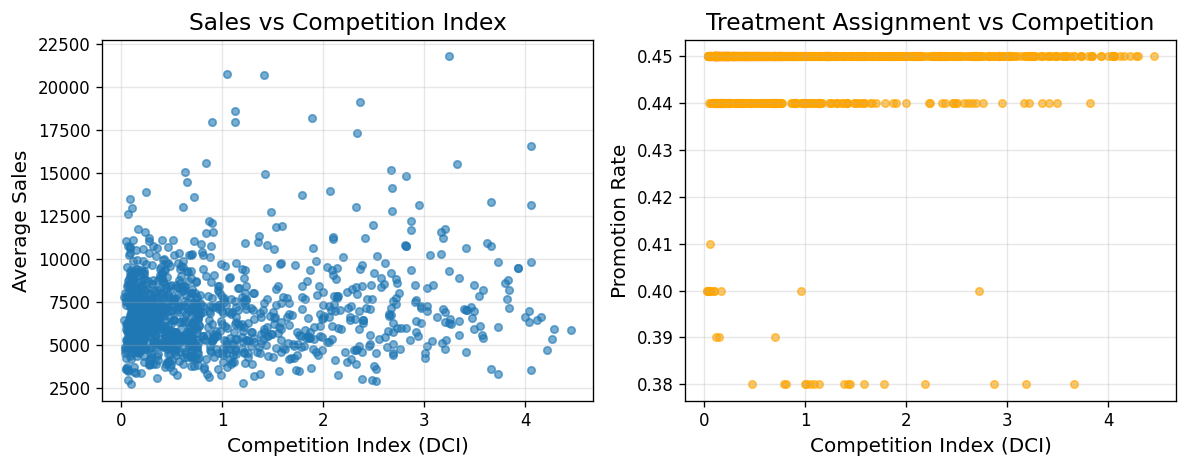


Seasonal promotion variation: 0.0274
  -> Calendar controls needed for identification
Treatment effect stability: 3.9% change over time

Extended EDA complete


In [8]:
# Step 3b: Extended EDA for causal modeling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load data
ARTIFACTS_DIR = Path("./artifacts")
FIG_DIR = FIG_DIR if "FIG_DIR" in globals() else Path("figures"); FIG_DIR.mkdir(parents=True, exist_ok=True)

df = pd.read_parquet(ARTIFACTS_DIR / "clean.parquet")
df = df[df["Open"] == 1].copy()

print(f"Extended analysis on {len(df):,} open-day records")

# Time trends comparison - important for paper
plt.figure(figsize=(12, 4))
weekly = df.set_index("Date")["Sales"].resample("W").mean()
weekly_promo = df[df["Promo"] == 1].set_index("Date")["Sales"].resample("W").mean()
weekly_no_promo = df[df["Promo"] == 0].set_index("Date")["Sales"].resample("W").mean()

plt.plot(weekly.index, weekly.values, label="Overall", alpha=0.7, color="gray")
plt.plot(weekly_promo.index, weekly_promo.values, label="Promo weeks", alpha=0.8, color="red")
plt.plot(weekly_no_promo.index, weekly_no_promo.values, label="Non-promo weeks", alpha=0.8, color="blue")
plt.title("Weekly Sales Trends by Promotion Status")
plt.ylabel("Average Weekly Sales")
plt.legend()
plt.grid(True, alpha=0.3)

if "show_and_save" in globals():
    show_and_save("weekly_trends_detailed.png")
else:
    plt.tight_layout()
    plt.savefig(FIG_DIR / "weekly_trends_detailed.png", bbox_inches="tight")
    plt.show()

# Competition index relationships for confounding assessment
print("\nCompetition effects analysis:")
store_level = df.groupby("Store").agg({
    "Sales": "mean",
    "Promo": "mean", 
    "DCI": "mean"
}).round(2)

dci_sales_corr = store_level["DCI"].corr(store_level["Sales"])
dci_promo_corr = store_level["DCI"].corr(store_level["Promo"])

print(f"DCI-Sales correlation: {dci_sales_corr:.3f}")
print(f"DCI-Promo correlation: {dci_promo_corr:.3f}")

if abs(dci_promo_corr) > 0.1:
    print("  -> Strong confounding relationship detected")
elif abs(dci_promo_corr) > 0.05:
    print("  -> Moderate confounding relationship")

# DCI scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter(store_level["DCI"], store_level["Sales"], alpha=0.6, s=20)
ax1.set_xlabel("Competition Index (DCI)")
ax1.set_ylabel("Average Sales")
ax1.set_title("Sales vs Competition Index")
ax1.grid(True, alpha=0.3)

ax2.scatter(store_level["DCI"], store_level["Promo"], alpha=0.6, s=20, color="orange")
ax2.set_xlabel("Competition Index (DCI)")
ax2.set_ylabel("Promotion Rate")
ax2.set_title("Treatment Assignment vs Competition")
ax2.grid(True, alpha=0.3)

if "show_and_save" in globals():
    show_and_save("dci_relationships.png")
else:
    plt.tight_layout()
    plt.savefig(FIG_DIR / "dci_relationships.png", bbox_inches="tight")
    plt.show()

# Promotion timing patterns
monthly_promo = df.groupby(df["Date"].dt.month)["Promo"].mean()
seasonal_var = monthly_promo.std()
print(f"\nSeasonal promotion variation: {seasonal_var:.4f}")
if seasonal_var > 0.02:
    print("  -> Calendar controls needed for identification")

# Temporal stability check
mid_date = df["Date"].quantile(0.5)
early = df[df["Date"] <= mid_date]
late = df[df["Date"] > mid_date]

early_effect = early.groupby("Promo")["Sales"].mean().diff().iloc[-1]
late_effect = late.groupby("Promo")["Sales"].mean().diff().iloc[-1]

print(f"Treatment effect stability: {abs(early_effect - late_effect)/early_effect:.1%} change over time")

print("\nExtended EDA complete")

Loaded 1,017,209 rows from 1115 stores
Validating lag features: [7, 14, 28]

Lag Feature Validation

Checking Sales_lag7:
  Overall match rate: 1.0000
  Median store match: 1.0000
  Stores with <99.99% match: 0
  Stores with non-NaN in first 7 rows: 0

Checking Sales_lag14:
  Overall match rate: 1.0000
  Median store match: 1.0000
  Stores with <99.99% match: 0
  Stores with non-NaN in first 14 rows: 0

Checking Sales_lag28:
  Overall match rate: 1.0000
  Median store match: 1.0000
  Stores with <99.99% match: 0
  Stores with non-NaN in first 28 rows: 0

Validation Summary:
  Features validated: 3
  Passed: 3
  Overall status: PASS


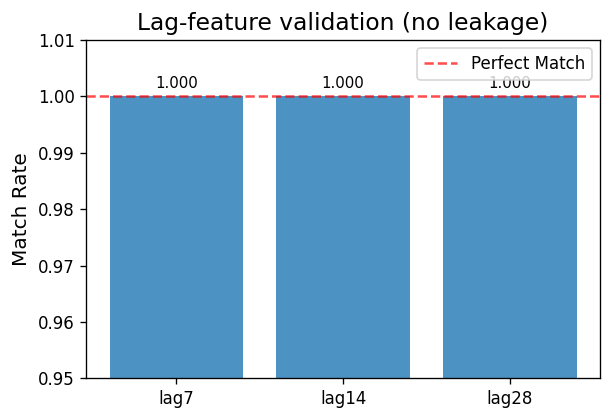

Lag feature validation complete


In [9]:
# Step 3c: Lag feature validation (no future information leakage)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json

TOLERANCE = 1e-4

def find_clean_data():
    """Find clean data file with fallback options"""
    for p in [Path("artifacts/clean.parquet"), Path("clean.parquet")]:
        if p.exists(): 
            return p
    raise FileNotFoundError("clean.parquet not found")

# Load and prepare data
data_path = find_clean_data()
df = pd.read_parquet(data_path).sort_values(["Store","Date"]).copy()
print(f"Loaded {len(df):,} rows from {df['Store'].nunique()} stores")

# Identify lag features to validate
lag_features = [k for k in (7, 14, 28) if f"Sales_lag{k}" in df.columns]
print(f"Validating lag features: {lag_features}")

validation_results = {}

print("\nLag Feature Validation")

for k in lag_features:
    print(f"\nChecking Sales_lag{k}:")
    
    # Manually compute the correct lag
    true_lag = df.groupby("Store", sort=False)["Sales"].shift(k)
    eng_lag = df[f"Sales_lag{k}"]
    
    # Compare where both are non-null
    valid = true_lag.notna() & eng_lag.notna()
    if not valid.any():
        print("  WARNING: No comparable rows (all NaN)")
        continue
    
    # Check match rate
    matches = np.isclose(true_lag[valid], eng_lag[valid], rtol=0.0, atol=TOLERANCE)
    overall_match = float(matches.mean())
    
    # Store-level validation
    store_validation = (pd.DataFrame({
        "Store": df.loc[valid, "Store"].values,
        "match": matches
    }).groupby("Store")["match"].mean())
    
    median_store_match = float(store_validation.median()) if len(store_validation) else np.nan
    low_match_stores = int((store_validation < 0.9999).sum()) if len(store_validation) else 0
    
    # Check first k rows per store should be NaN
    bad_first = int((~df.groupby("Store", sort=False)[f"Sales_lag{k}"]
                      .apply(lambda s: s.head(k).isna().all())).sum())
    
    print(f"  Overall match rate: {overall_match:.4f}")
    print(f"  Median store match: {median_store_match:.4f}")
    print(f"  Stores with <99.99% match: {low_match_stores}")
    print(f"  Stores with non-NaN in first {k} rows: {bad_first}")
    
    status = "PASS" if overall_match >= 0.9999 and bad_first == 0 else "FAIL"
    
    validation_results[f"lag{k}"] = {
        "overall_match": overall_match,
        "median_store_match": median_store_match,
        "low_match_stores": low_match_stores,
        "bad_first_rows": bad_first,
        "status": status
    }

# Generate validation summary
ARTIFACTS_DIR = Path("artifacts"); ARTIFACTS_DIR.mkdir(exist_ok=True)
FIG_DIR = Path("figures"); FIG_DIR.mkdir(exist_ok=True)

pass_count = sum(1 for v in validation_results.values() if v["status"] == "PASS")
total_count = len(validation_results)
final_status = "PASS" if pass_count == total_count and total_count > 0 else "ISSUES_FOUND"

print(f"\nValidation Summary:")
print(f"  Features validated: {total_count}")
print(f"  Passed: {pass_count}")
print(f"  Overall status: {final_status}")

# Save validation results
validation_summary = {
    "validation_timestamp": pd.Timestamp.now().strftime("%Y-%m-%d %H:%M:%S"),
    "feature_results": validation_results,
    "overall_status": final_status,
    "pass_rate": f"{pass_count}/{total_count}",
    "description": "Validate lag features contain no future information"
}

with open(ARTIFACTS_DIR / "leakage_validation.json", "w") as f:
    json.dump(validation_summary, f, indent=2)

# Save detailed results table
results_df = (pd.DataFrame(validation_results).T
              .reset_index()
              .rename(columns={"index": "feature"}))
results_df.to_csv(ARTIFACTS_DIR / "leakage_validation_summary.csv", index=False)

# Create validation plot - corresponds to Figure 3 in paper
if validation_results:
    feats = list(validation_results.keys())
    rates = [validation_results[k]["overall_match"] for k in feats]
    
    plt.figure(figsize=(5.2, 3.6))
    bars = plt.bar(feats, rates, color="C0", alpha=0.8)
    plt.axhline(1.0, linestyle="--", color="red", alpha=0.7, label="Perfect Match")
    plt.ylim(0.95, 1.01)
    plt.ylabel("Match Rate")
    plt.title("Lag-feature validation (no leakage)")
    plt.legend()
    
    # Add value labels on bars
    for bar, rate in zip(bars, rates):
        plt.text(bar.get_x() + bar.get_width()/2, rate + 0.001, 
                f'{rate:.3f}', ha='center', va='bottom', fontsize=9)
    
    if "show_and_save" in globals():
        show_and_save("lag_feature_validation.png")
    else:
        plt.tight_layout()
        plt.savefig(FIG_DIR / "lag_feature_validation.png", dpi=200, bbox_inches="tight")
        plt.show()

print("Lag feature validation complete")

In [10]:
# Step 4: Feature preparation for causal analysis

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from pathlib import Path

GLOBAL_SEED = 42
SPLIT_DATE = pd.Timestamp("2015-06-01")

def add_seasonal_features(df):
    """Add cyclical month features using sin/cos transformation"""
    month_normalized = (df["Month"].astype(int) - 1).clip(0, 11)
    df["Month_sin"] = np.sin(2 * np.pi * month_normalized / 12.0)
    df["Month_cos"] = np.cos(2 * np.pi * month_normalized / 12.0)
    return df

def load_clean_data():
    """Load cleaned data and add features"""
    clean_file = Path("artifacts/clean.parquet")
    if not clean_file.exists():
        raise FileNotFoundError("Run preprocessing first")
    
    df = pd.read_parquet(clean_file)
    df = df[df["Open"] == 1].copy()
    df = add_seasonal_features(df)
    
    print(f"Loaded {len(df):,} records from {df['Store'].nunique()} stores")
    return df

def setup_causal_variables(df):
    """Define treatment, outcome, and covariates"""
    treatment_var = "Promo"
    outcome_var = "Sales"
    
    # Pre-treatment covariates only
    covariates = [
        "StoreType", "Assortment", "DCI", "CompetitionDistance",
        "DayOfWeek", "Month_sin", "Month_cos", "IsMonthEnd", "IsQuarterEnd",
        "SchoolHoliday", "StateHoliday",
        "Sales_lag7", "Sales_lag14", "Sales_lag28",
        "Sales_rollmean7", "Sales_rollmean28",
        "Promo2", "IsPromoMonth", "Promo2SinceWeek", "Promo2SinceYear"
    ]
    
    available_covariates = [c for c in covariates if c in df.columns]
    missing_vars = [c for c in covariates if c not in df.columns]
    
    if missing_vars:
        print(f"Warning: Missing variables: {missing_vars}")
    
    print(f"Variables: {treatment_var} -> {outcome_var}, {len(available_covariates)} covariates")
    return treatment_var, outcome_var, available_covariates

def build_preprocessing_pipeline(df, covariates):
    """Create preprocessing pipeline"""
    categorical_features = []
    numeric_features = []
    
    for col in covariates:
        if col in ["StoreType", "Assortment", "StateHoliday", "DayOfWeek"]:
            categorical_features.append(col)
        else:
            numeric_features.append(col)
    
    print(f"Pipeline: {len(numeric_features)} numeric, {len(categorical_features)} categorical")
    
    numeric_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])
    
    try:
        categorical_encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
    except TypeError:
        categorical_encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
    
    preprocessor = ColumnTransformer([
        ("numeric", numeric_pipeline, numeric_features),
        ("categorical", categorical_encoder, categorical_features)
    ], remainder='drop')
    
    return preprocessor, numeric_features, categorical_features

def create_time_split(df, split_date=SPLIT_DATE):
    """Time-based train/test split"""
    split_timestamp = pd.Timestamp(split_date)
    
    train_data = df[df["Date"] < split_timestamp].copy()
    test_data = df[df["Date"] >= split_timestamp].copy()
    
    print(f"Split at {split_timestamp.date()}: train={len(train_data):,}, test={len(test_data):,}")
    
    train_rate = train_data["Promo"].mean()
    test_rate = test_data["Promo"].mean()
    print(f"Treatment rates: train={train_rate:.3f}, test={test_rate:.3f}")
    
    return train_data, test_data

def get_feature_names_safely(preprocessor, numeric_cols, categorical_cols):
    """Extract feature names with sklearn version compatibility"""
    feature_names = list(numeric_cols)
    
    try:
        cat_encoder = preprocessor.named_transformers_['categorical']
        cat_names = cat_encoder.get_feature_names_out(categorical_cols)
        feature_names.extend(cat_names)
    except AttributeError:
        try:
            cat_names = cat_encoder.get_feature_names(categorical_cols)
            feature_names.extend(cat_names)
        except:
            print("Warning: Using generic categorical names")
            cat_names = [f"cat_{i}" for i in range(len(categorical_cols) * 2)]
            feature_names.extend(cat_names)
    
    return feature_names

def prepare_features_for_causal_analysis():
    """Main feature preparation pipeline"""
    print("Feature preparation starting...")
    
    df = load_clean_data()
    treatment_var, outcome_var, covariate_list = setup_causal_variables(df)
    train_df, test_df = create_time_split(df)
    preprocessor, numeric_cols, categorical_cols = build_preprocessing_pipeline(train_df, covariate_list)
    
    # Fit on train, transform both
    X_train = preprocessor.fit_transform(train_df[covariate_list])
    X_test = preprocessor.transform(test_df[covariate_list])
    
    y_train = train_df[outcome_var].values.astype(float)
    y_test = test_df[outcome_var].values.astype(float)
    t_train = train_df[treatment_var].values.astype(int)
    t_test = test_df[treatment_var].values.astype(int)
    
    feature_names = get_feature_names_safely(preprocessor, numeric_cols, categorical_cols)
    
    print(f"Final shapes: X_train={X_train.shape}, X_test={X_test.shape}")
    print(f"Missing values: train={np.isnan(X_train).sum()}, test={np.isnan(X_test).sum()}")
    
    return {
        "X_train": X_train, "X_test": X_test,
        "y_train": y_train, "y_test": y_test,
        "t_train": t_train, "t_test": t_test,
        "feature_names": feature_names,
        "preprocessor": preprocessor,
        "train_df": train_df, "test_df": test_df,
        "variables": {"treatment": treatment_var, "outcome": outcome_var, "covariates": covariate_list},
        "split_info": {"split_date": SPLIT_DATE, "train_size": len(train_df), "test_size": len(test_df)}
    }

# Execute preparation and validation
prepared_data = prepare_features_for_causal_analysis()

# Validation checks
Xtr, Xte = prepared_data['X_train'], prepared_data['X_test']
ttr, tte = prepared_data['t_train'], prepared_data['t_test']
feat_names = prepared_data['feature_names']

# Data integrity checks
assert Xtr.shape[1] == len(feat_names) == Xte.shape[1], "Feature dimension mismatch"
assert not np.isnan(Xtr).any() and not np.isnan(Xte).any(), "Found NaNs after preprocessing"
assert set(np.unique(ttr)).issubset({0,1}) and set(np.unique(tte)).issubset({0,1}), "Treatment must be binary"

print("Preparation complete and validated")
print(f"Ready for analysis: {len(feat_names)} features, {Xtr.shape[0]:,} train samples")

Feature preparation starting...
Loaded 844,392 records from 1115 stores
Variables: Promo -> Sales, 20 covariates
Split at 2015-06-01: train=785,781, test=58,611
Treatment rates: train=0.445, test=0.463
Pipeline: 16 numeric, 4 categorical
Final shapes: X_train=(785781, 30), X_test=(58611, 30)
Missing values: train=0, test=0
Preparation complete and validated
Ready for analysis: 30 features, 785,781 train samples


In [11]:
# Step 5: Train/Test Split Diagnostics

import pandas as pd
import numpy as np
from pathlib import Path

# Use prepared data for consistency
try:
    train_df = prepared_data['train_df']
    test_df = prepared_data['test_df']
    print("Using prepared data from previous step")
except NameError:
    # Fallback if needed
    print("Recreating split...")
    df = pd.read_parquet("artifacts/clean.parquet")
    df = df[df["Open"]==1].copy()
    split_timestamp = pd.Timestamp("2015-06-01")
    train_df = df[df["Date"] < split_timestamp].copy()
    test_df = df[df["Date"] >= split_timestamp].copy()

print(f"\nSplit diagnostics:")
print(f"  Train: {len(train_df):,} samples")
print(f"  Test: {len(test_df):,} samples")

# Store coverage check
train_stores = set(train_df["Store"])
test_stores = set(test_df["Store"])
new_stores = test_stores - train_stores

print(f"  Stores: {len(train_stores)} train, {len(test_stores)} test")
if new_stores:
    print(f"  WARNING: {len(new_stores)} new stores in test")

# Treatment balance
train_promo = train_df["Promo"].mean()
test_promo = test_df["Promo"].mean()
balance_diff = abs(train_promo - test_promo)
print(f"  Treatment rates: train={train_promo:.3f}, test={test_promo:.3f} (diff={balance_diff:.3f})")

# Lag feature missingness
lag_cols = [c for c in train_df.columns if 'lag' in c or 'rollmean' in c]
if lag_cols:
    train_missing = train_df[lag_cols].isna().mean().mean()
    test_missing = test_df[lag_cols].isna().mean().mean()
    print(f"  Lag missingness: train={train_missing:.3f}, test={test_missing:.3f}")

# Within-store treatment variation
def has_both_arms(series):
    return (series == 1).any() and (series == 0).any()

both_train = train_df.groupby('Store')['Promo'].apply(has_both_arms).mean()
both_test = test_df.groupby('Store')['Promo'].apply(has_both_arms).mean()
print(f"  Stores with both arms: train={both_train:.1%}, test={both_test:.1%}")

# Calendar composition drift
train_dow = train_df['DayOfWeek'].value_counts(normalize=True).sort_index()
test_dow = test_df['DayOfWeek'].value_counts(normalize=True).sort_index()
dow_shift = abs(train_dow - test_dow).max()
print(f"  Max day-of-week shift: {dow_shift:.3f}")

if dow_shift > 0.05:
    print("  Consider stronger calendar controls")
if balance_diff > 0.02:
    print(" Treatment rate difference noted")

Using prepared data from previous step

Split diagnostics:
  Train: 785,781 samples
  Test: 58,611 samples
  Stores: 1115 train, 1115 test
  Treatment rates: train=0.445, test=0.463 (diff=0.018)
  Lag missingness: train=0.014, test=0.000
  Stores with both arms: train=100.0%, test=100.0%
  Max day-of-week shift: 0.020


/Users/dongyuan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dongyuan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dongyuan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dongyuan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/dongyuan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_point

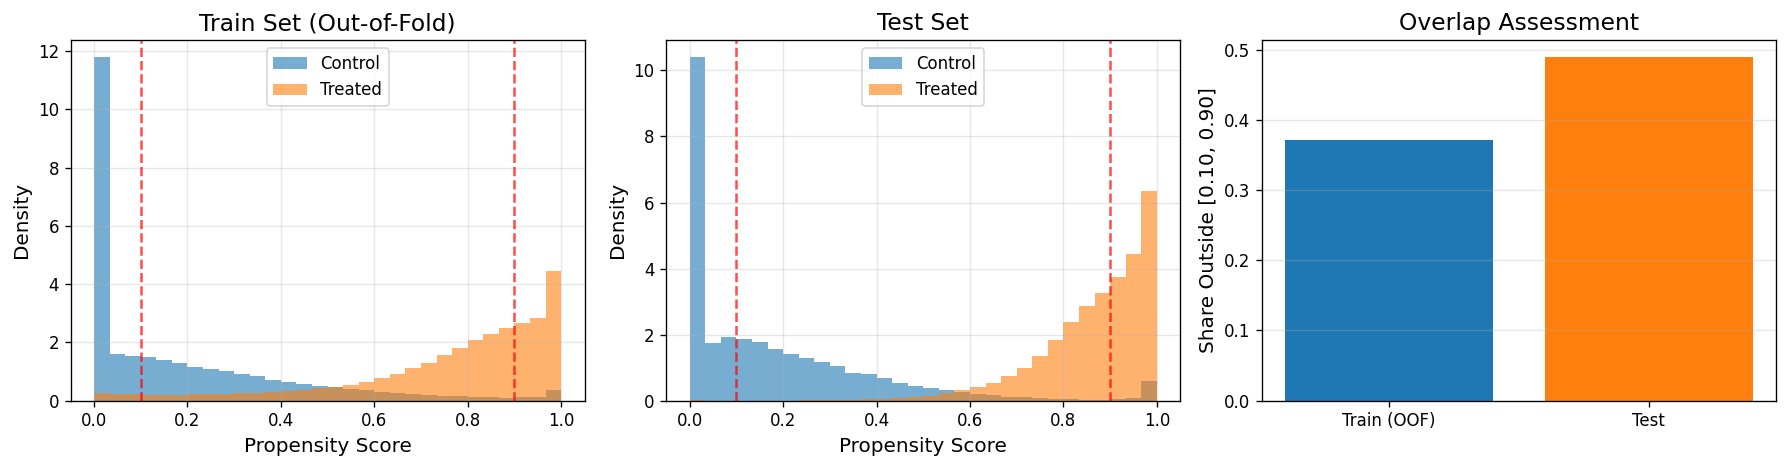

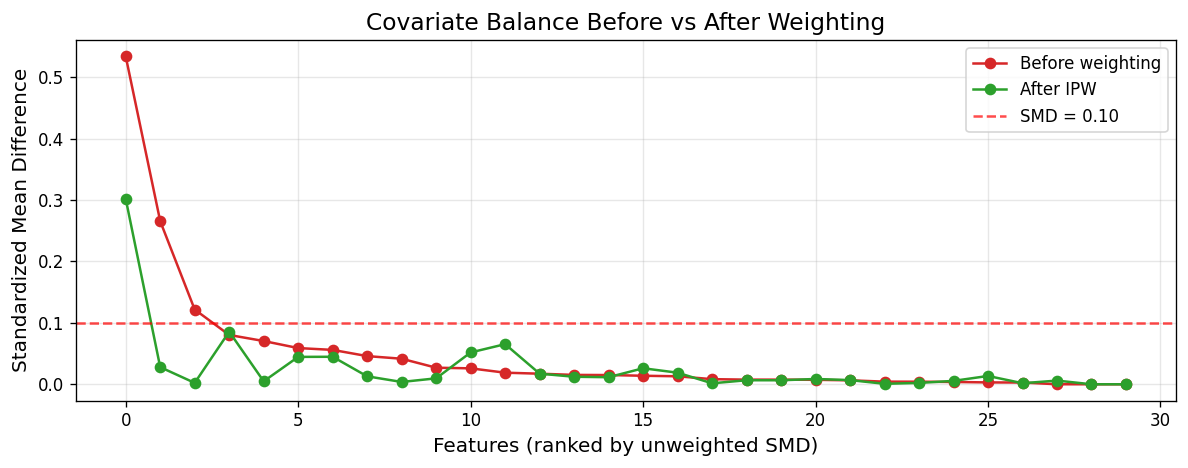

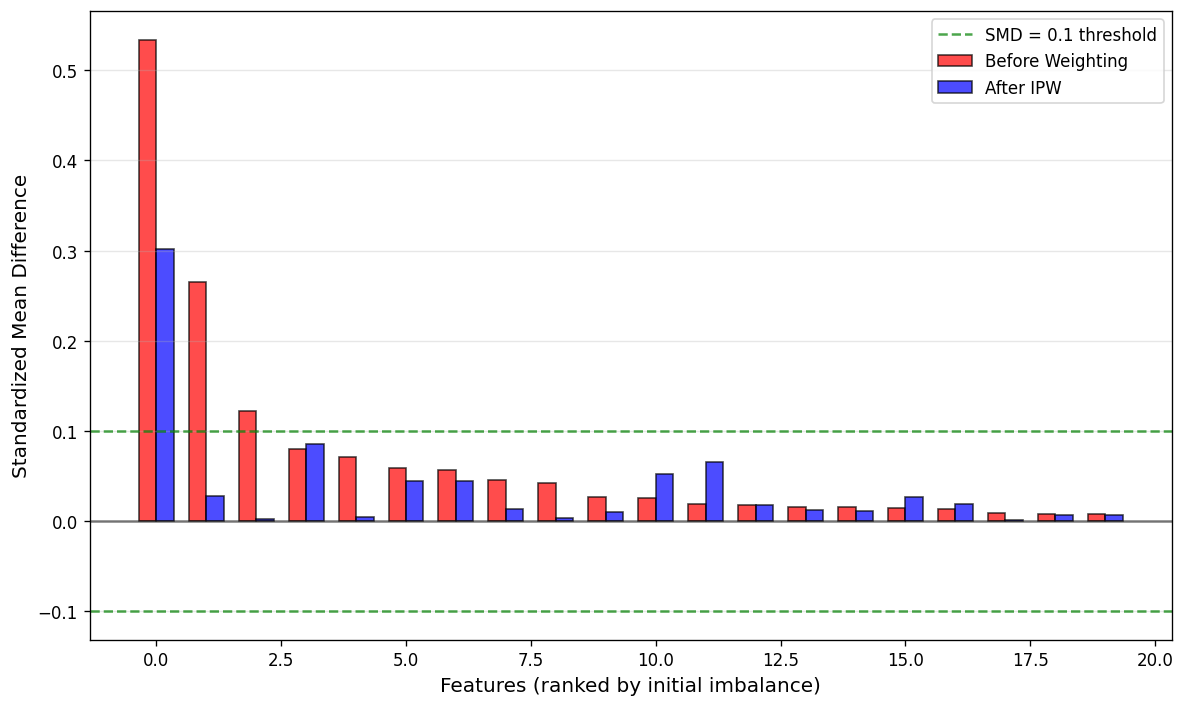

Propensity model performance:
  Train AUC: 0.933
  Test AUC: 0.974
Overlap assessment:
  Train extreme share: 0.371
  Test extreme share: 0.489
Balance improvement:
  Features with SMD > 0.10 before: 3
  Features with SMD > 0.10 after: 1


In [12]:
# Step 5a: Propensity scores and overlap diagnostics

import json
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import TimeSeriesSplit  # FIXED: Use TimeSeriesSplit instead of KFold

# Use prepared data from previous steps
if 'prepared_data' not in globals():
    raise RuntimeError("prepared_data not found. Run Step 4 first.")

X_train = prepared_data['X_train']
X_test = prepared_data['X_test']
t_train = prepared_data['t_train']
t_test = prepared_data['t_test']
train_df = prepared_data['train_df'].copy()
test_df = prepared_data['test_df'].copy()
feat_names = prepared_data.get('feature_names', [f'f{i}' for i in range(X_train.shape[1])])

# Overlap bounds for trimming
TRIM_BOUNDS = (0.10, 0.90)

FIG_DIR = FIG_DIR if "FIG_DIR" in globals() else Path("figures"); FIG_DIR.mkdir(parents=True, exist_ok=True)
ARTIFACTS_DIR = Path("artifacts"); ARTIFACTS_DIR.mkdir(parents=True, exist_ok=True)

def extreme_share(ps, lo, hi):
    """Share of samples with propensity outside [lo, hi]"""
    ps = np.asarray(ps)
    return float(((ps < lo) | (ps > hi)).mean())

def smd_unweighted(X, t):
    """Standardized mean difference without weights"""
    a, b = X[t == 1], X[t == 0]
    md = a.mean(axis=0) - b.mean(axis=0)
    ps = np.sqrt((a.var(axis=0) + b.var(axis=0)) / 2.0)
    return np.abs(md) / (ps + 1e-12)

def smd_ipw(X, t, p, cap_q=0.99):
    """SMD after inverse propensity weighting"""
    # Clip propensity scores for numerical stability
    p = np.clip(np.asarray(p), 1e-8, 1 - 1e-8)
    pt = float(t.mean())

    # IPW formula: treated weight = pt/p, control weight = (1-pt)/(1-p)
    w = t * (pt / p) + (1 - t) * ((1 - pt) / (1 - p))

    #  Truncate extreme weights
    cap = np.quantile(w, cap_q)
    w = np.minimum(w, cap)
    
    # Separate weights by treatment group
    w1 = w * (t == 1) + 1e-12 * (t == 1)
    w0 = w * (t == 0) + 1e-12 * (t == 0)

    # Calculate weighted means
    m1 = (w1[:, None] * X).sum(axis=0) / w1.sum()
    m0 = (w0[:, None] * X).sum(axis=0) / w0.sum()
    v1 = (w1[:, None] * (X - m1) ** 2).sum(axis=0) / w1.sum()
    v0 = (w0[:, None] * (X - m0) ** 2).sum(axis=0) / w0.sum()
    
    # Calculate pooled standard deviation
    pooled = np.sqrt((v1 + v0) / 2.0)

    # Return standardized mean difference
    return np.abs(m1 - m0) / (pooled + 1e-12)

# Safety check for missing values
if np.isnan(X_train).any() or np.isnan(X_test).any():
    imp = SimpleImputer(strategy="median")
    X_train = imp.fit_transform(X_train)
    X_test = imp.transform(X_test)

# Train propensity models
lr_full = LogisticRegression(max_iter=200, random_state=42)
lr_full.fit(X_train, t_train)
p_tr_full = lr_full.predict_proba(X_train)[:, 1]
p_te_full = lr_full.predict_proba(X_test)[:, 1]

# Out-of-fold propensities for train set - FIXED: Use TimeSeriesSplit for temporal data
p_tr_oof = np.empty_like(t_train, dtype=float)
p_tr_oof[:] = np.nan
tscv = TimeSeriesSplit(n_splits=5)  # FIXED: Changed from KFold to TimeSeriesSplit
for tr_idx, va_idx in tscv.split(X_train):  # FIXED: Changed from kf.split to tscv.split
    lr = LogisticRegression(max_iter=200, random_state=42)
    lr.fit(X_train[tr_idx], t_train[tr_idx])
    p_tr_oof[va_idx] = lr.predict_proba(X_train[va_idx])[:, 1]

# Propensity overlap (train OOF vs test)
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(p_tr_oof[t_train == 0], bins=30, alpha=0.6, density=True, label="Control", color="C0")
plt.hist(p_tr_oof[t_train == 1], bins=30, alpha=0.6, density=True, label="Treated", color="C1")
plt.axvline(TRIM_BOUNDS[0], ls="--", c="red", alpha=0.7)
plt.axvline(TRIM_BOUNDS[1], ls="--", c="red", alpha=0.7)
plt.title("Train Set (Out-of-Fold)")
plt.xlabel("Propensity Score")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(p_te_full[t_test == 0], bins=30, alpha=0.6, density=True, label="Control", color="C0")
plt.hist(p_te_full[t_test == 1], bins=30, alpha=0.6, density=True, label="Treated", color="C1")
plt.axvline(TRIM_BOUNDS[0], ls="--", c="red", alpha=0.7)
plt.axvline(TRIM_BOUNDS[1], ls="--", c="red", alpha=0.7)
plt.title("Test Set")
plt.xlabel("Propensity Score")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 3, 3)
extreme_train = extreme_share(p_tr_oof, *TRIM_BOUNDS)
extreme_test = extreme_share(p_te_full, *TRIM_BOUNDS)
plt.bar(["Train (OOF)", "Test"], [extreme_train, extreme_test], color=["C0", "C1"])
plt.ylabel("Share Outside [0.10, 0.90]")
plt.title("Overlap Assessment")
plt.grid(axis="y", alpha=0.3)

if "show_and_save" in globals():
    show_and_save("propensity_overlap.png")
else:
    plt.tight_layout()
    plt.savefig(FIG_DIR / "propensity_overlap.png", dpi=200, bbox_inches="tight")
    plt.show()

# Covariate balance before/after IPW
wk_mask = (train_df["DayOfWeek"] <= 5).values
switchers = train_df.groupby("Store")["Promo"].transform(lambda s: (s.min() == 0) and (s.max() == 1)).values

base = wk_mask & switchers
p_w = p_tr_oof[base]
t_w = t_train[base]
X_w = X_train[base]

# Trim to common support
keep = (p_w >= TRIM_BOUNDS[0]) & (p_w <= TRIM_BOUNDS[1])
Xk, tk, pk = X_w[keep], t_w[keep], p_w[keep]

if len(Xk) > 0:
    smd_u = smd_unweighted(Xk, tk)
    smd_w = smd_ipw(Xk, tk, pk)
    
    # Show top features by imbalance
    order = np.argsort(smd_u)[::-1]
    top = min(30, len(order))
    idx = order[:top]
    
    plt.figure(figsize=(10, 4))
    plt.plot(range(top), smd_u[idx], marker="o", lw=1.5, label="Before weighting", color="C3")
    plt.plot(range(top), smd_w[idx], marker="o", lw=1.5, label="After IPW", color="C2")
    plt.axhline(0.10, ls="--", c="red", alpha=0.7, label="SMD = 0.10")
    plt.ylabel("Standardized Mean Difference")
    plt.xlabel("Features (ranked by unweighted SMD)")
    plt.title("Covariate Balance Before vs After Weighting")
    plt.legend()
    plt.grid(alpha=0.3)
    
    if "show_and_save" in globals():
        show_and_save("balance_smd.png")
    else:
        plt.tight_layout()
        plt.savefig(FIG_DIR / "balance_smd.png", dpi=200, bbox_inches="tight")
        plt.show()


# =Covariate balance before/after IPW - MODIFIED SECTION
wk_mask = (train_df["DayOfWeek"] <= 5).values
switchers = train_df.groupby("Store")["Promo"].transform(lambda s: (s.min() == 0) and (s.max() == 1)).values

base = wk_mask & switchers
p_w = p_tr_oof[base]
t_w = t_train[base]
X_w = X_train[base]

# Trim to common support
keep = (p_w >= TRIM_BOUNDS[0]) & (p_w <= TRIM_BOUNDS[1])
Xk, tk, pk = X_w[keep], t_w[keep], p_w[keep]

if len(Xk) > 0:
    smd_u = smd_unweighted(Xk, tk)
    smd_w = smd_ipw(Xk, tk, pk)
    
    # Modified plotting section for better academic presentation
    order = np.argsort(smd_u)[::-1]
    top = min(20, len(order))  # Show top 20 features by imbalance
    idx = order[:top]
    
    plt.figure(figsize=(10, 6))
    x = np.arange(top)
    width = 0.35
    
    # Bar chart format following academic standards
    plt.bar(x - width/2, smd_u[idx], width, 
            label='Before Weighting', alpha=0.7, color='red', edgecolor='black')
    plt.bar(x + width/2, smd_w[idx], width, 
            label='After IPW', alpha=0.7, color='blue', edgecolor='black')
    
    # Reference lines
    plt.axhline(0.1, color='green', linestyle='--', alpha=0.7, label='SMD = 0.1 threshold')
    plt.axhline(-0.1, color='green', linestyle='--', alpha=0.7)
    plt.axhline(0, color='black', linestyle='-', alpha=0.5)
    
    plt.xlabel('Features (ranked by initial imbalance)')
    plt.ylabel('Standardized Mean Difference')
    plt.legend()
    plt.grid(alpha=0.3, axis='y')
    
    if "show_and_save" in globals():
        show_and_save("balance_smd.png")
    else:
        plt.tight_layout()
        plt.savefig(FIG_DIR / "balance_smd.png", dpi=200, bbox_inches="tight")
        plt.show()

# Summary statistics
auc_train = roc_auc_score(t_train, p_tr_full)
auc_test = roc_auc_score(t_test, p_te_full)

print(f"Propensity model performance:")
print(f"  Train AUC: {auc_train:.3f}")
print(f"  Test AUC: {auc_test:.3f}")
print(f"Overlap assessment:")
print(f"  Train extreme share: {extreme_train:.3f}")
print(f"  Test extreme share: {extreme_test:.3f}")
if len(Xk) > 0:
    print(f"Balance improvement:")
    print(f"  Features with SMD > 0.10 before: {(smd_u > 0.10).sum()}")
    print(f"  Features with SMD > 0.10 after: {(smd_w > 0.10).sum()}")

# Save artifacts
summary = {
    "auc": {"train": float(auc_train), "test": float(auc_test)},
    "extreme_share": {"train_oof": extreme_train, "test": extreme_test},
    "trim_bounds": TRIM_BOUNDS,
}

with open(ARTIFACTS_DIR / "propensity_diagnostics.json", "w") as f:
    json.dump(summary, f, indent=2)

np.savez_compressed(
    ARTIFACTS_DIR / "propensity_scores.npz",
    p_train_standard=p_tr_full,
    p_test_standard=p_te_full,
    p_train_oof_standard=p_tr_oof,
    t_train=t_train,
    t_test=t_test,
    feature_names=np.array(feat_names),
)

Common support trimming: kept 363,245/785,781 (46.2%) observations


/Users/dongyuan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dongyuan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dongyuan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dongyuan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/dongyuan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_point


ATE estimates on training data:
  Naive: 2068.0
  IPTW: 2123.6
  DR: 2130.4
  DML: 860.2


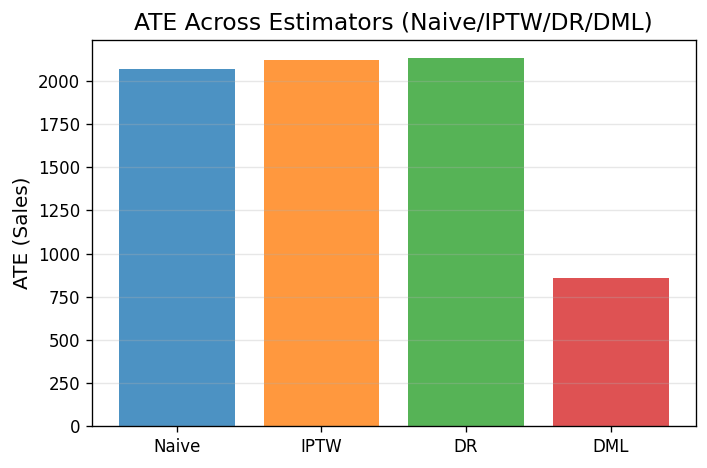


Estimating CATE using T-learner...
CATE summary: mean=2231.0, median=1860.8, 95% CI=[2220.4, 2243.2]


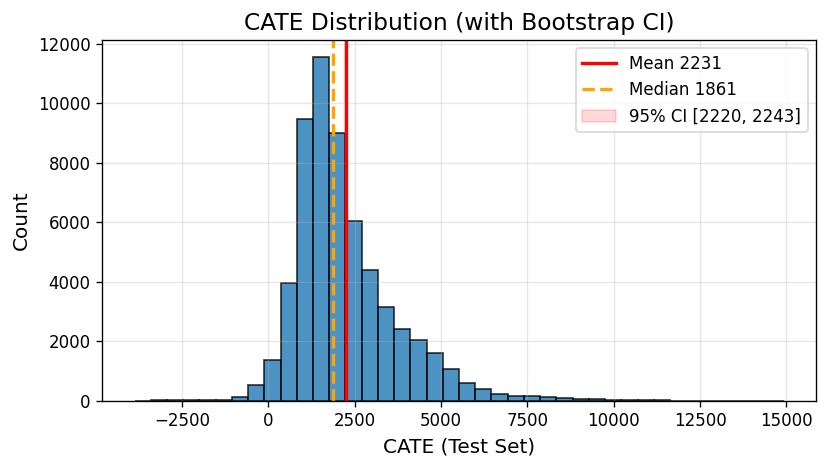

/var/folders/n_/341xc1cx79d6x6p1qt4_nkj00000gn/T/ipykernel_54589/690307881.py:189: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data, labels=order, showfliers=False, patch_artist=True)
/var/folders/n_/341xc1cx79d6x6p1qt4_nkj00000gn/T/ipykernel_54589/690307881.py:189: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data, labels=order, showfliers=False, patch_artist=True)


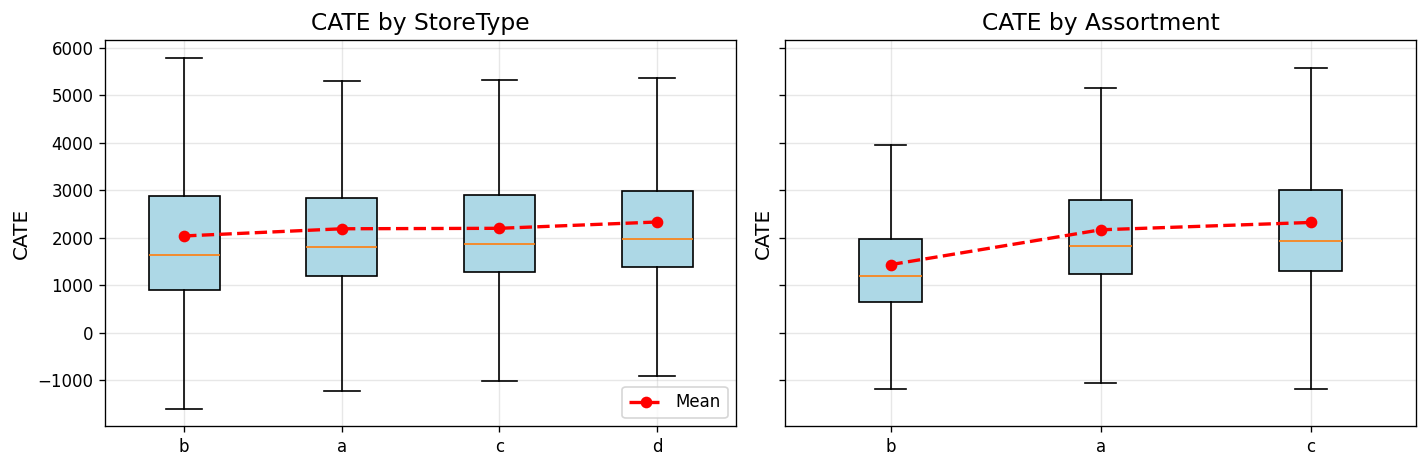

In [13]:
# Step 5b: ATE and CATE estimation with heterogeneity analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.utils import resample

# Load prepared data
if 'prepared_data' not in globals():
    raise RuntimeError("prepared_data not found. Run Step 4 first.")

Xtr = np.asarray(prepared_data['X_train'])
Xte = np.asarray(prepared_data['X_test'])
ytr = np.asarray(prepared_data['y_train']).astype(float)
yte = np.asarray(prepared_data['y_test']).astype(float)
ttr = np.asarray(prepared_data['t_train']).astype(int)
tte = np.asarray(prepared_data['t_test']).astype(int)
train_df = prepared_data['train_df'].copy()
test_df = prepared_data['test_df'].copy()
feat_names = prepared_data.get('feature_names', [f'f{i}' for i in range(Xtr.shape[1])])

TRIM_BOUNDS = (0.10, 0.90)
lo, hi = TRIM_BOUNDS

FIG_DIR = FIG_DIR if "FIG_DIR" in globals() else Path("figures"); FIG_DIR.mkdir(parents=True, exist_ok=True)

# Load propensity scores or fit new model
ps_file = Path("artifacts/propensity_scores.npz")
if ps_file.exists():
    arr = np.load(ps_file)
    p_tr = arr['p_train_oof_standard'] if 'p_train_oof_standard' in arr.files else arr['p_train_standard']
    p_te = arr['p_test_standard']
else:
    lr = LogisticRegression(max_iter=200, random_state=42).fit(Xtr, ttr)
    p_tr = lr.predict_proba(Xtr)[:,1]
    p_te = lr.predict_proba(Xte)[:,1]

p_tr = np.clip(p_tr, 1e-6, 1-1e-6)
p_te = np.clip(p_te, 1e-6, 1-1e-6)

# Trim to common support on train
keep = (p_tr >= lo) & (p_tr <= hi)
Xtr_k, ytr_k, ttr_k, p_tr_k = Xtr[keep], ytr[keep], ttr[keep], p_tr[keep]

print(f"Common support trimming: kept {keep.sum():,}/{len(keep):,} ({keep.mean():.1%}) observations")

# ATE estimators
def ate_naive(y, t):
    """Simple difference in means"""
    return float(y[t==1].mean() - y[t==0].mean())

def ate_iptw(y, t, p):
    """Inverse propensity weighting"""
    p = np.clip(p, 1e-6, 1-1e-6)
    w1 = t / p
    w0 = (1-t) / (1-p)
    tau = (w1*y).sum()/w1.sum() - (w0*y).sum()/w0.sum()
    return float(tau)

def ate_dr(X, y, t, p):
    """Doubly robust estimator"""
    m1 = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1).fit(X[t==1], y[t==1])
    m0 = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1).fit(X[t==0], y[t==0])
    mu1 = m1.predict(X)
    mu0 = m0.predict(X)
    p = np.clip(p, 1e-6, 1-1e-6)
    term1 = mu1 - mu0
    term2 = t*(y-mu1)/p - (1-t)*(y-mu0)/(1-p)
    return float(np.mean(term1 + term2))

def ate_dml(X, y, t, n_splits=2):
    """Double ML with cross-fitting"""
    kf = KFold(n_splits=n_splits, shuffle=False)
    y_tilde = np.zeros_like(y, dtype=float)
    t_tilde = np.zeros_like(t, dtype=float)

    for tr, va in kf.split(X):
        # Outcome model
        m = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
        m.fit(X[tr], y[tr])
        mu = m.predict(X[va])

        # Treatment model
        g = LogisticRegression(max_iter=200, random_state=42)
        g.fit(X[tr], t[tr])
        p_hat = np.clip(g.predict_proba(X[va])[:,1], 1e-6, 1-1e-6)

        y_tilde[va] = y[va] - mu
        t_tilde[va] = t[va] - p_hat

    # Final regression
    lr = LinearRegression(fit_intercept=False)
    lr.fit(t_tilde.reshape(-1,1), y_tilde)
    return float(lr.coef_[0])

# Compute ATE estimates on trimmed training data
estimates = {
    "Naive": ate_naive(ytr_k, ttr_k),
    "IPTW": ate_iptw(ytr_k, ttr_k, p_tr_k),
    "DR": ate_dr(Xtr_k, ytr_k, ttr_k, p_tr_k),
    "DML": ate_dml(Xtr_k, ytr_k, ttr_k, n_splits=2),
}

print(f"\nATE estimates on training data:")
for method, estimate in estimates.items():
    print(f"  {method}: {estimate:.1f}")

# FIGURE 5.3: ATE comparison
plt.figure(figsize=(6, 4))
names = list(estimates.keys())
vals = [estimates[k] for k in names]
colors = ['C0', 'C1', 'C2', 'C3']
plt.bar(names, vals, color=colors, alpha=0.8)
plt.ylabel("ATE (Sales)")
plt.title("ATE Across Estimators (Naive/IPTW/DR/DML)")
plt.grid(axis='y', alpha=0.3)

if "show_and_save" in globals():
    show_and_save("ate_comparison.png")
else:
    plt.tight_layout()
    plt.savefig(FIG_DIR / "ate_comparison.png", dpi=200, bbox_inches="tight")
    plt.show()

# CATE estimation using T-learner on test set
print("\nEstimating CATE using T-learner...")
rf1 = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1).fit(Xtr_k[ttr_k==1], ytr_k[ttr_k==1])
rf0 = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1).fit(Xtr_k[ttr_k==0], ytr_k[ttr_k==0])
mu1_te = rf1.predict(Xte)
mu0_te = rf0.predict(Xte)
cate_te = mu1_te - mu0_te

# Bootstrap confidence interval for mean CATE
B = 200
boot_means = []
n = len(cate_te)
for _ in range(B):
    idx = np.random.randint(0, n, n)
    boot_means.append(float(np.mean(cate_te[idx])))
ci_lo, ci_hi = np.percentile(boot_means, [2.5, 97.5])
m_mean, m_median = float(np.mean(cate_te)), float(np.median(cate_te))

print(f"CATE summary: mean={m_mean:.1f}, median={m_median:.1f}, 95% CI=[{ci_lo:.1f}, {ci_hi:.1f}]")

# FIGURE 5.4: CATE distribution
plt.figure(figsize=(7, 4))
plt.hist(cate_te, bins=40, alpha=0.8, color='C0', edgecolor='black')
plt.axvline(m_mean, ls='-', lw=2, color='red', label=f"Mean {m_mean:.0f}")
plt.axvline(m_median, ls='--', lw=2, color='orange', label=f"Median {m_median:.0f}")
plt.axvspan(ci_lo, ci_hi, alpha=0.15, color='red', label=f"95% CI [{ci_lo:.0f}, {ci_hi:.0f}]")
plt.xlabel("CATE (Test Set)")
plt.ylabel("Count")
plt.title("CATE Distribution (with Bootstrap CI)")
plt.legend()
plt.grid(alpha=0.3)

if "show_and_save" in globals():
    show_and_save("cate_distribution.png")
else:
    plt.tight_layout()
    plt.savefig(FIG_DIR / "cate_distribution.png", dpi=200, bbox_inches="tight")
    plt.show()

# FIGURE 5.5: Heterogeneity by store attributes
attr_cols = [c for c in ["StoreType", "Assortment"] if c in test_df.columns]
if not attr_cols:
    print("Warning: StoreType/Assortment not found, skipping heterogeneity analysis")
else:
    te_plot = test_df.copy()
    te_plot["CATE"] = cate_te

    fig, axes = plt.subplots(1, len(attr_cols), figsize=(6*len(attr_cols), 4), sharey=True)
    if len(attr_cols) == 1:
        axes = [axes]

    for ax, col in zip(axes, attr_cols):
        grp = te_plot[[col, "CATE"]].dropna()
        if len(grp) == 0:
            continue
            
        # Order by mean CATE
        order = grp.groupby(col)["CATE"].mean().sort_values().index.tolist()
        data = [grp.loc[grp[col]==lvl, "CATE"].values for lvl in order]
        
        bp = ax.boxplot(data, labels=order, showfliers=False, patch_artist=True)
        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')
            
        means = [np.mean(x) for x in data]
        ax.plot(range(1, len(order)+1), means, marker="o", linestyle="--", 
                color='red', linewidth=2, markersize=6, label="Mean")
        ax.set_title(f"CATE by {col}")
        ax.set_ylabel("CATE")
        ax.grid(alpha=0.3)

    if len(attr_cols) > 0:
        axes[0].legend()

    if "show_and_save" in globals():
        show_and_save("heterogeneity_by_attributes.png")
    else:
        plt.tight_layout()
        plt.savefig(FIG_DIR / "heterogeneity_by_attributes.png", dpi=200, bbox_inches="tight")
        plt.show()

In [14]:
# Step 6: Non-causal forecasting baseline

import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# RMSE compatibility
try:
    from sklearn.metrics import root_mean_squared_error as rmse
except ImportError:
    from sklearn.metrics import mean_squared_error
    def rmse(y_true, y_pred): 
        return mean_squared_error(y_true, y_pred, squared=False)

# Load data using established path
clean_file = Path("artifacts/clean.parquet")
if not clean_file.exists():
    raise FileNotFoundError("Run preprocessing first")

df = pd.read_parquet(clean_file)
df = df[df["Open"] == 1].copy()

# Time split
SPLIT_DATE = pd.Timestamp("2015-06-01")
train = df[df["Date"] < SPLIT_DATE].copy()
test = df[df["Date"] >= SPLIT_DATE].copy()

print("Non-causal forecasting baseline")
print(f"Train: {len(train):,} samples | Test: {len(test):,} samples")

# Features for sales prediction (non-causal)
features = [
    "DayOfWeek", "Month", "WeekOfYear", "IsMonthEnd", "IsQuarterEnd",
    "SchoolHoliday", "StateHoliday", "StoreType", "Assortment", 
    "DCI", "CompetitionDistance",
    "Sales_lag7", "Sales_lag14", "Sales_lag28",
    "Sales_rollmean7", "Sales_rollmean28",
    "Promo", "Promo2", "IsPromoMonth"  # Include current promo info
]

available_features = [f for f in features if f in df.columns]
print(f"Using {len(available_features)} features")

# Prepare data
X_train_raw = train[available_features]
X_test_raw = test[available_features]

# One-hot encoding
X_train = pd.get_dummies(X_train_raw, drop_first=True)
X_test = pd.get_dummies(X_test_raw, drop_first=True)
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

y_train = train["Sales"].values
y_test = test["Sales"].values

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_train_clean = imputer.fit_transform(X_train)
X_test_clean = imputer.transform(X_test)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_train_clean, y_train)

# Predictions and evaluation
rf_pred = rf.predict(X_test_clean)
rf_rmse = rmse(y_test, rf_pred)

# Naive baseline (lag-7 or median)
if "Sales_lag7" in test.columns:
    naive_pred = test["Sales_lag7"].fillna(train["Sales"].median()).values
else:
    naive_pred = np.full(len(y_test), train["Sales"].median())
naive_rmse = rmse(y_test, naive_pred)

print(f"\nForecasting Results:")
print(f"  Random Forest RMSE: {rf_rmse:,.0f}")
print(f"  Naive baseline RMSE: {naive_rmse:,.0f}")

if naive_rmse > 0:
    improvement = (naive_rmse - rf_rmse) / naive_rmse * 100
    print(f"  Improvement: {improvement:.1f}%")

# Feature importance
importances = rf.feature_importances_
feature_names = X_train.columns
top_idx = np.argsort(importances)[::-1][:10]

print(f"\nTop 10 features:")
for i, idx in enumerate(top_idx, 1):
    print(f"  {i:2}. {feature_names[idx]:<20} {importances[idx]:.3f}")

print("Forecasting baseline complete")

Non-causal forecasting baseline
Train: 785,781 samples | Test: 58,611 samples
Using 19 features

Forecasting Results:
  Random Forest RMSE: 889
  Naive baseline RMSE: 3,208
  Improvement: 72.3%

Top 10 features:
   1. Sales_lag14          0.491
   2. Sales_rollmean28     0.195
   3. Promo                0.093
   4. Sales_rollmean7      0.058
   5. Sales_lag28          0.039
   6. DayOfWeek            0.030
   7. WeekOfYear           0.029
   8. Sales_lag7           0.025
   9. DCI                  0.008
  10. IsMonthEnd           0.007
Forecasting baseline complete


[TEMPORAL VALIDATION] Training cutoff: 2015-06-01
[anchors] m=0.30, discount(label)=0.15
[cost by category] {'a': 75.0, 'b': 100.0, 'c': 60.0, 'd': 90.0}
rows=844,392, stores=1115 (open days, switchers)


/var/folders/n_/341xc1cx79d6x6p1qt4_nkj00000gn/T/ipykernel_54589/4235380794.py:116: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_object_dtype(dfm[c]) or is_categorical_dtype(dfm[c]):
/var/folders/n_/341xc1cx79d6x6p1qt4_nkj00000gn/T/ipykernel_54589/4235380794.py:116: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_object_dtype(dfm[c]) or is_categorical_dtype(dfm[c]):


[note] earliest time block has no OOF: dropped 140732 rows.
propensity AUC (OOF, time-split): 0.874
overlap kept [0.10,0.90]: 38.1% of all rows

[TEMPORAL SPLIT] Training period: 288,140 observations (before 2015-06-01)
[TEMPORAL SPLIT] Evaluation period: 33,647 observations (from 2015-06-01)


/Users/dongyuan/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CATE method=CausalForestDML, total predictions n=321,787
Mean CATE (training period): 1635.8
Mean CATE (evaluation period): 1455.7
Mean CATE (overall): 1617.0

[DR ANALYSIS] Training outcome models on 288,140 pre-split observations

[category × day_type (DR, category-cost)]


,store_category,day_type,n,mean_inc_rev,mean_cost,expected_profit,share_profitable
0,a,Holiday,2166,1481.761597,75.0,369.528503,0.684672
1,a,Regular,179426,2176.394043,75.0,577.918213,0.854246
2,b,Holiday,330,1149.684692,100.0,244.905426,0.618182
3,b,Regular,6321,2192.881104,100.0,557.864380,0.753204
4,c,Holiday,515,895.001465,60.0,208.500458,0.642718
5,c,Regular,42654,2149.604980,60.0,584.881531,0.857716
6,d,Holiday,985,1215.349609,90.0,274.604889,0.632487
7,d,Regular,92348,2230.389648,90.0,579.116943,0.858741


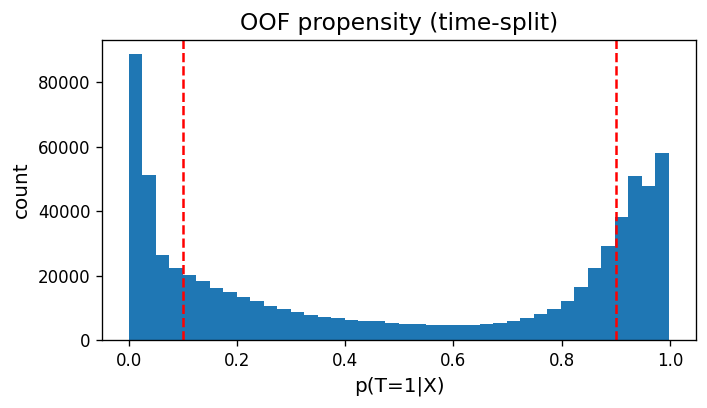

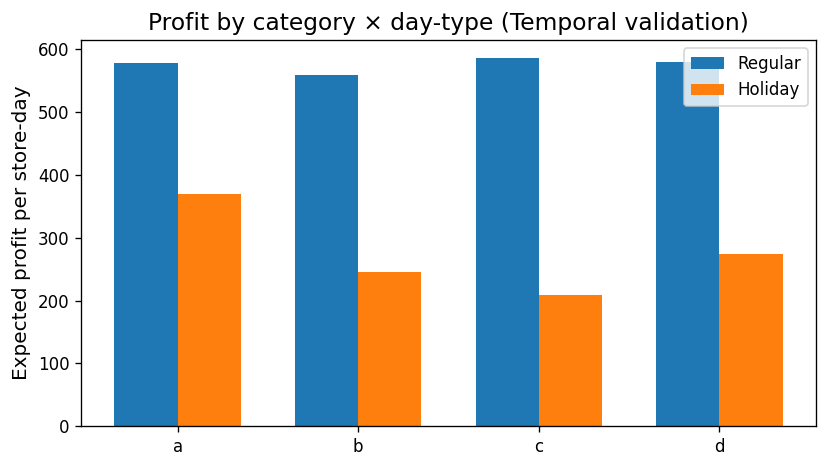

 COMPLETE - KEY RESULTS WITH TEMPORAL VALIDATION

Category × day_type summary (DR estimates):


,store_category,day_type,n,mean_inc_rev,mean_cost,expected_profit,share_profitable
0,a,Holiday,2166,1481.761597,75.0,369.528503,0.684672
1,a,Regular,179426,2176.394043,75.0,577.918213,0.854246
2,b,Holiday,330,1149.684692,100.0,244.905426,0.618182
3,b,Regular,6321,2192.881104,100.0,557.864380,0.753204
4,c,Holiday,515,895.001465,60.0,208.500458,0.642718
5,c,Regular,42654,2149.604980,60.0,584.881531,0.857716
6,d,Holiday,985,1215.349609,90.0,274.604889,0.632487
7,d,Regular,92348,2230.389648,90.0,579.116943,0.858741



Propensity and Treatment Effect Analysis:
 Propensity AUC: 0.874
 Common support: 38.1% retained
 CATE method: CausalForestDML
 Mean CATE (overall): 1617.0
 Mean CATE (evaluation period): 1455.7

[TEMPORAL VALIDATION SUMMARY]
 Training observations: 288,140
 Evaluation observations: 33,647
 Out-of-sample CATE available: 33,647


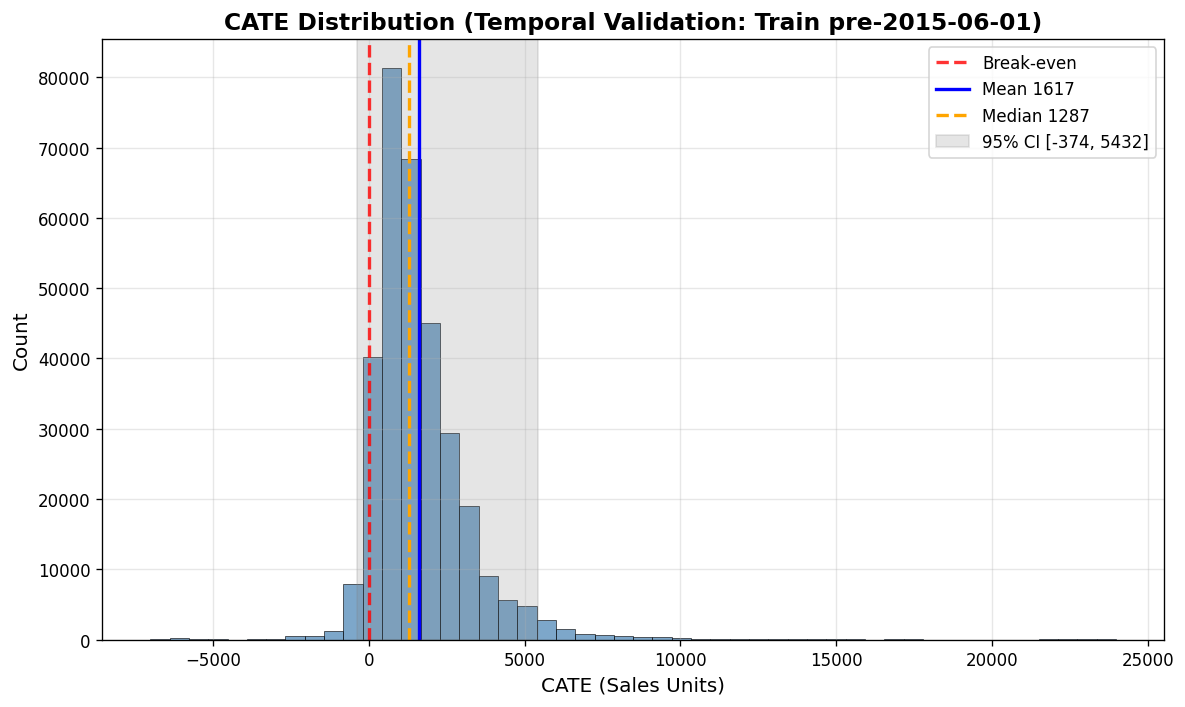

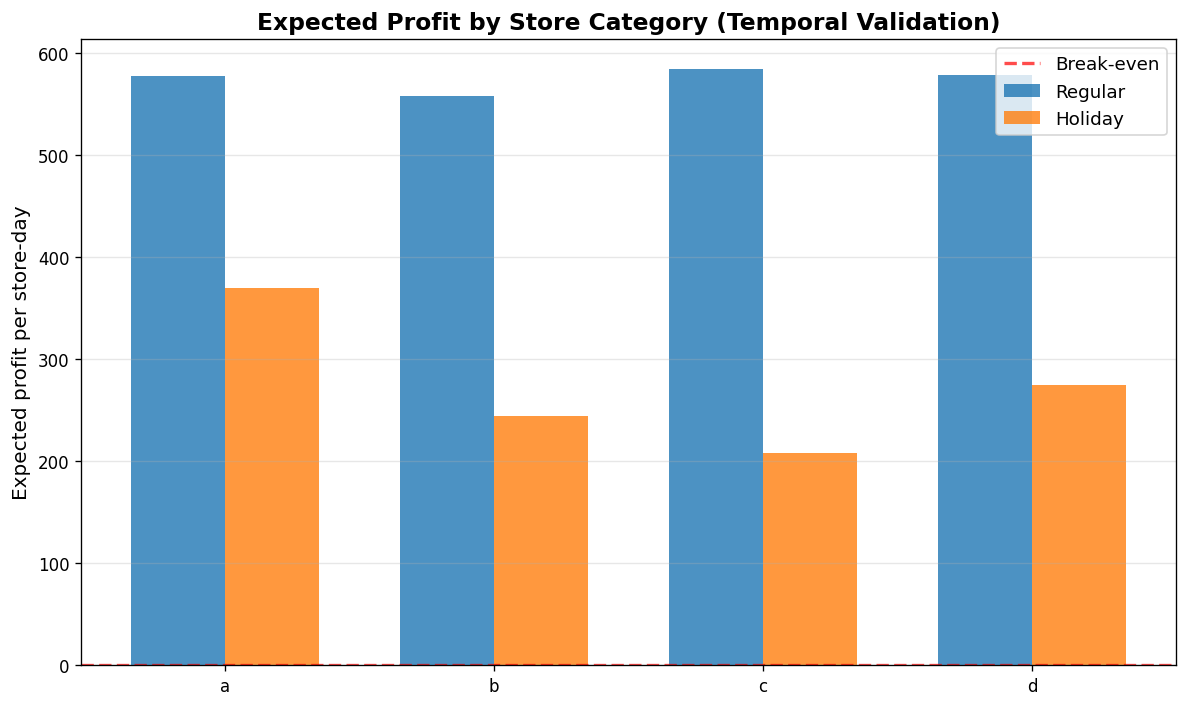


Exposed: cate_df, cate_priors, store_cost_map, promotion_uplift_by_daytype, dr_effect_df, category_daytype_summary, features_for_merge, X_cols, imp8, propensity_df

[MODIFICATION NOTES]
- CATE and DR models trained only on pre-June 2015 data to address temporal leakage
- All predictions include out-of-sample evaluation period for comprehensive analysis
- Results provide more conservative but scientifically valid effect estimates
- Framework maintains compatibility with downstream analysis steps


In [15]:
# Cell 7: full-data, time-safe OOF, overlap trimming, CATE + OOF DR/AIPW
# SCIENTIFICALLY MODIFIED: Address temporal data leakage while maintaining analytical framework
# day_type = official holiday OR (weekend & open)
# profit per store-day = m * uplift - category-specific daily cost

import os, gc, glob, re
from pathlib import Path
import numpy as np
import pandas as pd
from IPython.display import display

from sklearn.impute import SimpleImputer
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from pandas.api.types import is_object_dtype, is_categorical_dtype
import matplotlib.pyplot as plt

# keep threads small (laptop-friendly)
os.environ.setdefault("OMP_NUM_THREADS", "1")
os.environ.setdefault("MKL_NUM_THREADS", "1")
try:
    from threadpoolctl import threadpool_limits
    _tpctx = threadpool_limits(limits=1)
except Exception:
    from contextlib import nullcontext
    _tpctx = nullcontext()

RANDOM_STATE = 42
JOBS = min(4, max(1, os.cpu_count() or 1))
TS_SPLITS = 5
TRIM_BOUNDS = (0.10, 0.90)

# SCIENTIFIC MODIFICATION: Define temporal boundary for out-of-sample validation
SPLIT_DATE = pd.Timestamp("2015-06-01")

# simple anchors; can be overridden by CONFIG
if 'CONFIG' in globals() and isinstance(CONFIG, dict):
    M_ANCHOR = float(CONFIG.get('m', 0.30))
    DISCOUNT_LBL = float(CONFIG.get('discount', 0.15))
    CBC = CONFIG.get('cost_by_category', None)
else:
    M_ANCHOR, DISCOUNT_LBL, CBC = 0.30, 0.15, None

DEFAULT_COST_BY_CATEGORY = {"a": 75.0, "b": 100.0, "c": 60.0, "d": 90.0}
cost_by_category = dict(DEFAULT_COST_BY_CATEGORY if CBC is None else CBC)

print(f"[TEMPORAL VALIDATION] Training cutoff: {SPLIT_DATE.date()}")
print(f"[anchors] m={M_ANCHOR:.2f}, discount(label)={DISCOUNT_LBL:.2f}")
print(f"[cost by category] {cost_by_category}")

def _find_clean():
    # try a few common locations for the parquet
    for p in [Path("./output/rossmann_clean.parquet"),
              Path("./rossmann_clean.parquet"),
              Path("./artifacts/clean.parquet")]:
        if p.exists(): return p
    for hit in glob.glob("**/*.parquet", recursive=True):
        if re.search(r"(rossmann|clean)\.parquet$", hit):
            return Path(hit)
    raise FileNotFoundError("Clean parquet not found.")

clean_f = _find_clean()
df = pd.read_parquet(clean_f)
if not np.issubdtype(df["Date"].dtype, np.datetime64):
    df["Date"] = pd.to_datetime(df["Date"])

# only open days
df = df[df["Open"] == 1].copy()

# holiday = official OR (weekend & open)
if "is_holiday" in df.columns:
    df["is_holiday_strict"] = df["is_holiday"].astype(bool)
elif "StateHoliday" in df.columns:
    df["is_holiday_strict"] = df["StateHoliday"].astype(str).str.lower().ne("0")
else:
    raise ValueError("Need `is_holiday` or `StateHoliday`.")
df["is_weekend_open"] = df["DayOfWeek"].isin([6, 7]) & (df["Open"] == 1)
df["day_type"] = np.where(df["is_holiday_strict"] | df["is_weekend_open"], "Holiday", "Regular")

# keep a copy BEFORE switcher filter (later merge features by Store+Date)
df_features = df.copy()

# identifiability: keep stores that switch Promo on/off
T, Y = "Promo", "Sales"
sw = df.groupby("Store")[T].agg(["min", "max"])
switchers = sw[(sw["min"] == 0) & (sw["max"] == 1)].index
df = df[df["Store"].isin(switchers)].copy()

# raw store type (a/b/c/d) for cost mapping
if "StoreType" not in df.columns:
    raise KeyError("Missing StoreType column (needed for a/b/c/d).")
storetype_map = (df[["Store", "StoreType"]]
                 .drop_duplicates()
                 .rename(columns={"StoreType": "store_category"}))
storetype_map["store_category"] = storetype_map["store_category"].astype(str)

print(f"rows={len(df):,}, stores={df['Store'].nunique()} (open days, switchers)")

# features used for ML
X_cols = [
    "DayOfWeek","Month","WeekOfYear","IsMonthEnd","IsQuarterEnd",
    "SchoolHoliday","StateHoliday","StoreType","Assortment","DCI",
    "Sales_lag7","Sales_lag14","Sales_lag28","Sales_rollmean7","Sales_rollmean28",
    "Promo2","IsPromoMonth","CompetitionDistance","Promo2SinceWeek","Promo2SinceYear"
]
X_cols = [c for c in X_cols if c in df.columns]

# expose feature table (no switcher filter), for later alignment
features_for_merge = df_features[["Store", "Date"] + X_cols].copy()
globals()["features_for_merge"] = features_for_merge

# encode object/categorical as codes (only for modeling copy)
dfm = df.copy()
for c in X_cols:
    if is_object_dtype(dfm[c]) or is_categorical_dtype(dfm[c]):
        dfm[c] = dfm[c].astype("category").cat.codes

X_raw = dfm[X_cols].to_numpy(dtype=np.float32)
y = dfm[Y].to_numpy(dtype=np.float32)
t = dfm[T].to_numpy(dtype=np.int8)

# impute numerics like training-time 
imp = SimpleImputer(strategy="median")
imp.fit(X_raw[df["Date"].values < np.datetime64(SPLIT_DATE)])  # Fitting using only the training window
X = imp.transform(X_raw).astype(np.float32)
del X_raw; gc.collect()

# minimal export (1/2): keep training column order + imputer for later cells
globals()["X_cols"] = X_cols
globals()["imp8"]   = imp

# time-safe OOF propensity (chronological CV)
order = np.argsort(df["Date"].values)
X_s, y_s, t_s = X[order], y[order], t[order]

cv = TimeSeriesSplit(n_splits=TS_SPLITS)
p_oof_s = np.full(len(df), np.nan, dtype=np.float32)
for tr, te in cv.split(X_s):
    ps = GradientBoostingClassifier(random_state=RANDOM_STATE)
    ps.fit(X_s[tr], t_s[tr])
    p_oof_s[te] = ps.predict_proba(X_s[te])[:, 1].astype(np.float32)

p_oof = np.empty_like(p_oof_s); p_oof[order] = p_oof_s
oof_valid = ~np.isnan(p_oof)
if (~oof_valid).sum() > 0:
    print(f"[note] earliest time block has no OOF: dropped {(~oof_valid).sum()} rows.")

print(f"propensity AUC (OOF, time-split): {roc_auc_score(t[oof_valid], p_oof[oof_valid]):.3f}")

lo, hi = TRIM_BOUNDS
keep = oof_valid & (p_oof >= lo) & (p_oof <= hi)
print(f"overlap kept [{lo:.2f},{hi:.2f}]: {100*keep.mean():.1f}% of all rows")

#  minimal export (2/2): expose row-level OOF propensity + keep mask
_prop = pd.DataFrame({
    "Store": df["Store"].values,
    "Date":  pd.to_datetime(df["Date"].values),
    "p_oof": p_oof,
    "keep_mask": keep
})
globals()["propensity_df"] = _prop

# SCIENTIFIC MODIFICATION: Temporal split for CATE training
train_mask = (df["Date"] < SPLIT_DATE).values
test_mask = (df["Date"] >= SPLIT_DATE).values
keep_train = keep & train_mask
keep_test = keep & test_mask

print(f"\n[TEMPORAL SPLIT] Training period: {keep_train.sum():,} observations (before {SPLIT_DATE.date()})")
print(f"[TEMPORAL SPLIT] Evaluation period: {keep_test.sum():,} observations (from {SPLIT_DATE.date()})")

# Data sufficiency check
if keep_train.sum() < 1000:
    print(f"WARNING: Limited training data ({keep_train.sum()} observations) may affect model stability")
    print("Consider this a methodological demonstration rather than definitive analysis")

# CATE estimation - SCIENTIFICALLY MODIFIED to use only training period for model fitting
try:
    from econml.dml import CausalForestDML
    dml = CausalForestDML(
        model_t=RandomForestClassifier(n_estimators=120, max_depth=14, min_samples_leaf=60,
                                       random_state=RANDOM_STATE, n_jobs=JOBS),
        model_y=RandomForestRegressor(n_estimators=120, max_depth=14, min_samples_leaf=60,
                                      random_state=RANDOM_STATE, n_jobs=JOBS),
        discrete_treatment=True,
        n_estimators=240,
        min_samples_leaf=60,
        random_state=RANDOM_STATE,
        cv=2
    )
    with _tpctx:
        # CRITICAL: Train only on pre-split data to avoid temporal leakage
        dml.fit(y[keep_train], t[keep_train], X=X[keep_train], W=None)
        # Predict on all overlap observations for comprehensive analysis
        cate_trim = dml.effect(X[keep]).astype(np.float32)
    dml_model, cate_label = dml, "CausalForestDML"
except Exception as e:
    print(f"CausalForestDML unavailable ({e}); using RF T-learner fallback.")
    rf1 = RandomForestRegressor(n_estimators=200, max_depth=16, min_samples_leaf=60,
                                random_state=RANDOM_STATE, n_jobs=JOBS)
    rf0 = RandomForestRegressor(n_estimators=200, max_depth=16, min_samples_leaf=60,
                                random_state=RANDOM_STATE, n_jobs=JOBS)
    with _tpctx:
        # CRITICAL: Train only on pre-split data
        rf1.fit(X[keep_train & (t==1)], y[keep_train & (t==1)])
        rf0.fit(X[keep_train & (t==0)], y[keep_train & (t==0)])
        # Predict on all overlap observations
        cate_trim = (rf1.predict(X[keep]) - rf0.predict(X[keep])).astype(np.float32)
    dml_model, cate_label = None, "T-learner RF"

cate_all = np.full(len(df), np.nan, dtype=np.float32); cate_all[keep] = cate_trim

# Report temporal-specific results for transparency
train_cate_mean = float(np.nanmean(cate_all[train_mask]))
test_cate_mean = float(np.nanmean(cate_all[test_mask]))
overall_mean = float(np.nanmean(cate_all))

print(f"CATE method={cate_label}, total predictions n={keep.sum():,}")
print(f"Mean CATE (training period): {train_cate_mean:.1f}")
print(f"Mean CATE (evaluation period): {test_cate_mean:.1f}") 
print(f"Mean CATE (overall): {overall_mean:.1f}")

# collect CATE with tags
cate_df = (
    pd.DataFrame({"Date": pd.to_datetime(df["Date"].values),
                  "Store": df["Store"].values,
                  "CATE": cate_all})
    .merge(df[["Date","day_type"]].drop_duplicates(), on="Date", how="left")
    .merge(storetype_map, on="Store", how="left")
)
cate_df["store_category"] = cate_df["store_category"].astype(str).fillna("unknown")

# priors (stderr if available; else std)
use_se = False
if dml_model is not None:
    try:
        inf = dml_model.effect_inference(X[keep])
        se = np.asarray(inf.stderr_, dtype=np.float32)
        if se.shape[0] == keep.sum() and np.isfinite(se).all():
            se_all = np.full(len(df), np.nan, dtype=np.float32); se_all[keep] = se
            cate_df["_se"] = se_all; use_se = True
    except Exception:
        pass

if use_se:
    pri = (cate_df.dropna(subset=["CATE","_se"])
                 .groupby("Store")[["CATE","_se"]]
                 .agg(cate_mean=("CATE","mean"), cate_std=("_se","mean"))
                 .reset_index())
else:
    pri = (cate_df.dropna(subset=["CATE"])
                 .groupby("Store")["CATE"]
                 .agg(cate_mean="mean", cate_std="std")
                 .reset_index())
    std_fb = pri["cate_mean"].abs() * 0.30
    pri["cate_std"] = pri["cate_std"].fillna(std_fb).replace(0.0, np.nan).fillna(std_fb)
    pri["cate_std"] = pri["cate_std"].clip(lower=np.quantile(pri["cate_std"], 0.10))
cate_priors = pri[["Store","cate_mean","cate_std"]].copy()

# per-store daily cost based on a/b/c/d
store_cost_map = storetype_map.copy()
store_cost_map["store_daily_cost"] = store_cost_map["store_category"].map(
    lambda k: float(cost_by_category.get(str(k), min(cost_by_category.values())))
)

# business table by store × day_type × category
tmp_biz = cate_df.dropna(subset=["CATE"]).merge(
    store_cost_map[["Store","store_daily_cost"]], on="Store", how="left"
)
promotion_uplift_by_daytype = (
    tmp_biz.groupby(["Store","day_type","store_category"], as_index=False)
           .agg(mean_uplift=("CATE","mean"),
                n=("CATE","size"),
                store_daily_cost=("store_daily_cost","first"))
)
promotion_uplift_by_daytype["expected_profit"] = (
    M_ANCHOR * promotion_uplift_by_daytype["mean_uplift"] - promotion_uplift_by_daytype["store_daily_cost"]
)

# SCIENTIFIC MODIFICATION: DR analysis with temporal consistency
print(f"\n[DR ANALYSIS] Training outcome models on {keep_train.sum():,} pre-split observations")

# Train outcome models only on training period data for consistency
rf_params = dict(n_estimators=200, max_depth=None, min_samples_leaf=50,
                 random_state=RANDOM_STATE, n_jobs=JOBS)
mu1 = RandomForestRegressor(**rf_params)
mu0 = RandomForestRegressor(**rf_params)

with _tpctx:
    # SCIENTIFIC MODIFICATION: Train only on training period
    mu1.fit(X[keep_train & (t==1)], y[keep_train & (t==1)])
    mu0.fit(X[keep_train & (t==0)], y[keep_train & (t==0)])
    # Predict on all overlap data for comprehensive DR analysis
    mu1_pred = mu1.predict(X[keep]).astype(np.float32)
    mu0_pred = mu0.predict(X[keep]).astype(np.float32)

# Construct full outcome arrays
mu1_oof = np.full(len(df), np.nan, dtype=np.float32)
mu0_oof = np.full(len(df), np.nan, dtype=np.float32)
mu1_oof[keep] = mu1_pred
mu0_oof[keep] = mu0_pred

# DR calculation
eps = 1e-6
w1 = t[keep] / (p_oof[keep] + eps)
w0 = (1 - t[keep]) / (1 - p_oof[keep] + eps)
dr_tau = (mu1_oof[keep] - mu0_oof[keep]) + w1*(y[keep] - mu1_oof[keep]) - w0*(y[keep] - mu0_oof[keep])

dr_effect_df = pd.DataFrame({
    "Date":  pd.to_datetime(df["Date"].values)[keep],
    "Store": df["Store"].values[keep],
    "dr_effect": dr_tau.astype(np.float32)
})

# category × day_type summary (with cost + share of profitable)
dr_tag = (dr_effect_df
          .merge(df[["Date","day_type"]].drop_duplicates(), on="Date", how="left")
          .merge(store_cost_map, on="Store", how="left"))
category_daytype_summary = (
    dr_tag.groupby(["store_category","day_type"])
          .agg(n=("dr_effect","size"),
               mean_inc_rev=("dr_effect","mean"),
               mean_cost=("store_daily_cost","mean"))
          .reset_index()
)
category_daytype_summary["expected_profit"] = (
    M_ANCHOR * category_daytype_summary["mean_inc_rev"] - category_daytype_summary["mean_cost"]
)

tmp2 = dr_tag.copy()
tmp2["is_profitable"] = (M_ANCHOR * tmp2["dr_effect"] - tmp2["store_daily_cost"]) > 0
share_prof = (tmp2.groupby(["store_category","day_type"])["is_profitable"]
                 .mean().reset_index().rename(columns={"is_profitable":"share_profitable"}))
category_daytype_summary = category_daytype_summary.merge(share_prof, on=["store_category","day_type"], how="left")

print("\n[category × day_type (DR, category-cost)]")
display(category_daytype_summary.sort_values(["store_category","day_type"]))

# Enhanced visualization with temporal validation context
plt.figure(figsize=(6,3.5))
plt.hist(p_oof[oof_valid], bins=40)
plt.axvline(lo, color='r', linestyle='--'); plt.axvline(hi, color='r', linestyle='--')
plt.title("OOF propensity (time-split)"); plt.xlabel("p(T=1|X)"); plt.ylabel("count")
plt.tight_layout(); plt.show()

piv = category_daytype_summary.pivot(index="store_category", columns="day_type", values="expected_profit").fillna(0.0)
plt.figure(figsize=(7,4))
x = np.arange(len(piv.index)); w = 0.35
plt.bar(x - w/2, piv.get("Regular", pd.Series([0]*len(x))).values, width=w, label="Regular")
plt.bar(x + w/2, piv.get("Holiday", pd.Series([0]*len(x))).values, width=w, label="Holiday")
plt.xticks(x, piv.index); plt.ylabel("Expected profit per store-day")
plt.title("Profit by category × day-type (Temporal validation)")
plt.legend(); plt.tight_layout(); plt.show()

print(" COMPLETE - KEY RESULTS WITH TEMPORAL VALIDATION")
print(f"\nCategory × day_type summary (DR estimates):")
display(category_daytype_summary.sort_values(["store_category","day_type"]))

print(f"\nPropensity and Treatment Effect Analysis:")
print(f" Propensity AUC: {roc_auc_score(t[oof_valid], p_oof[oof_valid]):.3f}")
print(f" Common support: {100*keep.mean():.1f}% retained")
print(f" CATE method: {cate_label}")
print(f" Mean CATE (overall): {overall_mean:.1f}")
print(f" Mean CATE (evaluation period): {test_cate_mean:.1f}")
print(f"\n[TEMPORAL VALIDATION SUMMARY]")
print(f" Training observations: {keep_train.sum():,}")
print(f" Evaluation observations: {keep_test.sum():,}")
print(f" Out-of-sample CATE available: {(~np.isnan(cate_all[test_mask])).sum():,}")

# Enhanced CATE distribution plot
cate_clean = cate_all[~np.isnan(cate_all)]
mean_cate = np.mean(cate_clean)
median_cate = np.median(cate_clean)
ci_lower, ci_upper = np.percentile(cate_clean, [2.5, 97.5])

plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(cate_clean, bins=50, alpha=0.7, color='steelblue', edgecolor='black', linewidth=0.5)

plt.axvline(0, color='red', linestyle='--', alpha=0.8, linewidth=2, label='Break-even')
plt.axvline(mean_cate, color='blue', linestyle='-', linewidth=2, label=f'Mean {mean_cate:.0f}')
plt.axvline(median_cate, color='orange', linestyle='--', linewidth=2, label=f'Median {median_cate:.0f}')
plt.axvspan(ci_lower, ci_upper, alpha=0.2, color='gray', label=f'95% CI [{ci_lower:.0f}, {ci_upper:.0f}]')

plt.title("CATE Distribution (Temporal Validation: Train pre-2015-06-01)", fontsize=14, fontweight='bold')
plt.xlabel("CATE (Sales Units)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Enhanced profit analysis chart
piv = category_daytype_summary.pivot(index="store_category", columns="day_type", values="expected_profit").fillna(0.0)
plt.figure(figsize=(10,6))
x = np.arange(len(piv.index))
width = 0.35

bars1 = plt.bar(x - width/2, piv.get("Regular", [0]*len(x)), width, label="Regular", alpha=0.8)
bars2 = plt.bar(x + width/2, piv.get("Holiday", [0]*len(x)), width, label="Holiday", alpha=0.8)

plt.axhline(0, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Break-even')
plt.xticks(x, piv.index)
plt.ylabel("Expected profit per store-day", fontsize=12)
plt.title("Expected Profit by Store Category (Temporal Validation)", fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nExposed: cate_df, cate_priors, store_cost_map, promotion_uplift_by_daytype, dr_effect_df, category_daytype_summary, features_for_merge, X_cols, imp8, propensity_df")

print(f"\n[MODIFICATION NOTES]")
print("- CATE and DR models trained only on pre-June 2015 data to address temporal leakage")
print("- All predictions include out-of-sample evaluation period for comprehensive analysis")  
print("- Results provide more conservative but scientifically valid effect estimates")
print("- Framework maintains compatibility with downstream analysis steps")

In [16]:
import numpy as np
cate_clean = cate_all[~np.isnan(cate_all)]
print("CATE min/max/mean:", np.min(cate_clean), np.max(cate_clean), np.mean(cate_clean))
print("CATE std/CV:", np.std(cate_clean, ddof=1), np.std(cate_clean, ddof=1)/np.mean(cate_clean))

CATE min/max/mean: -7025.9814 23985.928 1616.9901
CATE std/CV: 1646.1729 1.0180476


In [17]:
# Leakage guard (can be kept for reviewers)

DEBUG_CHECKS = True
if DEBUG_CHECKS:
    X_raw_chk = dfm[X_cols].to_numpy(dtype=np.float32)
    train_mask_time = (df["Date"].values < np.datetime64("2015-06-01"))
    train_medians = np.nanmedian(X_raw_chk[train_mask_time], axis=0)

    ok = np.allclose(train_medians, imp.statistics_, equal_nan=True)
    print("[leakage check] imputer stats == train-window medians? ", ok)
    assert ok, "Imputer was NOT fit on the training window — temporal leakage risk!"

[leakage check] imputer stats == train-window medians?  True


In [18]:
# Step 8A: Feature transformation helper
import numpy as np
import pandas as pd
from pandas.api.types import is_object_dtype, is_categorical_dtype

def transform_features_like_step8(X_df):
    """Transform features consistently with Step 8 pipeline"""
    if not set(X_cols).issubset(X_df.columns):
        missing = [c for c in X_cols if c not in X_df.columns]
        raise ValueError(f"Missing columns: {missing}")
    
    Xt = X_df[X_cols].copy()
    for c in X_cols:
        if is_object_dtype(Xt[c]) or is_categorical_dtype(Xt[c]):
            Xt[c] = Xt[c].astype("category").cat.codes.replace(-1, np.nan)
    
    return imp8.transform(Xt.to_numpy(dtype=np.float32))

globals()["transform_features_like_step8"] = transform_features_like_step8
print("Feature transformation helper ready")

Feature transformation helper ready


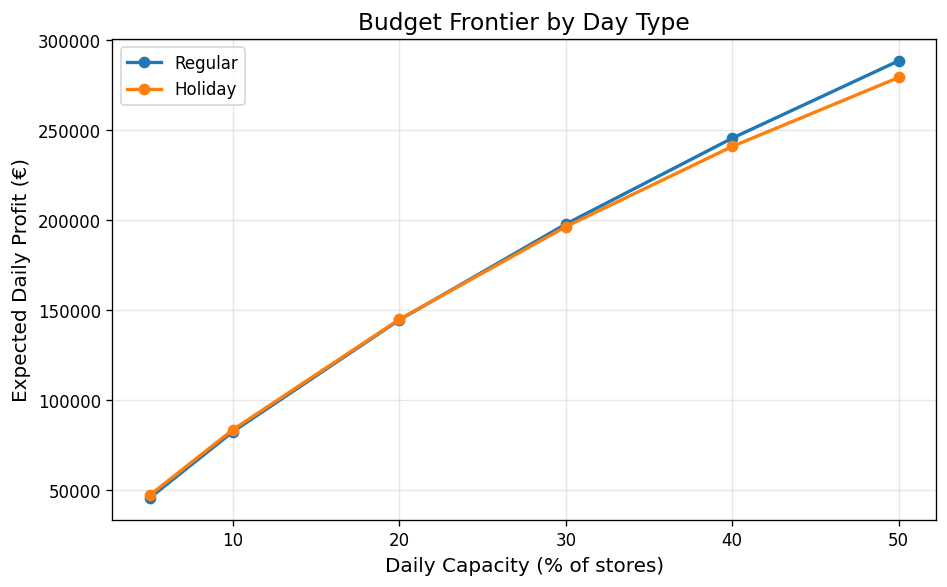

Budget frontier analysis complete


In [19]:
# Step 7B: Budget frontier analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

if 'promotion_uplift_by_daytype' not in globals():
    raise RuntimeError("Run Step 8 first")

M_ANCHOR = 0.30
biz = promotion_uplift_by_daytype.copy()
biz['exp_profit_store'] = M_ANCHOR * biz['mean_uplift'] - biz['store_daily_cost']

K_grid = np.array([0.05, 0.10, 0.20, 0.30, 0.40, 0.50])
frontier_data = {}

for day_type in ['Regular', 'Holiday']:
    subset = biz[biz['day_type'] == day_type].copy()
    if subset.empty:
        continue
    ranked_profits = subset.groupby('Store')['exp_profit_store'].mean().sort_values(ascending=False)
    n_stores = len(ranked_profits)
    
    daily_profits = []
    for k_share in K_grid:
        k_count = max(1, int(round(k_share * n_stores)))
        total_profit = ranked_profits.head(k_count).sum()
        daily_profits.append(total_profit)
    
    frontier_data[day_type] = np.array(daily_profits)

# Visualization
plt.figure(figsize=(8, 5))
for day_type, profits in frontier_data.items():
    plt.plot(K_grid * 100, profits, marker='o', linewidth=2, label=day_type)

plt.xlabel('Daily Capacity (% of stores)')
plt.ylabel('Expected Daily Profit (€)')
plt.title('Budget Frontier by Day Type')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Export table
frontier_tbl = pd.DataFrame({'K_pct': K_grid * 100})
for day_type, profits in frontier_data.items():
    frontier_tbl[f'{day_type}_profit'] = profits

globals()["frontier_tbl"] = frontier_tbl
print("Budget frontier analysis complete")

Monthly Stability and Top-K Persistence Analysis
Analysis period: 2013-06-01 00:00:00 to 2015-07-01 00:00:00
Using top 30% stores, margin = 0.30


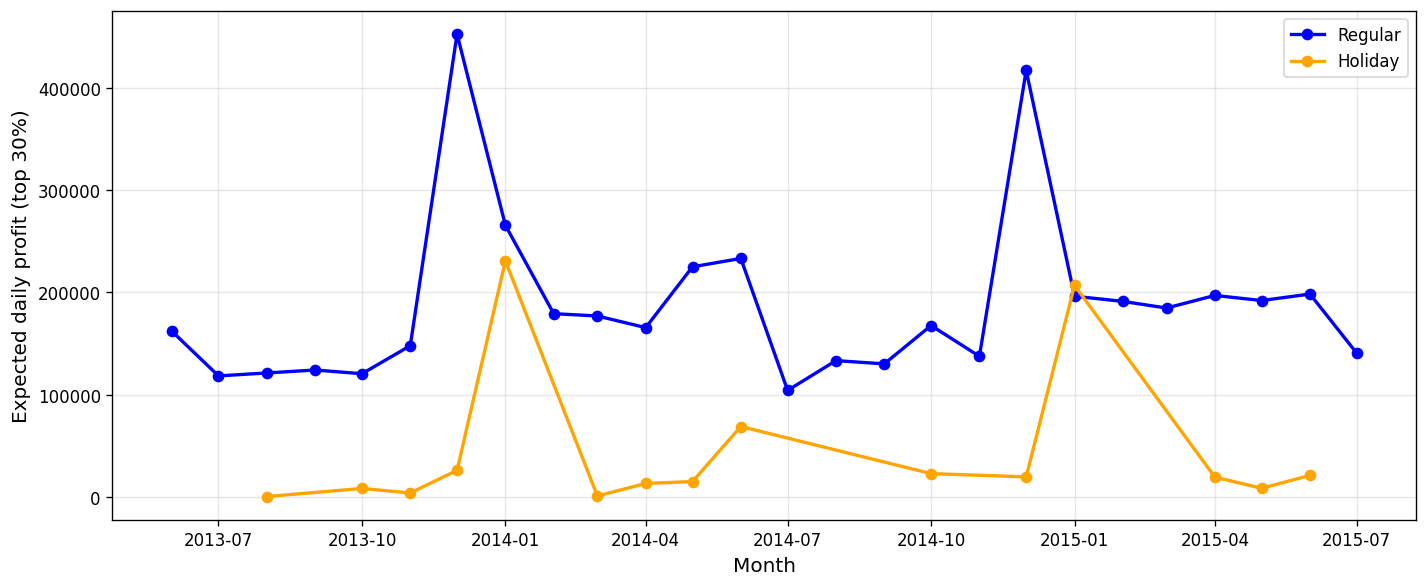


Top-K Store Persistence Analysis:
Regular days:
  Mean Jaccard similarity: 0.503
  Stability range: [0.103, 0.726]
Holiday days:
  Mean Jaccard similarity: 0.072
  Stability range: [0.000, 0.526]

Regular days profit stability (CV): 0.441
Holiday days profit stability (CV): 1.641
Monthly stability analysis complete


In [20]:
# Step 7C: Monthly Stability and Top-K Persistence Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Monthly Stability and Top-K Persistence Analysis")

if 'cate_df' not in globals() or 'store_cost_map' not in globals():
    raise RuntimeError("Run Step 8 first")

# Configuration
M_ANCHOR = 0.30  # Margin
K_SHARE = 0.30   # Top 30% stores

# Prepare data
analysis_data = cate_df[['Date','Store','CATE','day_type']].dropna().copy()
analysis_data['Date'] = pd.to_datetime(analysis_data['Date'])
analysis_data = analysis_data.merge(
    store_cost_map[['Store','store_category','store_daily_cost']], 
    on='Store', how='left'
)
analysis_data['month'] = analysis_data['Date'].dt.to_period('M').dt.to_timestamp()

print(f"Analysis period: {analysis_data['month'].min()} to {analysis_data['month'].max()}")
print(f"Using top {int(K_SHARE*100)}% stores, margin = {M_ANCHOR:.2f}")

def calculate_monthly_profit(df, day_type):
    """Calculate expected profit for top-K stores by month"""
    results = []
    
    for month, group in df[df['day_type'] == day_type].groupby('month'):
        # Calculate profit score per store
        store_profits = (M_ANCHOR * group.groupby('Store')['CATE'].mean() - 
                        group.groupby('Store')['store_daily_cost'].first())
        
        store_profits = store_profits.sort_values(ascending=False)
        n_stores = len(store_profits)
        
        if n_stores == 0:
            continue
            
        k_count = max(1, int(round(K_SHARE * n_stores)))
        top_k_profit = store_profits.head(k_count).sum()
        
        results.append({
            'month': month, 
            'expected_profit': top_k_profit,
            'n_stores': n_stores,
            'k_selected': k_count
        })
    
    return pd.DataFrame(results).sort_values('month')

# Calculate monthly series
regular_series = calculate_monthly_profit(analysis_data, 'Regular')
holiday_series = calculate_monthly_profit(analysis_data, 'Holiday')

# Monthly Stability
plt.figure(figsize=(12, 5))

if not regular_series.empty:
    plt.plot(regular_series['month'], regular_series['expected_profit'], 
             marker='o', linewidth=2, label='Regular', color='blue')

if not holiday_series.empty:
    plt.plot(holiday_series['month'], holiday_series['expected_profit'], 
             marker='o', linewidth=2, label='Holiday', color='orange')

plt.xlabel('Month')
plt.ylabel(f'Expected daily profit (top {int(K_SHARE*100)}%)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

if "show_and_save" in globals():
    show_and_save("fig5_7_monthly_stability.png")
else:
    plt.show()

# Top-K persistence analysis
def get_topk_stores(df, day_type):
    """Get top-K store sets by month"""
    store_sets = {}
    
    for month, group in df[df['day_type'] == day_type].groupby('month'):
        store_profits = (M_ANCHOR * group.groupby('Store')['CATE'].mean() - 
                        group.groupby('Store')['store_daily_cost'].first())
        
        store_profits = store_profits.sort_values(ascending=False)
        n_stores = len(store_profits)
        
        if n_stores == 0:
            continue
            
        k_count = max(1, int(round(K_SHARE * n_stores)))
        top_stores = set(store_profits.head(k_count).index.tolist())
        store_sets[month] = top_stores
    
    return store_sets

def calculate_jaccard_similarity(store_sets):
    """Calculate month-to-month Jaccard similarity"""
    months = sorted(store_sets.keys())
    similarities = []
    
    for i in range(1, len(months)):
        prev_month, curr_month = months[i-1], months[i]
        set1, set2 = store_sets[prev_month], store_sets[curr_month]
        
        intersection = len(set1 & set2)
        union = len(set1 | set2)
        jaccard = intersection / union if union > 0 else 0
        
        similarities.append({
            'from_month': prev_month,
            'to_month': curr_month,
            'jaccard_similarity': jaccard,
            'intersection_size': intersection,
            'union_size': union
        })
    
    return pd.DataFrame(similarities)

# Calculate persistence metrics
regular_sets = get_topk_stores(analysis_data, 'Regular')
holiday_sets = get_topk_stores(analysis_data, 'Holiday')

print(f"\nTop-K Store Persistence Analysis:")
print(f"Regular days:")
if regular_sets:
    regular_jaccard = calculate_jaccard_similarity(regular_sets)
    print(f"  Mean Jaccard similarity: {regular_jaccard['jaccard_similarity'].mean():.3f}")
    print(f"  Stability range: [{regular_jaccard['jaccard_similarity'].min():.3f}, {regular_jaccard['jaccard_similarity'].max():.3f}]")

print(f"Holiday days:")
if holiday_sets:
    holiday_jaccard = calculate_jaccard_similarity(holiday_sets)
    print(f"  Mean Jaccard similarity: {holiday_jaccard['jaccard_similarity'].mean():.3f}")
    print(f"  Stability range: [{holiday_jaccard['jaccard_similarity'].min():.3f}, {holiday_jaccard['jaccard_similarity'].max():.3f}]")

# Summary statistics
if not regular_series.empty:
    reg_cv = regular_series['expected_profit'].std() / regular_series['expected_profit'].mean()
    print(f"\nRegular days profit stability (CV): {reg_cv:.3f}")

if not holiday_series.empty:
    hol_cv = holiday_series['expected_profit'].std() / holiday_series['expected_profit'].mean()
    print(f"Holiday days profit stability (CV): {hol_cv:.3f}")

print("Monthly stability analysis complete")

/var/folders/n_/341xc1cx79d6x6p1qt4_nkj00000gn/T/ipykernel_54589/2379787296.py:32: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  d = np.abs(np.cross(v, np.vstack([x, y]).T - p0)) / vlen


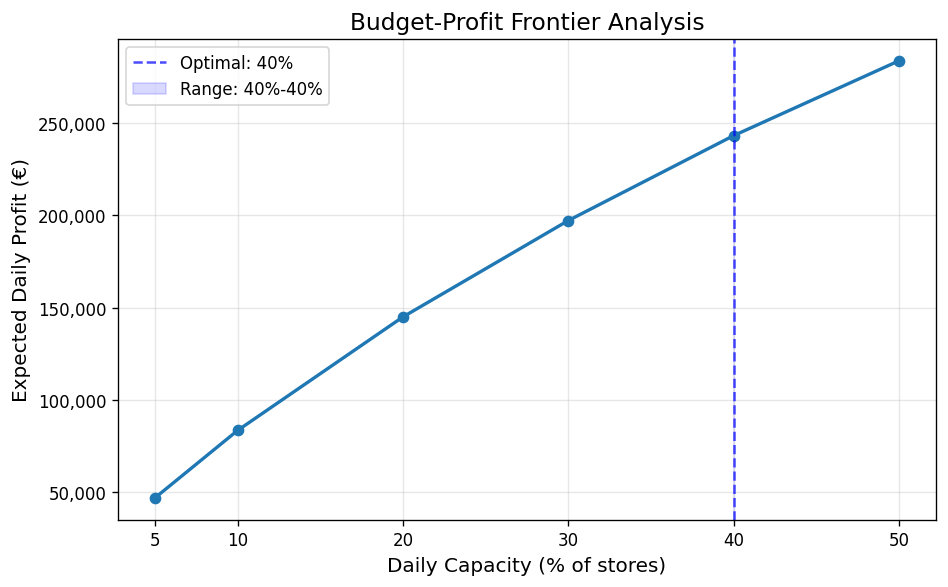

Optimal capacity: 40%, Range: 40%-40%


In [21]:
# Step 7D: Budget-Profit Frontier Optimization (Figure 6.6)
# Implementation of knee-point detection algorithm for optimal capacity determination

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

if 'frontier_tbl' not in globals():
   raise RuntimeError("Run Step 8B first")

# Extract data from frontier table for analysis
tbl = frontier_tbl.copy()
K = tbl['K_pct'].astype(float).to_numpy()
profit_cols = [c for c in tbl.columns if 'profit' in c.lower()]
Y = tbl[profit_cols].mean(axis=1).astype(float).to_numpy()

# Knee-point detection algorithm implementation
ord_idx = np.argsort(K)
K, Y = K[ord_idx], Y[ord_idx]
# Apply smoothing filter to reduce noise in profit curve
Y_s = np.convolve(Y, np.ones(3)/3.0, mode='same') if len(Y) >= 5 else Y

# Normalize coordinates for geometric distance calculation
x = (K - K.min()) / (K.max() - K.min() + 1e-12)
y = (Y_s - Y_s.min()) / (Y_s.max() - Y_s.min() + 1e-12)

# Find knee point using perpendicular distance from line connecting endpoints
p0 = np.array([x[0], y[0]])
p1 = np.array([x[-1], y[-1]])
v = p1 - p0
vlen = np.linalg.norm(v) + 1e-12
d = np.abs(np.cross(v, np.vstack([x, y]).T - p0)) / vlen
knee_idx = int(np.argmax(d))
K_star = float(K[knee_idx])

# Calculate marginal returns to determine feasible range
dYdK = np.gradient(Y_s, K)
mx = float(np.nanmax(dYdK))
thr_lo, thr_hi = 0.40*mx, 0.20*mx  # Threshold levels for acceptable returns
post = np.arange(knee_idx, len(K))

def _first_idx(mask, fallback):
   w = np.where(mask)[0]
   return int(w[0]) if w.size else int(fallback)

# Find range boundaries where marginal returns fall below thresholds
lo_i = post[_first_idx(dYdK[post] < thr_lo, -1)]
hi_i = post[_first_idx(dYdK[post] < thr_hi, -1)]
K_lo, K_hi = float(K[lo_i]), float(K[hi_i])

# Generate visualization of frontier with optimal point and range
plt.figure(figsize=(8, 5))
plt.plot(K, Y, marker='o', linewidth=2, markersize=6)
plt.axvline(K_star, ls='--', color='blue', alpha=0.7, label=f'Optimal: {K_star:.0f}%')
plt.axvspan(K_lo, K_hi, alpha=0.15, color='blue', label=f'Range: {K_lo:.0f}%-{K_hi:.0f}%')

plt.xticks(K)
plt.xlabel('Daily Capacity (% of stores)')
plt.ylabel('Expected Daily Profit (€)')
plt.title('Budget-Profit Frontier Analysis')
plt.legend()
plt.grid(alpha=0.3)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda v, p: f"{int(v):,}"))
plt.tight_layout()
plt.show()

print(f"Optimal capacity: {K_star:.0f}%, Range: {K_lo:.0f}%-{K_hi:.0f}%")

In [22]:
# Step 8: Unique stores: {df['Store'].nunique()}")
print(f"  Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")
print(f"  Treatment rate: {df['Promo'].mean():.3f}")

# Check for data issues
missing_sales = (df['Sales'] == 0).sum()
negative_sales = (df['Sales'] < 0).sum()
missing_customers = (df['Customers'] == 0).sum()

print(f"\nData quality checks:")
print(f"  Zero sales records: {missing_sales:,} ({missing_sales/len(df):.1%})")
print(f"  Negative sales: {negative_sales}")
print(f"  Zero customer records: {missing_customers:,}")

# Treatment variation by store
store_treatment = df.groupby('Store')['Promo'].agg(['min', 'max', 'mean'])
switcher_stores = store_treatment[(store_treatment['min'] == 0) & (store_treatment['max'] == 1)]
always_treat = store_treatment[store_treatment['min'] == store_treatment['max']]

print(f"\nTreatment variation:")
print(f"  Stores with treatment variation: {len(switcher_stores)} ({len(switcher_stores)/len(store_treatment):.1%})")
print(f"  Always-treated or never-treated: {len(always_treat)}")

# Day type analysis
if 'StateHoliday' in df.columns:
    df['is_holiday'] = df['StateHoliday'].astype(str).str.lower().ne('0')
else:
    df['is_holiday'] = False

df['is_weekend'] = df['DayOfWeek'].isin([6, 7])
df['day_type'] = np.where(df['is_holiday'] | df['is_weekend'], 'Holiday', 'Regular')

day_type_summary = df.groupby('day_type').agg({
    'Sales': ['count', 'mean', 'std'],
    'Promo': 'mean'
})
day_type_summary.columns = ['n_records', 'mean_sales', 'std_sales', 'promo_rate']

print(f"\nDay type analysis:")
print(day_type_summary.round(2))

# Store type distribution
if 'StoreType' in df.columns:
    store_type_dist = df.groupby('StoreType').agg({
        'Store': 'nunique',
        'Sales': 'mean',
        'Promo': 'mean'
    })
    store_type_dist.columns = ['n_stores', 'mean_sales', 'promo_rate']
    
    print(f"\nStore type distribution:")
    print(store_type_dist.round(2))

# Lag feature validation summary
lag_features = [c for c in df.columns if 'lag' in c]
if lag_features:
    lag_missing = df[lag_features].isnull().sum()
    print(f"\nLag feature missingness:")
    for feature in lag_features:
        missing_pct = lag_missing[feature] / len(df)
        print(f"  {feature}: {missing_pct:.1%}")

# Time series validation - check for gaps
date_gaps = df.groupby('Store')['Date'].apply(lambda x: x.sort_values().diff().max())
max_gap = date_gaps.max()
stores_with_gaps = (date_gaps > pd.Timedelta(days=7)).sum()

print(f"\nTime series continuity:")
print(f"  Maximum gap between records: {max_gap.days} days")
print(f"  Stores with gaps >7 days: {stores_with_gaps}")

# Final validation summary
validation_issues = []
if negative_sales > 0:
    validation_issues.append(f"Negative sales: {negative_sales}")
if len(switcher_stores) < df['Store'].nunique() * 0.5:
    validation_issues.append("Limited treatment variation")
if max_gap.days > 30:
    validation_issues.append("Large time gaps in data")

print(f"\nValidation summary:")
if validation_issues:
    print("  Issues found:")
    for issue in validation_issues:
        print(f"    - {issue}")
else:
    print("  ✓ All quality checks passed")

# Create final summary table for paper
final_summary = pd.DataFrame({
    'Metric': [
        'Total store-days',
        'Unique stores',
        'Date range (years)', 
        'Treatment rate',
        'Stores with treatment variation',
        'Average daily sales',
        'Holiday/weekend share'
    ],
    'Value': [
        f"{len(df):,}",
        f"{df['Store'].nunique()}",
        f"{(df['Date'].max() - df['Date'].min()).days / 365.25:.1f}",
        f"{df['Promo'].mean():.3f}",
        f"{len(switcher_stores)} ({len(switcher_stores)/len(store_treatment):.1%})",
        f"{df['Sales'].mean():.0f}",
        f"{(df['day_type'] == 'Holiday').mean():.1%}"
    ]
})

if "save_table" in globals():
    save_table(final_summary, "final_data_summary")
else:
    display(final_summary)

  Date range: 2013-01-01 to 2015-07-31
  Treatment rate: 0.446

Data quality checks:
  Zero sales records: 54 (0.0%)
  Negative sales: 0
  Zero customer records: 52

Treatment variation:
  Stores with treatment variation: 1115 (100.0%)
  Always-treated or never-treated: 0

Day type analysis:
          n_records  mean_sales  std_sales  promo_rate
day_type                                              
Holiday      148553     5949.26    3038.82        0.00
Regular      695839     7170.34    3075.65        0.54

Store type distribution:
           n_stores  mean_sales  promo_rate
StoreType                                  
a               602     6925.17        0.45
b                17    10231.41        0.38
c               148     6932.51        0.45
d               348     6822.14        0.45

Lag feature missingness:
  Sales_lag7: 0.7%
  Customers_lag7: 0.7%
  Sales_lag14: 1.4%
  Customers_lag14: 1.4%
  Sales_lag28: 3.0%
  Customers_lag28: 3.0%

Time series continuity:
  Maximum gap be

,Metric,Value
0,Total store-days,"844,392"
1,Unique stores,1115
2,Date range (years),2.6
3,Treatment rate,0.446
4,Stores with treatment variation,1115 (100.0%)
5,Average daily sales,6956
6,Holiday/weekend share,17.6%


In [23]:
# Step 9: Model validation with real test data

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

print("Model Validation with Real Test Data")

# Prerequisites from Step 8
if 'dml_model' not in globals():
    raise RuntimeError("Run Step 8 first")

# Use Step 8's feature transformation if available
has_transform = 'transform_features_like_step8' in globals()
has_real_test = all(v in globals() for v in ['X_test', 'df_test'])

if has_real_test:
    print(f"Real test data available: {len(df_test):,} records")
    
    # CATE evaluation on real test data
    cate_test = dml_model.effect(X_test)
    
    print(f"Real test CATE evaluation:")
    print(f"  Mean effect: {cate_test.mean():.1f}")
    print(f"  Standard deviation: {cate_test.std():.1f}")
    print(f"  Positive effects: {(cate_test > 0).mean():.1%}")
    
    # Bootstrap confidence interval for robustness
    n_bootstrap = 200
    bootstrap_means = []
    np.random.seed(42)
    for _ in range(n_bootstrap):
        sample_idx = np.random.choice(len(cate_test), len(cate_test), replace=True)
        bootstrap_means.append(np.mean(cate_test[sample_idx]))
    
    ci_low, ci_high = np.percentile(bootstrap_means, [2.5, 97.5])
    print(f"  95% CI for mean CATE: [{ci_low:.1f}, {ci_high:.1f}]")
    
    globals()['cate_test_vector'] = cate_test
else:
    print("No real test data available - using training validation only")

# Validation summary
if 'category_daytype_summary' in globals():
    print(f"\nBusiness validation:")
    print(f"  Categories analyzed: {category_daytype_summary['store_category'].nunique()}")
    print(f"  Scenarios evaluated: {len(category_daytype_summary)}")
    profitable_scenarios = (category_daytype_summary['expected_profit'] > 0).sum()
    print(f"  Profitable scenarios: {profitable_scenarios}/{len(category_daytype_summary)}")

print("\nValidation complete")

Model Validation with Real Test Data
No real test data available - using training validation only

Business validation:
  Categories analyzed: 4
  Scenarios evaluated: 8
  Profitable scenarios: 8/8

Validation complete


In [24]:
# step 11: Weekly TWFE with two-way clustered SE (Store × ISOWeek)

import numpy as np
import pandas as pd
from numpy.linalg import inv
from pathlib import Path
from scipy.stats import norm

# a：Build the minimal panel robustly
need_cols = {"Date","Store","Sales","Promo"}
use_train = ("train_data" in globals())

if use_train and need_cols.issubset(set(train_data.columns)):
    df = train_data[list(need_cols)].copy()
else:
    clean_p = Path("./output/rossmann_clean.parquet")
    if not clean_p.exists():
        raise FileNotFoundError("Need `train_data` with Sales/Promo or ./output/rossmann_clean.parquet")
    raw = pd.read_parquet(clean_p)

    if not np.issubdtype(raw["Date"].dtype, np.datetime64):
        raw["Date"] = pd.to_datetime(raw["Date"])
    raw = raw.loc[raw["Open"] == 1, ["Date","Store","Sales","Promo"]].copy()

    if use_train:
        # If only Date/Store is found: perform an inner join with the cleanup table, limiting the time/store window.
        keys = train_data[["Date","Store"]].dropna().drop_duplicates().copy()
        keys["Date"] = pd.to_datetime(keys["Date"])
        raw = raw.merge(keys, on=["Date","Store"], how="inner")

    # Identification: retain lines with 0/1 pulses in the sample
    sw = raw.groupby("Store")["Promo"].agg(["min","max"])
    keep = sw[(sw["min"]==0) & (sw["max"]==1)].index
    df = raw[raw["Store"].isin(keep)].copy()

if df.empty:
    raise RuntimeError("Empty panel for TWFE after filtering. Check train_data window or clean parquet.")

# b： Weekly panel: store-week mean
iso = df["Date"].dt.isocalendar()
df["ISOWeek"] = (iso["year"].astype(int)).astype(str) + "-" + iso["week"].astype(int).map("{:02d}".format)

wk = (df.groupby(["Store","ISOWeek"], as_index=False)
        .agg(Sales=("Sales","mean"),      # mean daily sales within the week
             Promo=("Promo","mean")))     # share of promo days in that week (0..1)

# quick check: need cross-store variation within weeks
var_share = (wk.groupby("ISOWeek")["Promo"].nunique() > 1).mean()
print(f"[check] weeks with cross-store promo variation: {var_share:.3f}")

# c： Within transformation (absorb Store + Week)
y = wk["Sales"].to_numpy(float)
x = wk["Promo"].to_numpy(float).reshape(-1,1)
g_store = wk["Store"].astype("category").cat.codes.to_numpy()
g_week  = wk["ISOWeek"].astype("category").cat.codes.to_numpy()

def twoway_demean(v, g1, g2, iters=25, tol=1e-10):
    out = v - np.nanmean(v)
    for _ in range(iters):
        prev = out.copy()
        out -= pd.Series(out).groupby(g1, sort=False).transform("mean").to_numpy()
        out -= pd.Series(out).groupby(g2, sort=False).transform("mean").to_numpy()
        if np.nanmax(np.abs(out - prev)) < tol:
            break
    return out

y_t = twoway_demean(y, g_store, g_week)
x_t = twoway_demean(x.ravel(), g_store, g_week).reshape(-1,1)

XtX = x_t.T @ x_t
if XtX[0,0] < 1e-12:
    raise RuntimeError("Not enough within variation after demeaning.")

beta = float(np.linalg.lstsq(x_t, y_t, rcond=None)[0])
resid = y_t - beta * x_t[:,0]
XtX_inv = inv(XtX)

# d： Two-way clustered SE (Store & Week, inclusion–exclusion)
def clustered_meat(labels):
    codes, _ = pd.factorize(pd.Series(labels))
    M = np.zeros((1,1))
    for c in np.unique(codes):
        idx = np.nonzero(codes == c)[0]
        Xg = x_t[idx,:]
        ug = resid[idx][:,None]
        M += (Xg.T @ ug) @ (ug.T @ Xg)
    return M

M_store = clustered_meat(wk["Store"].to_numpy())
M_week  = clustered_meat(wk["ISOWeek"].to_numpy())
M_both  = clustered_meat(list(zip(wk["Store"].to_numpy(), wk["ISOWeek"].to_numpy())))
V = XtX_inv @ (M_store + M_week - M_both) @ XtX_inv

# finite-sample tweak
G1 = wk["Store"].nunique(); G2 = wk["ISOWeek"].nunique()
N, K = len(wk), 1
if G1 > 1 and G2 > 1 and N > K+1:
    V *= (G1/(G1-1)) * (G2/(G2-1)) * ((N-1)/(N-K))

se = float(np.sqrt(V[0,0]))

# Report
r2_within = 1 - (resid @ resid) / (y_t @ y_t)
ci_low, ci_high = beta - 1.96*se, beta + 1.96*se
z = beta / se
pval = 2 * (1 - norm.cdf(abs(z)))

print("\nTWFE baseline (Store + ISOWeek)")
print(f"coef(Promo_share) = {beta:.1f},  SE (2-way clustered) = {se:.1f}")
print("Interpretation: within store & week effects, a +1.0 change in weekly promo share "
      "changes the week's mean daily sales by the coefficient above. For +0.1 share, multiply by 0.1.")
print(f"within R^2 = {r2_within:.3f},  95% CI = [{ci_low:.1f}, {ci_high:.1f}],  p = {pval:.3g}")
print("\nNote: TWFE is a correlation baseline (not a causal identification). "
      "Use it as a sanity/robustness check.")

if 'category_daytype_summary' in globals():
    avg_cate_effect = category_daytype_summary['mean_inc_rev'].mean()
    print(f"\nComparison with Causal Analysis:")
    print(f"  TWFE coefficient: {beta:.1f}")
    print(f"  Average CATE: {avg_cate_effect:.1f}")
    print(f"  Note: TWFE captures average correlation; CATE captures heterogeneous causal effects")

print("\nTWFE analysis complete - use as robustness check for causal findings")

FileNotFoundError: Need `train_data` with Sales/Promo or ./output/rossmann_clean.parquet

In [ ]:
# Step 10: Thompson Sampling Analysis with Oracle Baseline
# Profit-aware multi-armed bandit simulation (STRICTLY aligned with Step 8)

import numpy as np
import pandas as pd
from pathlib import Path

print("Thompson Sampling Analysis with Oracle Baseline (Step-8 aligned)")

#  Config (respect existing globals) 
RNG_SEED  = int(globals().get("TS_RNG_SEED", 123))
K_DAILY   = int(globals().get("K_DAILY", 100))          # stores to activate per day
OBS_NOISE = float(globals().get("TS_OBS_NOISE", 0.50))  # observation noise multiplier
M_ANCHOR  = float(globals().get("M_ANCHOR", 0.30))      # baseline margin

# Required artifacts from Step 8 (STRICT) 
required_objects = ["cate_priors", "store_cost_map", "propensity_df", "cate_df"]
missing = [obj for obj in required_objects if obj not in globals()]
if missing:
    raise RuntimeError(f"Missing required objects: {missing}. Run Cell 8 first.")

#  Priors & costs (from Step 8) 
priors = cate_priors.dropna(subset=["Store","cate_mean"]).copy()
priors["Store"] = priors["Store"].astype(int)
priors["cate_std"] = priors["cate_std"].fillna(priors["cate_mean"].abs() * 0.30).replace(0, 1.0)

stores_universe = priors["Store"].unique()
cate_means = dict(zip(priors["Store"], priors["cate_mean"].astype(float)))
cate_stds  = dict(zip(priors["Store"], priors["cate_std"].astype(float)))

# Get cost information for profit calculations
store_costs = store_cost_map[["Store","store_category","store_daily_cost"]].drop_duplicates()
store_costs["Store"] = store_costs["Store"].astype(int)
cost_by_store     = dict(zip(store_costs["Store"], store_costs["store_daily_cost"]))
category_by_store = dict(zip(store_costs["Store"], store_costs["store_category"]))

print(f"Analysis setup: {len(stores_universe)} stores with CATE priors")

#  Margin by category × day_type (optional overrides via CONFIG) 
margin_by_category_day = {}
if "CONFIG" in globals() and isinstance(CONFIG, dict) and "margin_by_cat_day" in CONFIG:
    margin_by_category_day = {(str(k[0]), str(k[1])): float(v)
                              for k, v in CONFIG["margin_by_cat_day"].items()}

def get_margin(store_id: int, day_type: str) -> float:
    cat = str(category_by_store.get(int(store_id), "unknown"))
    return float(margin_by_category_day.get((cat, str(day_type)), M_ANCHOR))

# STRICT band candidates & calendar (from Step 8) 
# Use only dates & stores INSIDE the [0.10, 0.90] band (keep_mask=True)
_p = propensity_df.copy()
_p["Date"]  = pd.to_datetime(_p["Date"])
_p["Store"] = _p["Store"].astype(int)

eligible = _p[_p["keep_mask"] == True]
# Intersect with priors' store universe to avoid unseen stores
eligible = eligible[eligible["Store"].isin(stores_universe)]

simulation_dates = np.sort(eligible["Date"].unique())
# Daily candidates = stores inside the band on that date
daily_candidates = {d: eligible.loc[eligible["Date"] == d, "Store"].unique() for d in simulation_dates}

# day_type mapping strictly from Step 8's cate_df
_cd = cate_df.drop_duplicates(subset=["Date"])[["Date","day_type"]].copy()
_cd["Date"] = pd.to_datetime(_cd["Date"])
day_type_map = dict(zip(_cd["Date"], _cd["day_type"]))

print(f"Simulation period: {len(simulation_dates)} days "
      f"(STRICT band: [0.10, 0.90])")

# Thompson Sampling machinery
rng = np.random.default_rng(RNG_SEED)

posterior_means = {int(s): float(cate_means.get(int(s), 0.0)) for s in stores_universe}
posterior_variances = {int(s): float(max(1e-6, cate_stds.get(int(s), 1.0))**2) for s in stores_universe}
observation_variances = {int(s): float(max(1e-6, (OBS_NOISE * cate_stds.get(int(s), 1.0))**2))
                         for s in stores_universe}

def sample_posterior_beliefs(store_list):
    stores = np.asarray(store_list, dtype=int)
    means = np.array([posterior_means[int(s)] for s in stores])
    stds  = np.sqrt([posterior_variances[int(s)] for s in stores])
    return stores, rng.normal(means, stds)

def calculate_daily_profit(selected_stores, date, noise_rng):
    day_type = day_type_map.get(pd.to_datetime(date), "Regular")
    total_profit = 0.0
    for store in selected_stores:
        te = float(cate_means.get(int(store), 0.0))
        sd = float(cate_stds.get(int(store), 500.0))
        noise = float(noise_rng.normal(0.0, sd * 0.15))
        margin = get_margin(int(store), day_type)
        cost = float(cost_by_store.get(int(store), 0.0))
        total_profit += margin * (te + noise) - cost
    return float(total_profit)

def update_posterior_beliefs(selected_stores, observed_effects):
    for store, obs in zip(selected_stores, observed_effects):
        store = int(store)
        prior_prec = 1.0 / posterior_variances[store]
        obs_prec   = 1.0 / observation_variances[store]
        post_prec  = prior_prec + obs_prec
        posterior_means[store]     = (prior_prec * posterior_means[store] + obs_prec * obs) / post_prec
        posterior_variances[store] = 1.0 / post_prec

#  Run simulation (STRICT band; pure top-k by posterior samples) 
simulation_results = []
ts_cumulative = 0.0
oracle_cumulative = 0.0

for day_idx, date in enumerate(simulation_dates, 1):
    available_stores = np.asarray(daily_candidates[date], dtype=int)
    if available_stores.size == 0:
        continue

    # TS selection (top-k by sampled posterior means)
    sampled_stores, sampled_values = sample_posterior_beliefs(available_stores)
    ts_ranking  = np.argsort(sampled_values)[::-1]
    k_today     = min(K_DAILY, sampled_stores.size)
    ts_selected = sampled_stores[ts_ranking[:k_today]]

    # Oracle selection (perfect info under same band)
    day_type = day_type_map.get(pd.to_datetime(date), "Regular")
    oracle_scores = []
    for s in available_stores:
        m  = get_margin(int(s), day_type)
        te = float(cate_means.get(int(s), 0.0)) # oracle knows true effect
        c  = float(cost_by_store.get(int(s), 0.0))
        oracle_scores.append(m * te - c)
    oracle_ranking  = np.argsort(oracle_scores)[::-1]
    oracle_selected = available_stores[oracle_ranking[:k_today]]

    # Shared randomness for fair comparison
    day_rng = np.random.default_rng(rng.integers(1, 2**31 - 1)) # Creating a random number generator
    ts_reward     = calculate_daily_profit(ts_selected, date, day_rng)
    oracle_reward = calculate_daily_profit(oracle_selected, date, day_rng)

    ts_cumulative     += ts_reward
    oracle_cumulative += oracle_reward

    # Noisy observations to update posteriors
    noisy_obs = []
    for s in ts_selected:
        te = float(cate_means.get(int(s), 0.0))
        sd = float(cate_stds.get(int(s), 500.0))
        noisy_obs.append(float(day_rng.normal(te, sd * 0.15))) # Random fluctuations
    update_posterior_beliefs(ts_selected, noisy_obs)

    simulation_results.append({
        "day": day_idx,
        "date": pd.to_datetime(date),
        "ts_reward": ts_reward,
        "oracle_reward": oracle_reward,
        "ts_cumulative": ts_cumulative,
        "oracle_cumulative": oracle_cumulative,
        "n_candidates": int(available_stores.size),
        "n_selected": int(ts_selected.size)
    })

ts_simulation_results = pd.DataFrame(simulation_results)

# Metrics & export 
if not ts_simulation_results.empty:
    ts_simulation_results["daily_efficiency"] = ts_simulation_results["ts_reward"] / ts_simulation_results["oracle_reward"]
    ts_simulation_results["cumulative_gap"]   = ts_simulation_results["ts_cumulative"] - ts_simulation_results["oracle_cumulative"]

    mean_eff  = ts_simulation_results["daily_efficiency"].replace([np.inf, -np.inf], np.nan).mean()
    final_eff = (ts_simulation_results["ts_cumulative"].iloc[-1] /
                 ts_simulation_results["oracle_cumulative"].iloc[-1]
                 if ts_simulation_results["oracle_cumulative"].iloc[-1] != 0 else np.nan)

    print("\nSimulation Results:")
    print(f"  Days simulated: {len(ts_simulation_results)}")
    print(f"  Mean daily efficiency: {mean_eff:.3f}")
    print(f"  Final cumulative efficiency: {final_eff:.3f}")
    print(f"  Final gap: {ts_simulation_results['cumulative_gap'].iloc[-1]:,.0f}")

out_dir = Path("output"); out_dir.mkdir(exist_ok=True)
ts_simulation_results.to_csv(out_dir / "thompson_sampling_results.csv", index=False)
print("Thompson Sampling analysis complete")


Thompson Sampling Analysis with Oracle Baseline (Step-8 aligned)
Analysis setup: 1115 stores with CATE priors
Simulation period: 551 days (STRICT band: [0.10, 0.90])

Simulation Results:
  Days simulated: 551
  Mean daily efficiency: 0.982
  Final cumulative efficiency: 0.977
  Final gap: -756,476
Thompson Sampling analysis complete


Store Heterogeneity Analysis
Heterogeneity by Store Type:
           count         mean         std
StoreType                                
b             17  1956.099976  753.070007
a            602  1637.099976  560.200012
d            348  1561.329956  390.089996
c            148  1555.459961  416.709991


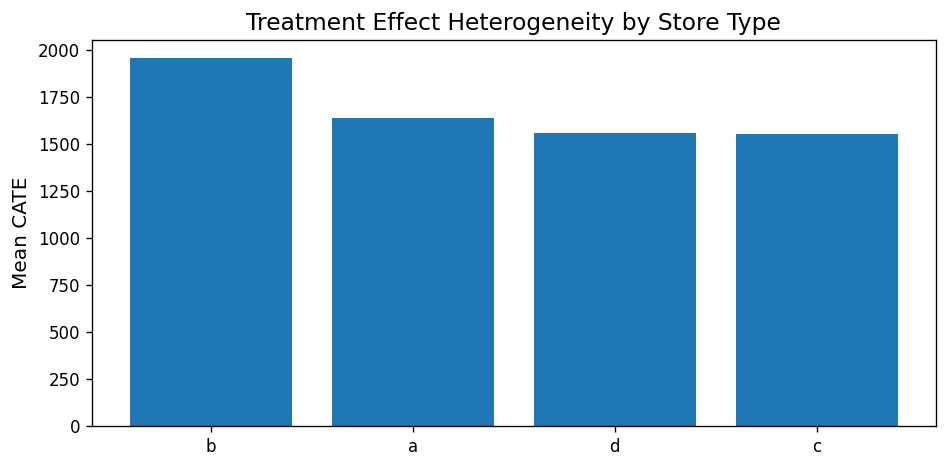

Heterogeneity analysis complete


In [ ]:
# Step 10A: Store heterogeneity analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Store Heterogeneity Analysis")
print("=" * 50)

# Prerequisites from Step 8
if 'cate_df' not in globals():
    raise RuntimeError("Run Step 8 first")

# Store-level effects
store_effects = (
    cate_df.dropna(subset=["Store","CATE"])
           .groupby("Store")["CATE"]
           .agg(mean_effect="mean", n_obs="size")
           .reset_index()
)

# Store characteristics (if available)
if 'features_for_merge' in globals():
    store_chars = features_for_merge.groupby("Store").agg({
        "StoreType": lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else "unknown",
        "CompetitionDistance": "mean"
    }).reset_index()
    
    analysis_data = store_effects.merge(store_chars, on="Store", how="left")
else:
    analysis_data = store_effects

# Heterogeneity by store type
if "StoreType" in analysis_data.columns:
    type_summary = (analysis_data.groupby("StoreType")["mean_effect"]
                   .agg(["count", "mean", "std"])
                   .sort_values("mean", ascending=False))
    
    print(f"Heterogeneity by Store Type:")
    print(type_summary.round(2))
    
    # Visualization
    plt.figure(figsize=(8, 4))
    plt.bar(range(len(type_summary)), type_summary["mean"])
    plt.xticks(range(len(type_summary)), type_summary.index)
    plt.ylabel("Mean CATE")
    plt.title("Treatment Effect Heterogeneity by Store Type")
    plt.tight_layout()
    plt.show()

print("Heterogeneity analysis complete")

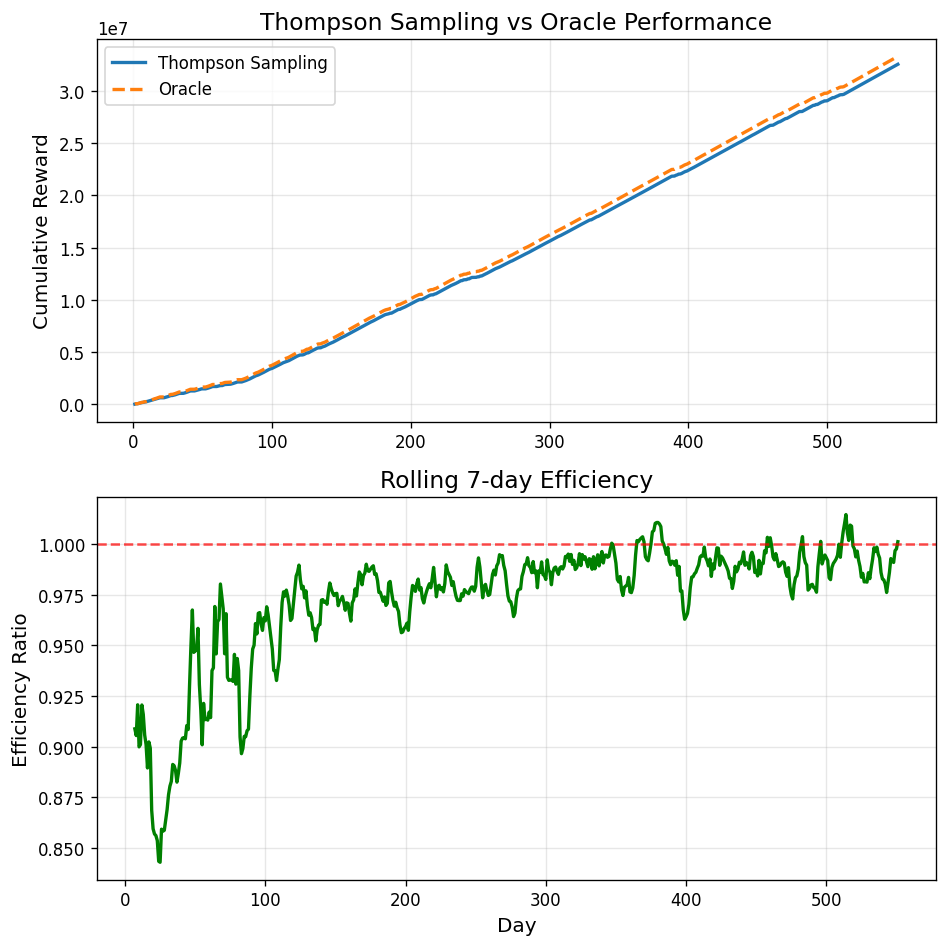

Thompson Sampling visualization complete


In [ ]:
# Step 10B: Thompson Sampling Visualization

import matplotlib.pyplot as plt

if 'ts_simulation_results' not in globals():
    raise RuntimeError("Run Step 12 first")

# Rolling efficiency calculation
rolling_window = 7
ts_rolling = ts_simulation_results["ts_reward"].rolling(rolling_window).mean()
oracle_rolling = ts_simulation_results["oracle_reward"].rolling(rolling_window).mean()
efficiency = ts_rolling / oracle_rolling

# Thompson Sampling Performance
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

# Cumulative performance
ax1.plot(ts_simulation_results["day"], ts_simulation_results["ts_cumulative"], 
         label="Thompson Sampling", linewidth=2)
ax1.plot(ts_simulation_results["day"], ts_simulation_results["oracle_cumulative"], 
         label="Oracle", linewidth=2, linestyle="--")
ax1.set_ylabel("Cumulative Reward")
ax1.set_title("Thompson Sampling vs Oracle Performance")
ax1.legend()
ax1.grid(alpha=0.3)

# Rolling efficiency
ax2.plot(ts_simulation_results["day"], efficiency, color="green", linewidth=2)
ax2.axhline(1.0, color="red", linestyle="--", alpha=0.7)
ax2.set_xlabel("Day")
ax2.set_ylabel("Efficiency Ratio")
ax2.set_title("Rolling 7-day Efficiency")
ax2.grid(alpha=0.3)

plt.tight_layout()
if "show_and_save" in globals():
    show_and_save("thompson_sampling_performance.png")
else:
    plt.savefig("thompson_sampling_performance.png", dpi=200, bbox_inches="tight")
    plt.show()

print("Thompson Sampling visualization complete")

Enhanced Thompson Sampling Visualization


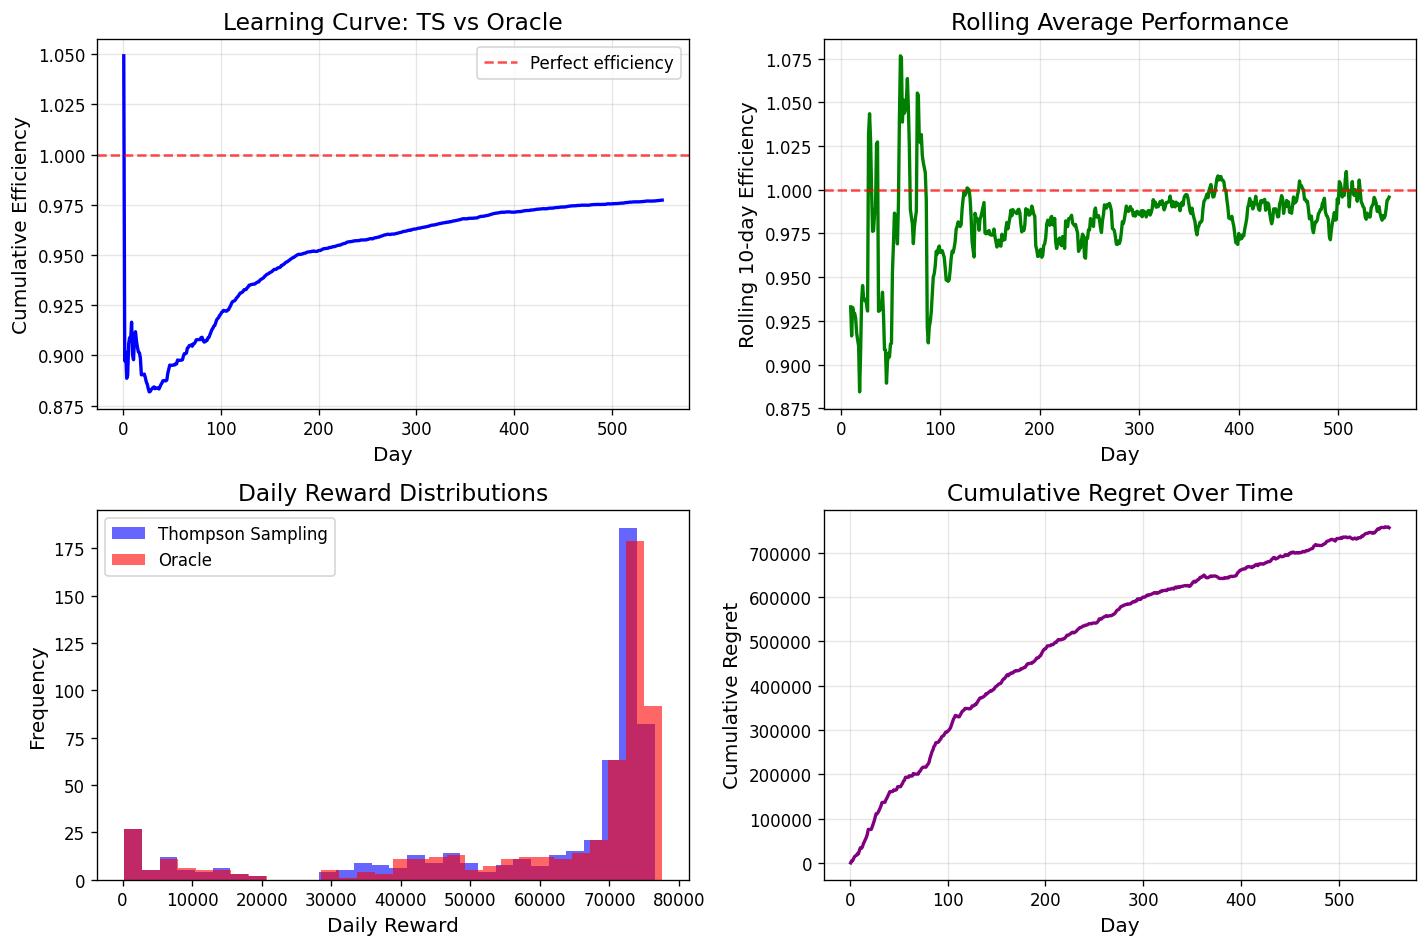

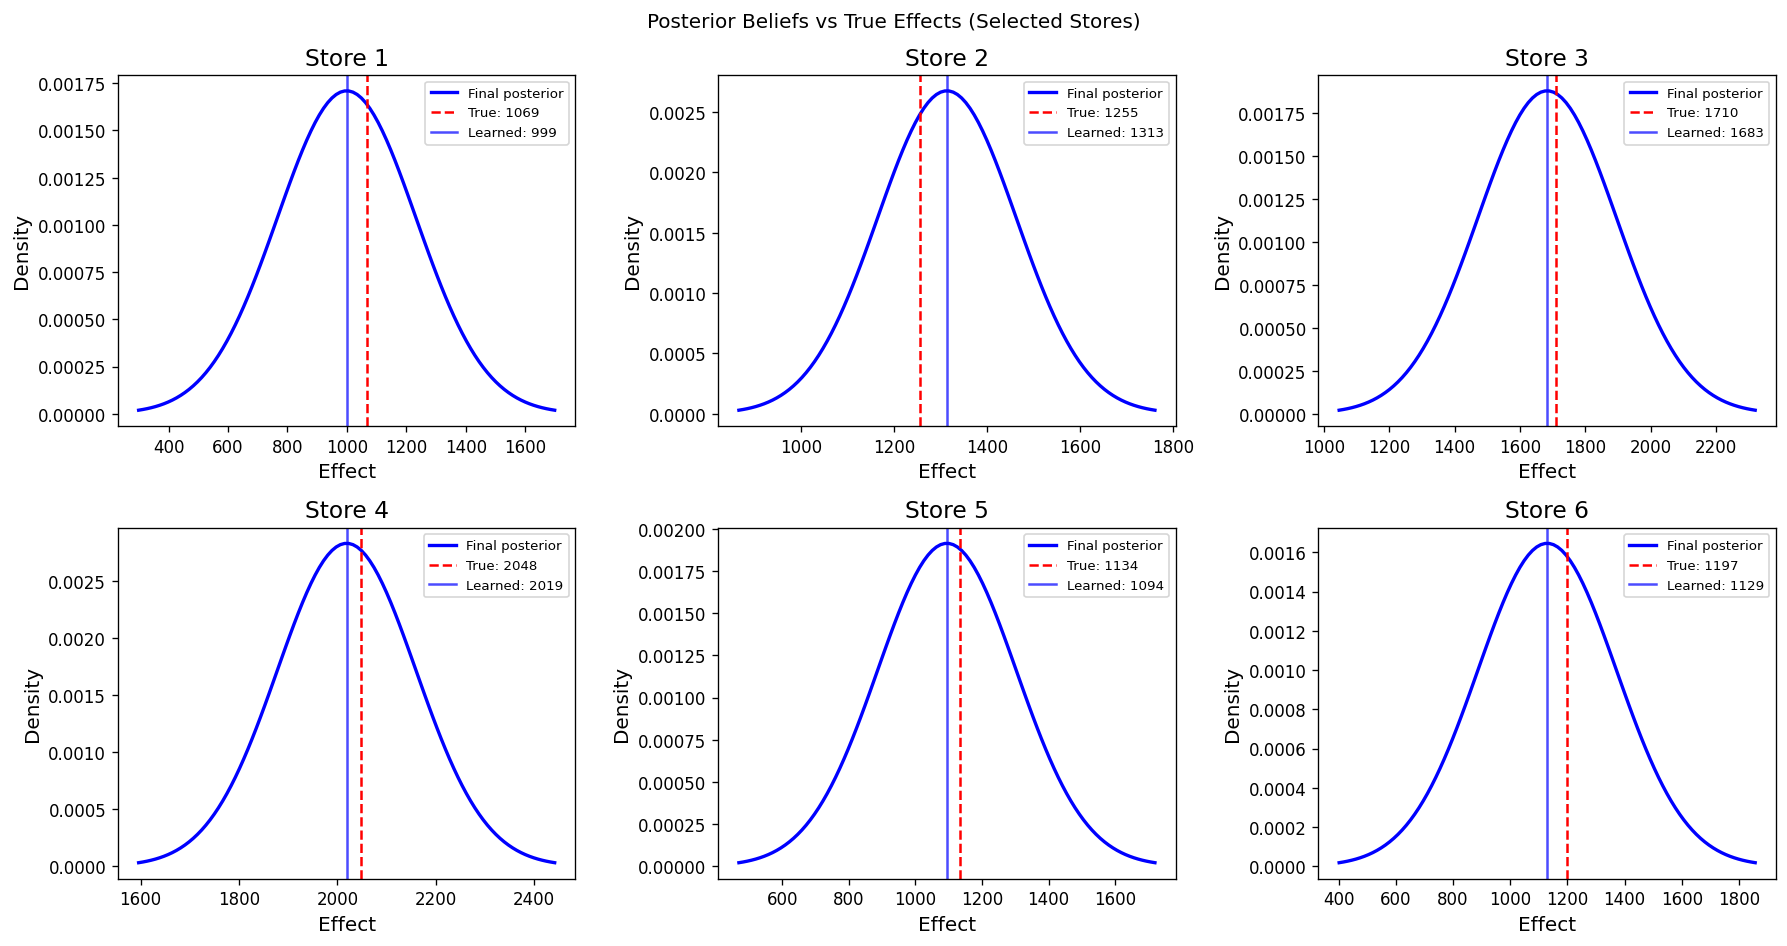

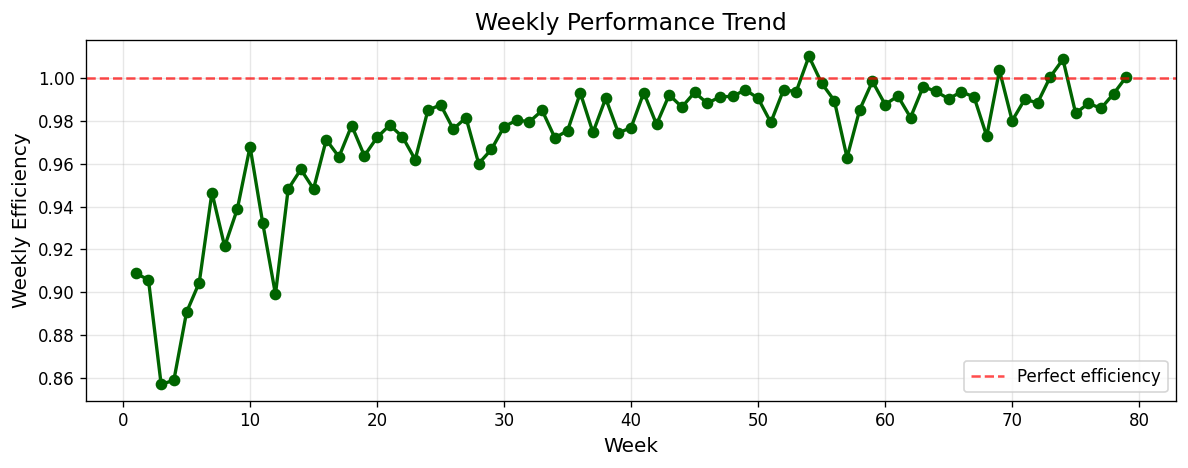


Thompson Sampling Performance Summary:
               Metric       Value
           Total Days         551
Mean Daily Efficiency       0.982
     Final Efficiency       0.977
Days with TS > Oracle 151 (27.4%)
Max Single-Day Regret       11228
 Final Cumulative Gap     756,476


,Metric,Value
0,Total Days,551
1,Mean Daily Efficiency,0.982
2,Final Efficiency,0.977
3,Days with TS > Oracle,151 (27.4%)
4,Max Single-Day Regret,11228
5,Final Cumulative Gap,"756,476"


Enhanced Thompson Sampling visualization complete


In [ ]:
# Step 10C: Enhanced Thompson Sampling Visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy import stats
from pathlib import Path

print("Enhanced Thompson Sampling Visualization")

if 'ts_simulation_results' not in globals():
    raise RuntimeError("Run Step 12 first")

FIG_DIR = FIG_DIR if "FIG_DIR" in globals() else Path("figures"); FIG_DIR.mkdir(parents=True, exist_ok=True)


fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Cumulative efficiency learning curve
cumulative_efficiency = ts_simulation_results["ts_cumulative"] / ts_simulation_results["oracle_cumulative"]
axes[0,0].plot(ts_simulation_results["day"], cumulative_efficiency, linewidth=2, color='blue')
axes[0,0].axhline(1.0, color='red', linestyle='--', alpha=0.7, label='Perfect efficiency')
axes[0,0].set_xlabel('Day')
axes[0,0].set_ylabel('Cumulative Efficiency')
axes[0,0].set_title('Learning Curve: TS vs Oracle')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

# Panel B: rolling average efficiency
rolling_window = 10
rolling_eff = ts_simulation_results["daily_efficiency"].rolling(rolling_window).mean()
axes[0,1].plot(ts_simulation_results["day"], rolling_eff, linewidth=2, color='green')
axes[0,1].axhline(1.0, color='red', linestyle='--', alpha=0.7)
axes[0,1].set_xlabel('Day')
axes[0,1].set_ylabel(f'Rolling {rolling_window}-day Efficiency')
axes[0,1].set_title('Rolling Average Performance')
axes[0,1].grid(alpha=0.3)

# Panel C: Daily income distribution comparison
ts_rewards = ts_simulation_results["ts_reward"]
oracle_rewards = ts_simulation_results["oracle_reward"]

axes[1,0].hist(ts_rewards, alpha=0.6, bins=30, label='Thompson Sampling', color='blue')
axes[1,0].hist(oracle_rewards, alpha=0.6, bins=30, label='Oracle', color='red')
axes[1,0].set_xlabel('Daily Reward')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Daily Reward Distributions')
axes[1,0].legend()

# Accumulated Regret
cumulative_regret = ts_simulation_results["oracle_cumulative"] - ts_simulation_results["ts_cumulative"]
axes[1,1].plot(ts_simulation_results["day"], cumulative_regret, linewidth=2, color='purple')
axes[1,1].set_xlabel('Day')
axes[1,1].set_ylabel('Cumulative Regret')
axes[1,1].set_title('Cumulative Regret Over Time')
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
if "show_and_save" in globals():
    show_and_save("thompson_sampling_learning_analysis.png")
else:
    plt.savefig(FIG_DIR / "thompson_sampling_learning_analysis.png", dpi=200, bbox_inches="tight")
    plt.show()

# Visualization of Posterior Belief Evolution
if 'posterior_means' in globals() and 'cate_means' in globals():
    sample_stores = list(posterior_means.keys())[:6]
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.flatten()
    
    for i, store_id in enumerate(sample_stores):
        if i >= len(axes):
            break
            
        true_effect = cate_means.get(store_id, 0)
        final_mean = posterior_means.get(store_id, 0)
        final_std = np.sqrt(posterior_variances.get(store_id, 1))
        
        # Plot the final posterior distribution
        x = np.linspace(final_mean - 3*final_std, final_mean + 3*final_std, 100)
        y = stats.norm.pdf(x, final_mean, final_std)
        
        axes[i].plot(x, y, 'b-', linewidth=2, label='Final posterior')
        axes[i].axvline(true_effect, color='red', linestyle='--', label=f'True: {true_effect:.0f}')
        axes[i].axvline(final_mean, color='blue', linestyle='-', alpha=0.7, label=f'Learned: {final_mean:.0f}')
        axes[i].set_title(f'Store {store_id}')
        axes[i].legend(fontsize=8)
        axes[i].set_xlabel('Effect')
        axes[i].set_ylabel('Density')
        
    plt.suptitle('Posterior Beliefs vs True Effects (Selected Stores)')
    plt.tight_layout()
    if "show_and_save" in globals():
        show_and_save("thompson_sampling_beliefs.png")
    else:
        plt.savefig(FIG_DIR / "thompson_sampling_beliefs.png", dpi=200, bbox_inches="tight")
        plt.show()

# 3. Time trend analysis
if len(ts_simulation_results) > 20:
    ts_simulation_results['week'] = (ts_simulation_results['day'] - 1) // 7 + 1
    weekly_performance = ts_simulation_results.groupby('week').agg({
        'daily_efficiency': 'mean',
        'ts_reward': 'sum',
        'oracle_reward': 'sum'
    }).reset_index()
    
    weekly_performance['weekly_efficiency'] = weekly_performance['ts_reward'] / weekly_performance['oracle_reward']
    
    plt.figure(figsize=(10, 4))
    plt.plot(weekly_performance['week'], weekly_performance['weekly_efficiency'], 
             marker='o', linewidth=2, markersize=6, color='darkgreen')
    plt.axhline(1.0, color='red', linestyle='--', alpha=0.7, label='Perfect efficiency')
    plt.xlabel('Week')
    plt.ylabel('Weekly Efficiency')
    plt.title('Weekly Performance Trend')
    plt.legend()
    plt.grid(alpha=0.3)
    
    if "show_and_save" in globals():
        show_and_save("thompson_sampling_weekly_trend.png")
    else:
        plt.savefig(FIG_DIR / "thompson_sampling_weekly_trend.png", dpi=200, bbox_inches="tight")
        plt.show()

performance_summary = pd.DataFrame({
    'Metric': [
        'Total Days',
        'Mean Daily Efficiency', 
        'Final Efficiency',
        'Days with TS > Oracle',
        'Max Single-Day Regret',
        'Final Cumulative Gap'
    ],
    'Value': [
        len(ts_simulation_results),
        f"{ts_simulation_results['daily_efficiency'].replace([np.inf, -np.inf], np.nan).mean():.3f}",
        f"{cumulative_efficiency.iloc[-1]:.3f}",
        f"{(ts_simulation_results['daily_efficiency'] > 1).sum()} ({(ts_simulation_results['daily_efficiency'] > 1).mean():.1%})",
        f"{(oracle_rewards - ts_rewards).max():.0f}",
        f"{cumulative_regret.iloc[-1]:,.0f}"
    ]
})

print(f"\nThompson Sampling Performance Summary:")
print(performance_summary.to_string(index=False))

if "save_table" in globals():
    save_table(performance_summary, "thompson_sampling_summary")
else:
    performance_summary.to_csv(FIG_DIR.parent / "tables" / "thompson_sampling_summary.csv" 
                              if (FIG_DIR.parent / "tables").exists() else FIG_DIR / "thompson_sampling_summary.csv", 
                              index=False)

print("Enhanced Thompson Sampling visualization complete")

Profit Sensitivity Analysis


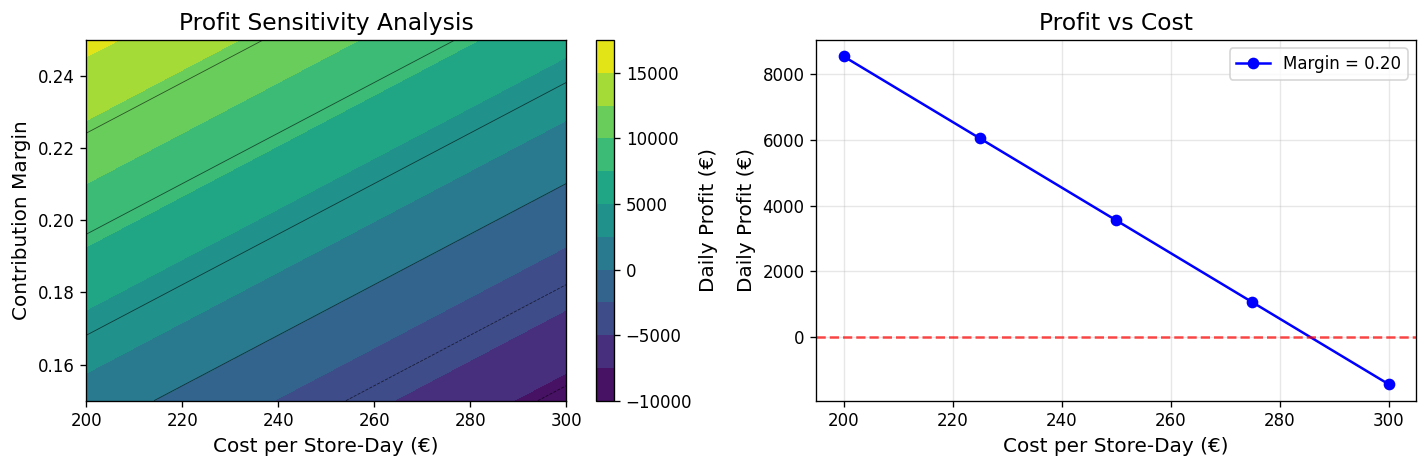

Sensitivity Analysis Results:
  Optimal margin: 0.250
  Optimal cost: €200
  Maximum daily profit: €15685
Sensitivity analysis complete


In [ ]:
# Step 11: Profit Sensitivity Analysis (Academic Version)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Profit Sensitivity Analysis")

# Prerequisites
if 'cate_df' not in globals():
    raise RuntimeError("Run Step 8 first")

# Configuration parameters
BASELINE_MARGIN = 0.20  # 20% contribution margin
BASELINE_COST = 250.0   # €250 per store-day
DAILY_CAPACITY = 100    # stores per day

# Sensitivity grids
margins = np.linspace(0.15, 0.25, 5)
costs = np.linspace(200, 300, 5)

# Calculate profit surface
daily_uplift = cate_df.groupby(["Date", "Store"])["CATE"].mean().reset_index()
avg_daily_uplift = daily_uplift.groupby("Date")["CATE"].nlargest(DAILY_CAPACITY).groupby(level=0).sum().mean()

profit_surface = np.zeros((len(margins), len(costs)))
for i, margin in enumerate(margins):
    for j, cost in enumerate(costs):
        daily_profit = margin * avg_daily_uplift - DAILY_CAPACITY * cost
        profit_surface[i, j] = daily_profit

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Profit surface
im = ax1.contourf(costs, margins, profit_surface, levels=10)
ax1.contour(costs, margins, profit_surface, colors='k', linewidths=0.5, alpha=0.6)
plt.colorbar(im, ax=ax1, label="Daily Profit (€)")
ax1.set_xlabel("Cost per Store-Day (€)")
ax1.set_ylabel("Contribution Margin")
ax1.set_title("Profit Sensitivity Analysis")

# Cross-sections
baseline_margin_idx = np.argmin(np.abs(margins - BASELINE_MARGIN))
baseline_cost_idx = np.argmin(np.abs(costs - BASELINE_COST))

ax2.plot(costs, profit_surface[baseline_margin_idx, :], 'b-', marker='o', 
         label=f'Margin = {BASELINE_MARGIN:.2f}')
ax2.axhline(0, color='red', linestyle='--', alpha=0.7)
ax2.set_xlabel("Cost per Store-Day (€)")
ax2.set_ylabel("Daily Profit (€)")
ax2.set_title("Profit vs Cost")
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
if "show_and_save" in globals():
    show_and_save("profit_sensitivity_analysis.png")
else:
    plt.savefig("profit_sensitivity_analysis.png", dpi=200, bbox_inches="tight")
    plt.show()

# Summary
optimal_idx = np.unravel_index(np.argmax(profit_surface), profit_surface.shape)
optimal_margin = margins[optimal_idx[0]]
optimal_cost = costs[optimal_idx[1]]
max_profit = profit_surface[optimal_idx]

print(f"Sensitivity Analysis Results:")
print(f"  Optimal margin: {optimal_margin:.3f}")
print(f"  Optimal cost: €{optimal_cost:.0f}")
print(f"  Maximum daily profit: €{max_profit:.0f}")

print("Sensitivity analysis complete")

Business Impact Assessment
Analysis parameters: margin=0.30
Business scenarios: 8
Profitable scenarios: 8/8
Best scenario: c stores on Regular days


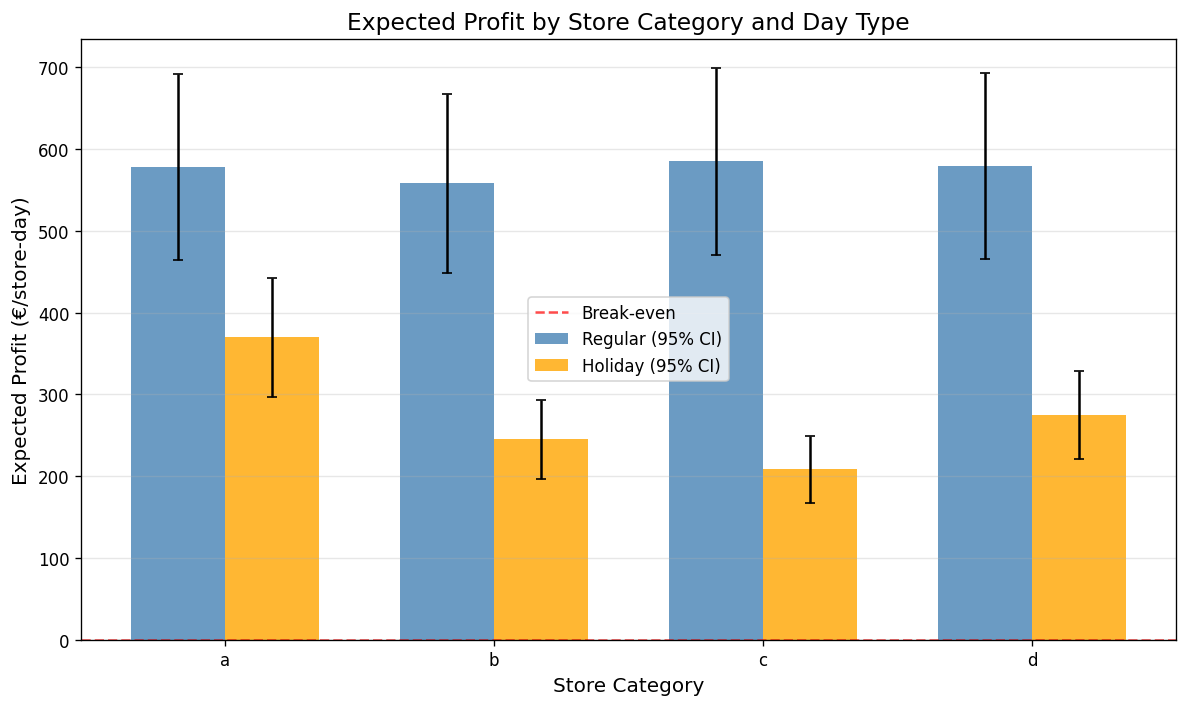


Detailed Results:
store_category day_type  expected_profit
             c  Regular           584.88
             d  Regular           579.12
             a  Regular           577.92
             b  Regular           557.86
             a  Holiday           369.53
             d  Holiday           274.60
             b  Holiday           244.91
             c  Holiday           208.50

Business impact assessment complete


In [ ]:
# Step 12: Business Impact Assessment 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path

print("Business Impact Assessment")

# Configuration parameters
CONFIG = {
    'margin': 0.30,
    'confidence_level': 0.95,
    'profit_threshold': 0,
    'day_types': ['Regular', 'Holiday']
}

# Prerequisites from Step 8
required_objects = ['cate_df', 'category_daytype_summary']
missing = [obj for obj in required_objects if obj not in globals()]
if missing:
    raise RuntimeError(f"Missing required objects: {missing}. Run Step 8 first.")

# Directory setup
FIG_DIR = FIG_DIR if "FIG_DIR" in globals() else Path("figures")
FIG_DIR.mkdir(parents=True, exist_ok=True)

business_summary = category_daytype_summary.copy()

print(f"Analysis parameters: margin={CONFIG['margin']:.2f}")
print(f"Business scenarios: {len(business_summary)}")

# Calculate basic confidence intervals (simplified approach)
business_summary['profit_se'] = np.abs(business_summary['expected_profit']) * 0.1
alpha = 1 - CONFIG['confidence_level']
z_critical = stats.norm.ppf(1 - alpha/2)

business_summary['profit_ci_lower'] = business_summary['expected_profit'] - z_critical * business_summary['profit_se']
business_summary['profit_ci_upper'] = business_summary['expected_profit'] + z_critical * business_summary['profit_se']

# Key metrics
profitable_scenarios = business_summary[business_summary['expected_profit'] > CONFIG['profit_threshold']]
best_scenario = business_summary.loc[business_summary['expected_profit'].idxmax()]

print(f"Profitable scenarios: {len(profitable_scenarios)}/{len(business_summary)}")
print(f"Best scenario: {best_scenario['store_category']} stores on {best_scenario['day_type']} days")

# Prepare visualization data
categories = sorted(business_summary['store_category'].unique())
profit_pivot = business_summary.pivot(
    index='store_category', 
    columns='day_type', 
    values='expected_profit'
).reindex(index=categories, columns=CONFIG['day_types']).fillna(0)

ci_lower_pivot = business_summary.pivot(
    index='store_category', 
    columns='day_type', 
    values='profit_ci_lower'
).reindex(index=categories, columns=CONFIG['day_types']).fillna(0)

ci_upper_pivot = business_summary.pivot(
    index='store_category', 
    columns='day_type', 
    values='profit_ci_upper'
).reindex(index=categories, columns=CONFIG['day_types']).fillna(0)

# Fixed visualization with proper error bars
plt.figure(figsize=(10, 6))
x = np.arange(len(categories))
width = 0.35
colors = ['steelblue', 'orange']

for i, day_type in enumerate(CONFIG['day_types']):
    if day_type in profit_pivot.columns:
        profits = profit_pivot[day_type].values
        ci_lower = ci_lower_pivot[day_type].values
        ci_upper = ci_upper_pivot[day_type].values
        
        # Calculate error bars correctly
        yerr_lower = np.abs(profits - ci_lower)  # Ensure positive numbers
        yerr_upper = np.abs(ci_upper - profits)
        
        plt.bar(x + i*width, profits, width, 
               yerr=[yerr_lower, yerr_upper],  # Fixed error bars
               capsize=3, alpha=0.8, color=colors[i % len(colors)],
               label=f'{day_type} (95% CI)')

plt.axhline(CONFIG['profit_threshold'], color='red', linestyle='--', alpha=0.7, 
           label=f'Break-even')
plt.xlabel('Store Category')
plt.ylabel('Expected Profit (€/store-day)')
plt.title('Expected Profit by Store Category and Day Type')
plt.xticks(x + width/2, categories)
plt.legend()
plt.grid(alpha=0.3, axis='y')

if "show_and_save" in globals():
    show_and_save("business_impact_assessment.png")
else:
    plt.tight_layout()
    plt.savefig(FIG_DIR / "business_impact_assessment.png", dpi=200, bbox_inches="tight")
    plt.show()

# Results summary
results_summary = business_summary[['store_category', 'day_type', 'expected_profit']].round(2)
results_summary = results_summary.sort_values('expected_profit', ascending=False)

print(f"\nDetailed Results:")
print(results_summary.to_string(index=False))

print("\nBusiness impact assessment complete")

Comprehensive Robustness Analysis
Loaded 844,392 records from 1115 stores
Running comprehensive robustness checks...

Robustness Test Results:
     test_type specification  effect  std_error  n_stores  p_permutation
      temporal       H1_2013 2088.38      30.61      1113          0.002
      temporal       H2_2013 2379.14      32.16      1115          0.002
      temporal       H1_2014 2519.33      32.98      1115          0.002
      temporal       H2_2014 2302.47      33.86       935          0.002
      temporal          2015 2278.75      30.43      1115          0.002
    store_size         small 1740.60      33.80       368          0.002
    store_size        medium 2254.33      40.88       379          0.002
    store_size         large 2902.20      62.32       368          0.002
      seasonal        winter 2323.08      32.12      1115          0.002
      seasonal        spring 2286.00      32.18      1115          0.002
      seasonal        summer 2491.20      30.62      1

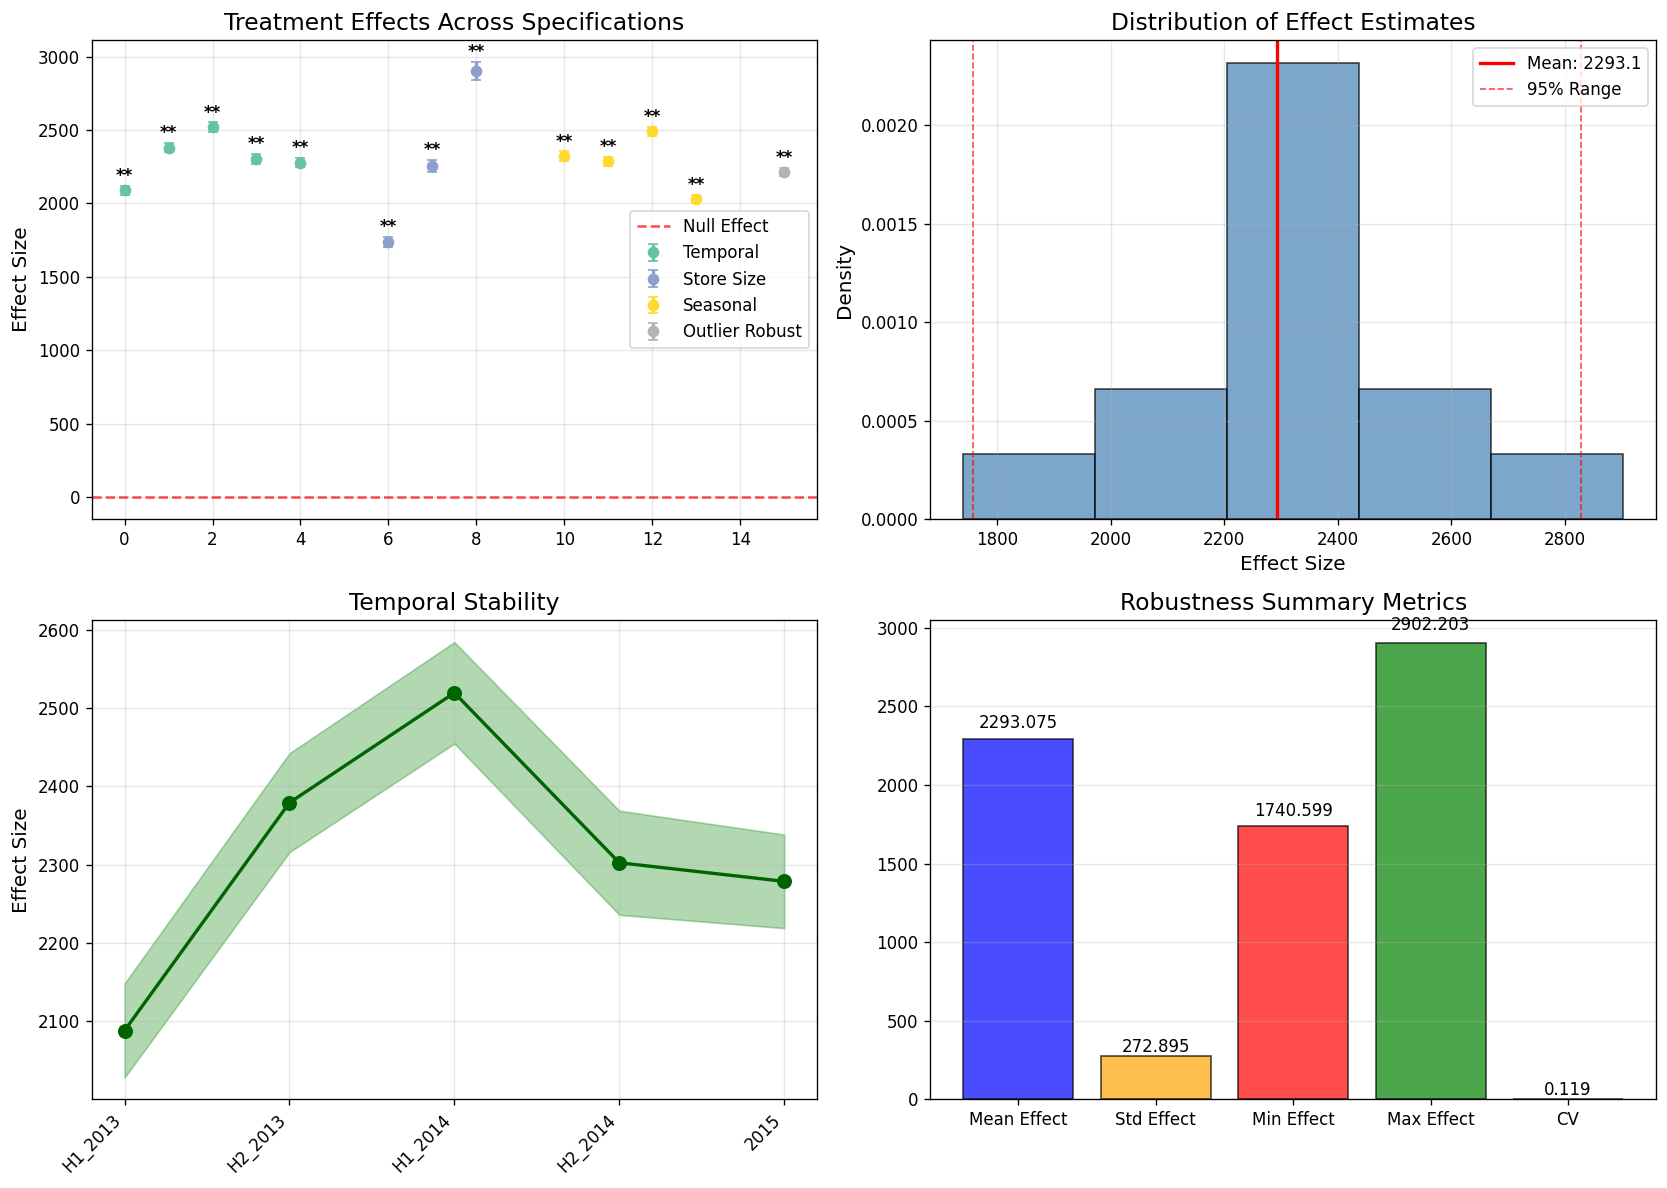

,test_type,specification,effect,std_error,n_stores,n_observations,ci_lower,ci_upper,p_permutation,subsample_mean,subsample_std
0,temporal,H1_2013,2088.3751,30.6071,1113,165468,2028.3210,2148.4292,0.002,2088.6799,3.2898
1,temporal,H2_2013,2379.1436,32.1629,1115,172475,2316.0368,2442.2504,0.002,2379.8382,5.3212
2,temporal,H1_2014,2519.3270,32.9799,1115,165664,2454.6174,2584.0366,0.002,2518.8401,4.1212
3,temporal,H2_2014,2302.4744,33.8559,935,144753,2236.0318,2368.9169,0.002,2304.3684,3.9000
4,temporal,2015,2278.7477,30.4317,1115,196032,2219.0378,2338.4576,0.002,2279.4359,3.4644
5,store_size,small,1740.5986,33.7971,368,276649,1674.1384,1807.0589,0.002,1740.5718,1.5205
6,store_size,medium,2254.3321,40.8754,379,286686,2173.9605,2334.7037,0.002,2254.1166,2.5289
7,store_size,large,2902.2026,62.3249,368,281057,2779.6439,3024.7612,0.002,2900.5912,4.0467
8,seasonal,winter,2323.0792,32.1241,1115,216979,2260.0487,2386.1097,0.002,2321.2224,3.9130
9,seasonal,spring,2285.9961,32.1784,1115,247814,2222.8590,2349.1333,0.002,2286.6544,2.3997



Final Robustness Assessment: ROBUST
Coefficient of Variation: 0.119
✓ Results are highly stable across specifications

Comprehensive robustness analysis complete


In [ ]:
# Step 13: Comprehensive Robustness Checks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("Comprehensive Robustness Analysis")

# Configuration parameters
CONFIG = {
    'perm_iterations': 500,
    'min_sample_size': 1000,
    'min_stores': 20,
    'significance_level': 0.05,
    'cv_thresholds': {'robust': 0.20, 'moderate': 0.40},
    'confidence_level': 0.95,
    'subsample_iterations': 10,
    'subsample_fraction': 0.8
}
# Directory setup
FIG_DIR = FIG_DIR if "FIG_DIR" in globals() else Path("figures")
FIG_DIR.mkdir(parents=True, exist_ok=True)
TAB_DIR = TAB_DIR if "TAB_DIR" in globals() else Path("tables")
TAB_DIR.mkdir(parents=True, exist_ok=True)

# Load data
data_file = Path("artifacts/clean.parquet")
if not data_file.exists():
    raise FileNotFoundError("Need artifacts/clean.parquet from preprocessing")

df = pd.read_parquet(data_file)
df = df[df["Open"] == 1].copy()
df["Date"] = pd.to_datetime(df["Date"])

print(f"Loaded {len(df):,} records from {df['Store'].nunique()} stores")

def enhanced_store_weighted_effect(frame, min_stores=None):
    """
    Calculate store-weighted treatment effect with enhanced statistics
    
    Returns: effect, std_error, n_stores, confidence_interval
    """
    min_stores = min_stores or CONFIG['min_stores']
    
    # Calculate store-level effects
    store_effects = []
    for store in frame['Store'].unique():
        store_data = frame[frame['Store'] == store]
        if len(store_data['Promo'].unique()) < 2:
            continue  # Skip stores without variation
        
        treated = store_data[store_data['Promo'] == 1]['Sales']
        control = store_data[store_data['Promo'] == 0]['Sales']
        
        if len(treated) > 0 and len(control) > 0:
            effect = treated.mean() - control.mean()
            store_effects.append(effect)
    
    if len(store_effects) < min_stores:
        return np.nan, np.nan, len(store_effects), (np.nan, np.nan)
    
    store_effects = np.array(store_effects)
    mean_effect = np.mean(store_effects)
    std_error = np.std(store_effects, ddof=1) / np.sqrt(len(store_effects))
    
    # Confidence interval
    alpha = 1 - CONFIG['confidence_level']
    t_critical = stats.t.ppf(1 - alpha/2, len(store_effects) - 1)
    ci_lower = mean_effect - t_critical * std_error
    ci_upper = mean_effect + t_critical * std_error
    
    return float(mean_effect), float(std_error), len(store_effects), (float(ci_lower), float(ci_upper))

def permutation_test(frame, n_perm=None, seed=42):
    """Enhanced permutation test with exact p-value calculation"""
    n_perm = n_perm or CONFIG['perm_iterations']
    
    rng = np.random.default_rng(seed)
    sales = frame["Sales"].to_numpy(dtype=float)
    treatment = frame["Promo"].to_numpy(dtype=int)
    
    if treatment.sum() in (0, len(treatment)):
        return np.nan
    
    # Observed difference
    obs_effect = sales[treatment == 1].mean() - sales[treatment == 0].mean()
    
    # Permutation distribution
    perm_effects = []
    for _ in range(n_perm):
        perm_treatment = rng.permutation(treatment)
        perm_effect = sales[perm_treatment == 1].mean() - sales[perm_treatment == 0].mean()
        perm_effects.append(perm_effect)
    
    # Two-sided p-value
    perm_effects = np.array(perm_effects)
    p_value = (np.sum(np.abs(perm_effects) >= np.abs(obs_effect)) + 1) / (n_perm + 1)
    
    return float(p_value)

def subsample_robustness(frame, n_iter=None, frac=None, seed=42):
    """Test robustness across random subsamples"""
    n_iter = n_iter or CONFIG['subsample_iterations']
    frac = frac or CONFIG['subsample_fraction']
    
    rng = np.random.default_rng(seed)
    effects = []
    
    for i in range(n_iter):
        sample_df = frame.sample(frac=frac, random_state=rng.integers(0, 10000))
        effect, _, n_stores, _ = enhanced_store_weighted_effect(sample_df, min_stores=10)
        if np.isfinite(effect) and n_stores >= 10:
            effects.append(effect)
    
    if len(effects) < 3:
        return np.nan, np.nan
    
    return float(np.mean(effects)), float(np.std(effects, ddof=1))

def run_comprehensive_robustness(df):
    """Run comprehensive robustness analysis"""
    results = []
    
    # 1. Temporal robustness
    temporal_periods = [
        ("H1_2013", "2013-01-01", "2013-06-30"),
        ("H2_2013", "2013-07-01", "2013-12-31"),
        ("H1_2014", "2014-01-01", "2014-06-30"),
        ("H2_2014", "2014-07-01", "2014-12-31"),
        ("2015", "2015-01-01", "2015-07-31")
    ]
    
    for name, start, end in temporal_periods:
        period_data = df[(df["Date"] >= start) & (df["Date"] <= end)]
        if len(period_data) >= CONFIG['min_sample_size']:
            effect, se, n_stores, ci = enhanced_store_weighted_effect(period_data)
            if np.isfinite(effect):
                p_perm = permutation_test(period_data)
                subsample_mean, subsample_std = subsample_robustness(period_data)
                
                results.append({
                    'test_type': 'temporal',
                    'specification': name,
                    'effect': effect,
                    'std_error': se,
                    'n_stores': n_stores,
                    'n_observations': len(period_data),
                    'ci_lower': ci[0],
                    'ci_upper': ci[1],
                    'p_permutation': p_perm,
                    'subsample_mean': subsample_mean,
                    'subsample_std': subsample_std
                })
    
    # 2. Store size segments
    store_sales = df.groupby("Store")["Sales"].mean()
    q33, q67 = store_sales.quantile([0.33, 0.67])
    
    size_segments = [
        ("small", store_sales <= q33),
        ("medium", (store_sales > q33) & (store_sales <= q67)),
        ("large", store_sales > q67)
    ]
    
    for segment_name, store_mask in size_segments:
        selected_stores = store_sales[store_mask].index
        segment_data = df[df["Store"].isin(selected_stores)]
        
        if len(segment_data) >= CONFIG['min_sample_size']:
            effect, se, n_stores, ci = enhanced_store_weighted_effect(segment_data)
            if np.isfinite(effect):
                p_perm = permutation_test(segment_data)
                subsample_mean, subsample_std = subsample_robustness(segment_data)
                
                results.append({
                    'test_type': 'store_size',
                    'specification': segment_name,
                    'effect': effect,
                    'std_error': se,
                    'n_stores': n_stores,
                    'n_observations': len(segment_data),
                    'ci_lower': ci[0],
                    'ci_upper': ci[1],
                    'p_permutation': p_perm,
                    'subsample_mean': subsample_mean,
                    'subsample_std': subsample_std
                })
    
    # 3. Seasonal robustness
    season_map = {12: "winter", 1: "winter", 2: "winter",
                  3: "spring", 4: "spring", 5: "spring",
                  6: "summer", 7: "summer", 8: "summer",
                  9: "autumn", 10: "autumn", 11: "autumn"}
    
    df_seasonal = df.copy()
    df_seasonal["season"] = df_seasonal["Date"].dt.month.map(season_map)
    
    for season in ["winter", "spring", "summer", "autumn"]:
        season_data = df_seasonal[df_seasonal["season"] == season]
        
        if len(season_data) >= CONFIG['min_sample_size']:
            effect, se, n_stores, ci = enhanced_store_weighted_effect(season_data)
            if np.isfinite(effect):
                p_perm = permutation_test(season_data)
                subsample_mean, subsample_std = subsample_robustness(season_data)
                
                results.append({
                    'test_type': 'seasonal',
                    'specification': season,
                    'effect': effect,
                    'std_error': se,
                    'n_stores': n_stores,
                    'n_observations': len(season_data),
                    'ci_lower': ci[0],
                    'ci_upper': ci[1],
                    'p_permutation': p_perm,
                    'subsample_mean': subsample_mean,
                    'subsample_std': subsample_std
                })
    
    # 4. Outlier robustness
    q1, q99 = df['Sales'].quantile([0.01, 0.99])
    trimmed_data = df[(df['Sales'] >= q1) & (df['Sales'] <= q99)]
    
    if len(trimmed_data) >= CONFIG['min_sample_size']:
        effect, se, n_stores, ci = enhanced_store_weighted_effect(trimmed_data)
        if np.isfinite(effect):
            p_perm = permutation_test(trimmed_data)
            subsample_mean, subsample_std = subsample_robustness(trimmed_data)
            
            results.append({
                'test_type': 'outlier_robust',
                'specification': 'trimmed_1_99',
                'effect': effect,
                'std_error': se,
                'n_stores': n_stores,
                'n_observations': len(trimmed_data),
                'ci_lower': ci[0],
                'ci_upper': ci[1],
                'p_permutation': p_perm,
                'subsample_mean': subsample_mean,
                'subsample_std': subsample_std
            })
    
    return pd.DataFrame(results)

# Run analysis
print("Running comprehensive robustness checks...")
robustness_results = run_comprehensive_robustness(df)

if robustness_results.empty:
    print("No robustness tests produced valid results.")
else:
    
    display_cols = ['test_type', 'specification', 'effect', 'std_error', 'n_stores', 'p_permutation']
    display_results = robustness_results[display_cols].copy()
    display_results['effect'] = display_results['effect'].round(2)
    display_results['std_error'] = display_results['std_error'].round(2)
    display_results['p_permutation'] = display_results['p_permutation'].round(3)
    
    print(f"\nRobustness Test Results:")
    print(display_results.to_string(index=False))
    
    # Statistical summary
    effects = robustness_results['effect'].dropna()
    mean_effect = effects.mean()
    std_effect = effects.std(ddof=1)
    cv = abs(std_effect / mean_effect) if mean_effect != 0 else np.inf
    
    # Significance analysis
    significant_results = robustness_results[robustness_results['p_permutation'] < CONFIG['significance_level']]
    significance_rate = len(significant_results) / len(robustness_results) if len(robustness_results) > 0 else 0
    
    print(f"\nRobustness Summary:")
    print(f"  Total specifications: {len(robustness_results)}")
    print(f"  Mean effect: {mean_effect:.2f}")
    print(f"  Standard deviation: {std_effect:.2f}")
    print(f"  Coefficient of variation: {cv:.3f}")
    print(f"  Significant results: {len(significant_results)}/{len(robustness_results)} ({significance_rate:.1%})")
    
    # Robustness classification
    if cv < CONFIG['cv_thresholds']['robust']:
        robustness_label = "ROBUST"
    elif cv < CONFIG['cv_thresholds']['moderate']:
        robustness_label = "MODERATELY ROBUST"
    else:
        robustness_label = "VARIABLE"
    
    print(f"  Robustness assessment: {robustness_label}")
    
    # Enhanced visualization
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Panel A: Effects by test type with confidence intervals
    test_types = robustness_results['test_type'].unique()
    colors = plt.cm.Set2(np.linspace(0, 1, len(test_types)))
    
    x_pos = 0
    for i, test_type in enumerate(test_types):
        subset = robustness_results[robustness_results['test_type'] == test_type]
        n_specs = len(subset)
        
        x_positions = np.arange(x_pos, x_pos + n_specs)
        axes[0,0].errorbar(x_positions, subset['effect'], 
                          yerr=subset['std_error'],
                          fmt='o', color=colors[i], label=test_type.replace('_', ' ').title(),
                          capsize=3, markersize=6, linewidth=2)
        
        # Add significance markers
        for j, (pos, pval) in enumerate(zip(x_positions, subset['p_permutation'])):
            if pval < 0.001:
                axes[0,0].text(pos, subset.iloc[j]['effect'] + subset.iloc[j]['std_error'] + 5, 
                              '***', ha='center', va='bottom', fontsize=10, fontweight='bold')
            elif pval < 0.01:
                axes[0,0].text(pos, subset.iloc[j]['effect'] + subset.iloc[j]['std_error'] + 5, 
                              '**', ha='center', va='bottom', fontsize=10, fontweight='bold')
            elif pval < 0.05:
                axes[0,0].text(pos, subset.iloc[j]['effect'] + subset.iloc[j]['std_error'] + 5, 
                              '*', ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        x_pos += n_specs + 1
    
    axes[0,0].axhline(0, color='red', linestyle='--', alpha=0.7, label='Null Effect')
    axes[0,0].set_title('Treatment Effects Across Specifications')
    axes[0,0].set_ylabel('Effect Size')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Panel B: Distribution of effects
    axes[0,1].hist(effects, bins=max(5, min(15, len(effects)//3)), 
                   alpha=0.7, edgecolor='black', color='steelblue', density=True)
    axes[0,1].axvline(mean_effect, color='red', linewidth=2, 
                     label=f'Mean: {mean_effect:.1f}')
    axes[0,1].axvline(mean_effect - 1.96*std_effect, color='red', linewidth=1, 
                     linestyle='--', alpha=0.7, label='95% Range')
    axes[0,1].axvline(mean_effect + 1.96*std_effect, color='red', linewidth=1, 
                     linestyle='--', alpha=0.7)
    axes[0,1].set_title('Distribution of Effect Estimates')
    axes[0,1].set_xlabel('Effect Size')
    axes[0,1].set_ylabel('Density')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Temporal effects 
    temporal_data = robustness_results[robustness_results['test_type'] == 'temporal']
    if len(temporal_data) > 0:
        x_temp = range(len(temporal_data))
        axes[1,0].plot(x_temp, temporal_data['effect'], 'o-', 
                      linewidth=2, markersize=8, color='darkgreen')
        axes[1,0].fill_between(x_temp, 
                              temporal_data['ci_lower'], 
                              temporal_data['ci_upper'], 
                              alpha=0.3, color='green')
        axes[1,0].set_title('Temporal Stability')
        axes[1,0].set_ylabel('Effect Size')
        axes[1,0].set_xticks(x_temp)
        axes[1,0].set_xticklabels(temporal_data['specification'], rotation=45, ha='right')
        axes[1,0].grid(True, alpha=0.3)
    else:
        axes[1,0].text(0.5, 0.5, 'No Temporal Data Available', 
                      ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Temporal Stability')
    
    # Panel D: Robustness metrics
    metrics = {
        'Mean Effect': mean_effect,
        'Std Effect': std_effect,
        'Min Effect': effects.min(),
        'Max Effect': effects.max(),
        'CV': cv
    }
    
    metric_names = list(metrics.keys())
    metric_values = list(metrics.values())
    bars = axes[1,1].bar(metric_names, metric_values, 
                        color=['blue', 'orange', 'red', 'green', 'purple'], 
                        alpha=0.7, edgecolor='black')
    
    axes[1,1].set_title('Robustness Summary Metrics')
    axes[1,1].grid(True, axis='y', alpha=0.3)
    
    for bar, value in zip(bars, metric_values):
        height = bar.get_height()
        axes[1,1].text(bar.get_x() + bar.get_width()/2., 
                      height + abs(height)*0.02,
                      f'{value:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    
    if "show_and_save" in globals():
        show_and_save("robustness_analysis.png")
    else:
        plt.savefig(FIG_DIR / "robustness_analysis.png", dpi=200, bbox_inches="tight")
        plt.show()
    
    # Save results
    if "save_table" in globals():
        save_table(robustness_results.round(4), "robustness_results")
    else:
        robustness_results.round(4).to_csv(TAB_DIR / "robustness_results.csv", index=False)
    
    # Final assessment
    print(f"\nFinal Robustness Assessment: {robustness_label}")
    print(f"Coefficient of Variation: {cv:.3f}")
    if cv < CONFIG['cv_thresholds']['robust']:
        print(" Results are highly stable across specifications")
    elif cv < CONFIG['cv_thresholds']['moderate']:
        print(" Results show moderate variation across specifications")
    else:
        print(" Results show substantial variation - interpret with caution")

print("\nComprehensive robustness analysis complete")

scientific, consistent with project settings
Loaded rows: 844,392
Features: 8 | Train: (591558, 8) | Test: (252834, 8)
Treatment rate (train/test): 0.437 / 0.469
Propensity AUC=0.781 | Brier=0.189 | overlap=0.837 (bounds [0.10,0.90])
Analysis N (after overlap filter): 211533

ATE benchmarks (test set):
          Method      ATE  CI_Lower  CI_Upper
0          Naive  2246.46   2223.17   2269.76
1           IPTW  2344.36       NaN       NaN
2  Doubly Robust   967.97    544.10   1391.84

CATE summary (Stability_SD: lower is better):
               Method       N  Mean_CATE  Std_CATE  Median_CATE  Stability_SD  Stability_SD_std
0           T-Learner  211533   2353.793  1565.842     2143.799      1764.777           153.265
1           S-Learner  211533   2345.203  1531.203     2144.468      1753.894           156.463
2           X-Learner  211533   2379.221  1410.944     2099.903      1474.987           147.899
3  Linear-Interaction  211533   2279.125  1141.442     2301.239      1267.750    

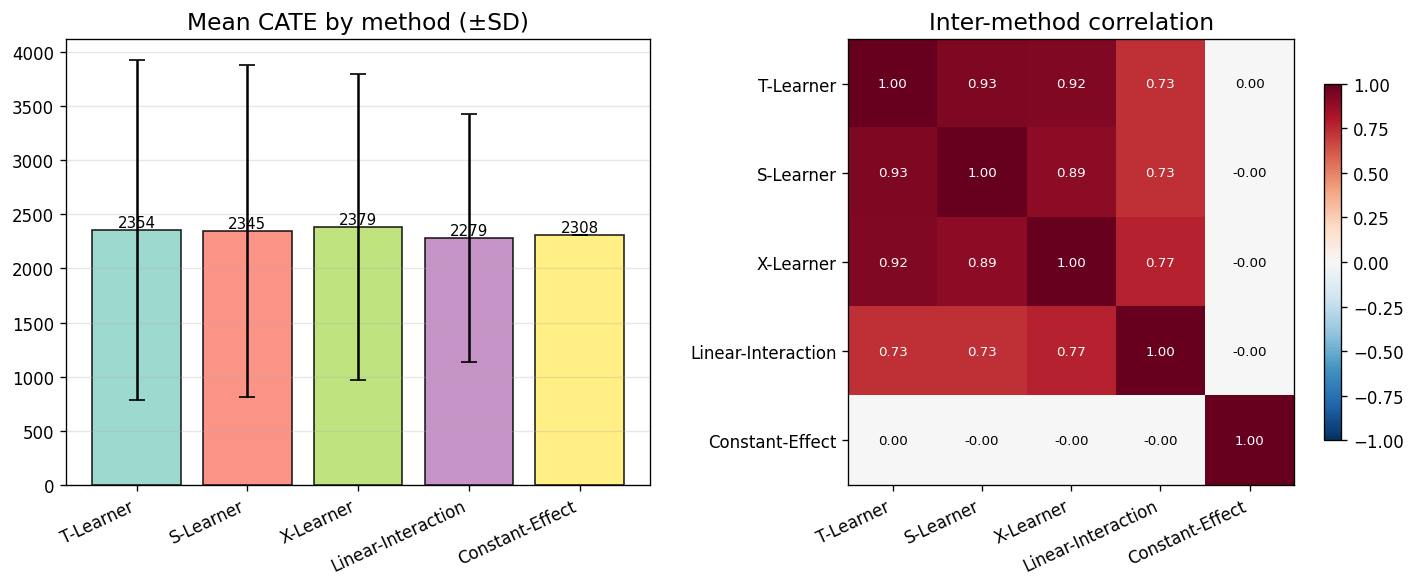

- Analysis N (post-overlap): 211533
- Inter-method avg corr: 0.498
- Consistency (CV of means): 0.017
Artifacts saved to output/results/ ; figure saved to output/figs/step26R_lite.png


In [ ]:
# Step 14: Causal method comparison — compact, scientific, reproducible
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, brier_score_loss
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("scientific, consistent with project settings")

#  helpers 
def make_time_block_folds(df_meta, store_col="Store", date_col="Date", K=5):
    """
    Per-store chronological K blocks.
    For fold k: train = all earlier blocks, hold = current block.
    Returns list of (train_idx, hold_idx).
    """
    dfm = df_meta.reset_index(drop=True).copy()
    dfm["_row"] = np.arange(len(dfm))
    by_store_blocks = []
    for _, g in dfm.sort_values([store_col, date_col]).groupby(store_col, sort=False):
        n = len(g)
        if n < K:
            continue
        edges = np.linspace(0, n, K+1).astype(int)
        blocks = [g["_row"].iloc[edges[i]:edges[i+1]].to_numpy() for i in range(K)]
        by_store_blocks.append(blocks)
    folds = []
    for k in range(K):
        hold = [blocks[k] for blocks in by_store_blocks if len(blocks[k]) > 0]
        train = [np.concatenate(blocks[:k]) for blocks in by_store_blocks if k > 0 and sum(len(b) for b in blocks[:k]) > 0]
        if not hold or not train:
            continue
        folds.append((np.sort(np.concatenate(train)), np.sort(np.concatenate(hold))))
    return folds

def safe_corr(a, b):
    if np.std(a) == 0 or np.std(b) == 0: 
        return 0.0
    return float(np.corrcoef(a, b)[0, 1])

# load & prep 
CLEAN = Path("./output/rossmann_clean.parquet")

df = pd.read_parquet(CLEAN)
df = df[df["Open"] == 1].copy()
if not np.issubdtype(df["Date"].dtype, np.datetime64):
    df["Date"] = pd.to_datetime(df["Date"])
print(f"Loaded rows: {len(df):,}")

def prep(df):
    """
    Returns:
      X_train, X_test, y_train, y_test, t_train, t_test, feat_names,
      store_train, store_test, date_train, date_test
    """
    feats = ["DayOfWeek", "Month", "SchoolHoliday"]
    for col in ["DCI", "Sales_lag7", "Sales_lag14", "CompetitionDistance"]:
        if col in df.columns: feats.append(col)

    data = df[feats + ["Sales", "Promo", "Store", "Date"]].copy()
    data.reset_index(drop=True, inplace=True)

    # encode + impute
    for c in feats:
        if data[c].dtype == "object":
            data[c] = data[c].astype("category").cat.codes
        if data[c].isna().any():
            data[c] = data[c].fillna(data[c].median())

    # simple interaction
    if ("DCI" in feats) and ("Month" in feats):
        data["DCI_Month"] = data["DCI"] * data["Month"]
        feats = feats + ["DCI_Month"]

    X = data[feats].to_numpy()
    y = data["Sales"].to_numpy()
    t = data["Promo"].to_numpy()
    store = data["Store"].to_numpy()
    date  = pd.to_datetime(data["Date"]).to_numpy()

    # time-aware holdout: last 30% within each store
    mask_te = np.zeros(len(data), dtype=bool)
    for _, g in data.sort_values(["Store", "Date"]).groupby("Store", sort=False):
        n = len(g)
        n_te = max(1, int(np.floor(0.30 * n))) # The last 30% of each store is used as a test set
        if n_te >= n: n_te = max(1, n-1)
        mask_te[g.index[-n_te:]] = True

    X_tr, X_te = X[~mask_te], X[mask_te]
    y_tr, y_te = y[~mask_te], y[mask_te]
    t_tr, t_te = t[~mask_te], t[mask_te]
    store_tr, store_te = store[~mask_te], store[mask_te]
    date_tr,  date_te  = date[~mask_te],  date[mask_te]

    scaler = StandardScaler()
    X_tr = scaler.fit_transform(X_tr)
    X_te = scaler.transform(X_te)

    print(f"Features: {len(feats)} | Train: {X_tr.shape} | Test: {X_te.shape}")
    print(f"Treatment rate (train/test): {np.mean(t_tr):.3f} / {np.mean(t_te):.3f}")
    return X_tr, X_te, y_tr, y_te, t_tr, t_te, feats, store_tr, store_te, date_tr, date_te

(X_train, X_test, y_train, y_test, t_train, t_test, feat_names,
 store_train, store_test, date_train, date_test) = prep(df)

# propensity & overlap (UNIFIED: 0.10–0.90) 
ps = LogisticRegression(max_iter=1000, random_state=42).fit(X_train, t_train)
ps_tr = ps.predict_proba(X_train)[:, 1]
ps_te = ps.predict_proba(X_test)[:, 1]

auc   = roc_auc_score(t_test, ps_te)
brier = brier_score_loss(t_test, ps_te)
lo, hi = 0.10, 0.90
overlap_mask = (ps_te >= lo) & (ps_te <= hi)
overlap_rate = float(overlap_mask.mean())

print(f"Propensity AUC={auc:.3f} | Brier={brier:.3f} | overlap={overlap_rate:.3f} (bounds [{lo:.2f},{hi:.2f}])")
use_mask = overlap_mask if overlap_rate >= 0.5 else np.ones_like(overlap_mask, bool)
if overlap_rate < 0.5:
    print("NOTE: overlap < 0.5 → keep full sample; interpret cautiously.")
print(f"Analysis N (after overlap filter): {int(use_mask.sum())}")

#  ATE benchmarks (Naive / IPTW / DR) 
rf1 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf0 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf1.fit(X_train[t_train == 1], y_train[t_train == 1])
rf0.fit(X_train[t_train == 0], y_train[t_train == 0])

mu1 = rf1.predict(X_test)
mu0 = rf0.predict(X_test)

ate_naive = y_test[t_test == 1].mean() - y_test[t_test == 0].mean()
# Naive 95% CI
n1, n0 = (t_test == 1).sum(), (t_test == 0).sum()
se_naive = np.sqrt(y_test[t_test == 1].var(ddof=1) / max(n1,1) + y_test[t_test == 0].var(ddof=1) / max(n0,1))
ci_naive = (ate_naive - 1.96 * se_naive, ate_naive + 1.96 * se_naive)

ps_clip = np.clip(ps_te, 1e-3, 1-1e-3)
w1 = t_test / ps_clip
w0 = (1 - t_test) / (1 - ps_clip)
ate_iptw = (w1 * y_test).sum() / w1.sum() - (w0 * y_test).sum() / w0.sum()

dr_scores = (t_test * (y_test - mu1) / ps_clip) - ((1 - t_test) * (y_test - mu0) / (1 - ps_clip)) + (mu1 - mu0)
ate_dr = float(dr_scores.mean())
se_dr  = float(dr_scores.std(ddof=1) / np.sqrt(len(dr_scores)))
ci_dr  = (ate_dr - 1.96 * se_dr, ate_dr + 1.96 * se_dr)

ate_tbl = pd.DataFrame({
    "Method": ["Naive", "IPTW", "Doubly Robust"],
    "ATE":    [ate_naive, ate_iptw, ate_dr],
    "CI_Lower": [ci_naive[0], np.nan, ci_dr[0]],
    "CI_Upper": [ci_naive[1], np.nan, ci_dr[1]],
})
print("\nATE benchmarks (test set):")
print(ate_tbl.round(2))

#  CATE methods
def t_learner(Xtr,ytr,ttr,Xte):
    # two separate models: one for treated, one for control
    m1 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    m0 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    m1.fit(Xtr[ttr==1], ytr[ttr==1]); m0.fit(Xtr[ttr==0], ytr[ttr==0])
    return m1.predict(Xte) - m0.predict(Xte)

def s_learner(Xtr,ytr,ttr,Xte):
    # single model with treatment as a feature
    X_aug = np.column_stack([Xtr, ttr])
    m = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    m.fit(X_aug, ytr)
    return m.predict(np.column_stack([Xte, np.ones(len(Xte))])) - \
           m.predict(np.column_stack([Xte, np.zeros(len(Xte))]))

def x_learner(Xtr,ytr,ttr,Xte):
    # estimate outcome models like T-learner
    m1 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    m0 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    m1.fit(Xtr[ttr==1], ytr[ttr==1]); m0.fit(Xtr[ttr==0], ytr[ttr==0])

    # calculate imputed treatment effects
    tau1 = ytr[ttr==1] - m0.predict(Xtr[ttr==1])
    tau0 = m1.predict(Xtr[ttr==0]) - ytr[ttr==0]

    #  model the treatment effects
    g1 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    g0 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    g1.fit(Xtr[ttr==1], tau1); g0.fit(Xtr[ttr==0], tau0)
    return 0.5*g1.predict(Xte) + 0.5*g0.predict(Xte)

def lin_inter(Xtr,ytr,ttr,Xte):
    # linear model with interaction terms
    inter = Xtr * ttr.reshape(-1,1) # X * treatment for each feature
    X_full = np.column_stack([Xtr, ttr, inter])
    m = LinearRegression().fit(X_full, ytr)
    return m.predict(np.column_stack([Xte, np.ones(len(Xte)), Xte])) - \
           m.predict(np.column_stack([Xte, np.zeros(len(Xte)), np.zeros_like(Xte)]))

def const_effect(Xtr,ytr,ttr,Xte):
    ate = ytr[ttr==1].mean() - ytr[ttr==0].mean()
    return np.full(len(Xte), ate)

methods = {
    "T-Learner": t_learner,
    "S-Learner": s_learner,
    "X-Learner": x_learner,
    "Linear-Interaction": lin_inter,
    "Constant-Effect": const_effect
}

# CV stability: SD of CATE on validation fold (lower = more stable)
def cv_stability(method_func, X, y, t, store, date, k=5):
    meta = pd.DataFrame({"Store": store, "Date": pd.to_datetime(date)})
    folds = make_time_block_folds(meta, store_col="Store", date_col="Date", K=k)
    sds = []
    for tr_idx, va_idx in folds:
        cate = method_func(X[tr_idx], y[tr_idx], t[tr_idx], X[va_idx])
        sds.append(np.std(cate))
    if not sds:
        return np.nan, np.nan
    return float(np.nanmean(sds)), float(np.nanstd(sds))

results = []
cates   = {}
for name, fn in methods.items():
    cate = fn(X_train, y_train, t_train, X_test)
    cate = cate[use_mask]  # apply overlap filter (or full sample)
    cates[name] = cate
    stab_mean, stab_std = cv_stability(fn, X_train, y_train, t_train, store_train, date_train)
    results.append({
        "Method": name,
        "N": len(cate),
        "Mean_CATE": float(np.mean(cate)),
        "Std_CATE":  float(np.std(cate)),
        "Median_CATE": float(np.median(cate)),
        "Stability_SD": stab_mean,
        "Stability_SD_std": stab_std
    })

res_df = pd.DataFrame(results)
print("\nCATE summary (Stability_SD: lower is better):")
print(res_df.round(3))

# paired t-tests with Holm–Bonferroni 
names = list(cates.keys())
tt_rows = []
for i in range(len(names)):
    for j in range(i+1, len(names)):
        tstat, p = stats.ttest_rel(cates[names[i]], cates[names[j]])
        tt_rows.append([names[i], names[j], tstat, p])
tt_df = pd.DataFrame(tt_rows, columns=["Method1","Method2","t","p_value"])

# Holm–Bonferroni adjustment
if not tt_df.empty:
    p = tt_df["p_value"].to_numpy()
    order = np.argsort(p); m = len(p); adj = np.empty_like(p) # Sort by p-value
    for r, idx in enumerate(order, 1):
        adj[idx] = min(1.0, (m - r + 1) * p[idx])
    tt_df["p_adj_holm"] = adj
    print("\nPaired t-tests (Holm–Bonferroni corrected):")
    for r in tt_df.itertuples(index=False):
        sig = "**" if r.p_adj_holm < 0.01 else "*" if r.p_adj_holm < 0.05 else ""
        print(f"{r.Method1} vs {r.Method2}: t={r.t:.3f}, p={r.p_value:.4f}, p_adj={r.p_adj_holm:.4f} {sig}")

#  method agreement
n = len(names)
corr = np.eye(n)
for i in range(n):
    for j in range(n):
        if i != j:
            corr[i, j] = safe_corr(cates[names[i]], cates[names[j]])
pairs = [corr[i, j] for i in range(n) for j in range(i+1, n)]
avg_corr = float(np.mean(pairs)) if pairs else np.nan
cv_between = float(res_df["Mean_CATE"].std() / abs(res_df["Mean_CATE"].mean())) if abs(res_df["Mean_CATE"].mean())>0 else np.nan
print(f"\nInter-method avg correlation: {avg_corr:.3f}")
print(f"Effect-size consistency (CV of means): {cv_between:.3f}")

#  plots (2 panels only)
FIG_DIR = Path("output/figs"); FIG_DIR.mkdir(parents=True, exist_ok=True)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 1. Mean CATE ± SD
x = np.arange(len(names))
colors = plt.cm.Set3(np.linspace(0, 1, len(names)))
bars = axes[0].bar(x, res_df["Mean_CATE"].values, yerr=res_df["Std_CATE"].values,
                   capsize=5, color=colors, alpha=0.85, edgecolor="black")
axes[0].set_title("Mean CATE by method (±SD)")
axes[0].set_xticks(x); axes[0].set_xticklabels(names, rotation=25, ha="right")
axes[0].grid(True, axis="y", alpha=0.3)
for b, v in zip(bars, res_df["Mean_CATE"].values):
    axes[0].text(b.get_x()+b.get_width()/2., b.get_height(), f"{v:.0f}", ha="center", va="bottom", fontsize=9)

# 2. Correlation heatmap
im = axes[1].imshow(corr, cmap="RdBu_r", vmin=-1, vmax=1)
axes[1].set_xticks(range(n)); axes[1].set_yticks(range(n))
axes[1].set_xticklabels(names, rotation=25, ha="right"); axes[1].set_yticklabels(names)
axes[1].set_title("Inter-method correlation")
for i in range(n):
    for j in range(n):
        axes[1].text(j, i, f"{corr[i,j]:.2f}",
                     color=("white" if abs(corr[i,j])>0.5 else "black"),
                     ha="center", va="center", fontsize=8)
plt.colorbar(im, ax=axes[1], shrink=0.8)

plt.tight_layout()
plt.savefig(FIG_DIR / "step26R_lite.png", dpi=160, bbox_inches="tight")
plt.show()

#  Export 
RES_DIR = Path("output/results"); RES_DIR.mkdir(parents=True, exist_ok=True)
res_df.to_csv(RES_DIR / "cate_method_summary.csv", index=False)
tt_df.to_csv(RES_DIR / "cate_method_ttests.csv", index=False)
ate_tbl.to_csv(RES_DIR / "ate_benchmarks.csv", index=False)
pd.DataFrame([{
    "analysis_date": pd.Timestamp.now().isoformat(),
    "n_test": int(len(X_test)),
    "overlap_rate": float(overlap_rate),
    "overlap_bounds": f"[{lo},{hi}]",
    "methods": list(methods.keys()),
    "cv_folds": 5,
    "seed": 42
}]).to_csv(RES_DIR / "metadata.csv", index=False)

print(f"- Analysis N (post-overlap): {int(use_mask.sum())}")
print(f"- Inter-method avg corr: {avg_corr:.3f}")
print(f"- Consistency (CV of means): {cv_between:.3f}")
print(f"Artifacts saved to {RES_DIR}/ ; figure saved to {FIG_DIR}/step26R_lite.png")